In [6]:
%load_ext autoreload
%autoreload 2
from data import *
from visualisation2 import *
import numpy as np
from image_processing import *

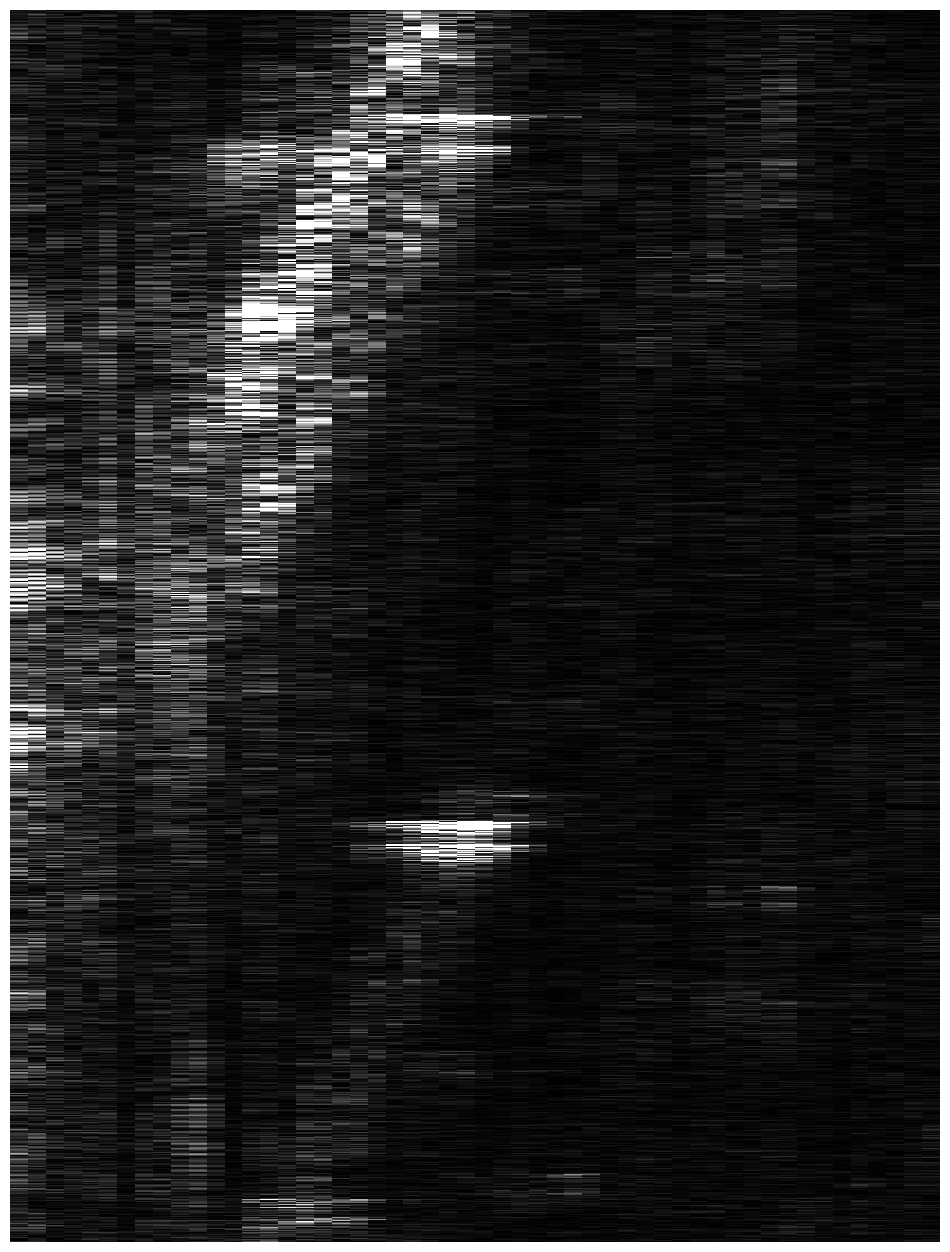

In [348]:
from visualisation import plot_timeframe
import numpy as np
from data import load_from_file, prepocess

import cv2

filename = "090342.npy"

data = load_from_file(filename)
# plot_timeframe(data)

img = data.to_numpy()

img = prepocess(img)
original_img = img.copy()

plot_numpy(img)



In [329]:
# aspect_ratio = 12/16

# h,w = img.shape

# new_w = int(aspect_ratio * h)

# img = cv2.resize(img, (new_w, h), interpolation=cv2.INTER_NEAREST)
# plot_numpy(img)

In [330]:
# img2 = cv2.blur(img, (5,41))
# plot_numpy(img2)

In [331]:
# img =  frequency_lowpass(img, 0.25)
# plot_numpy(img)

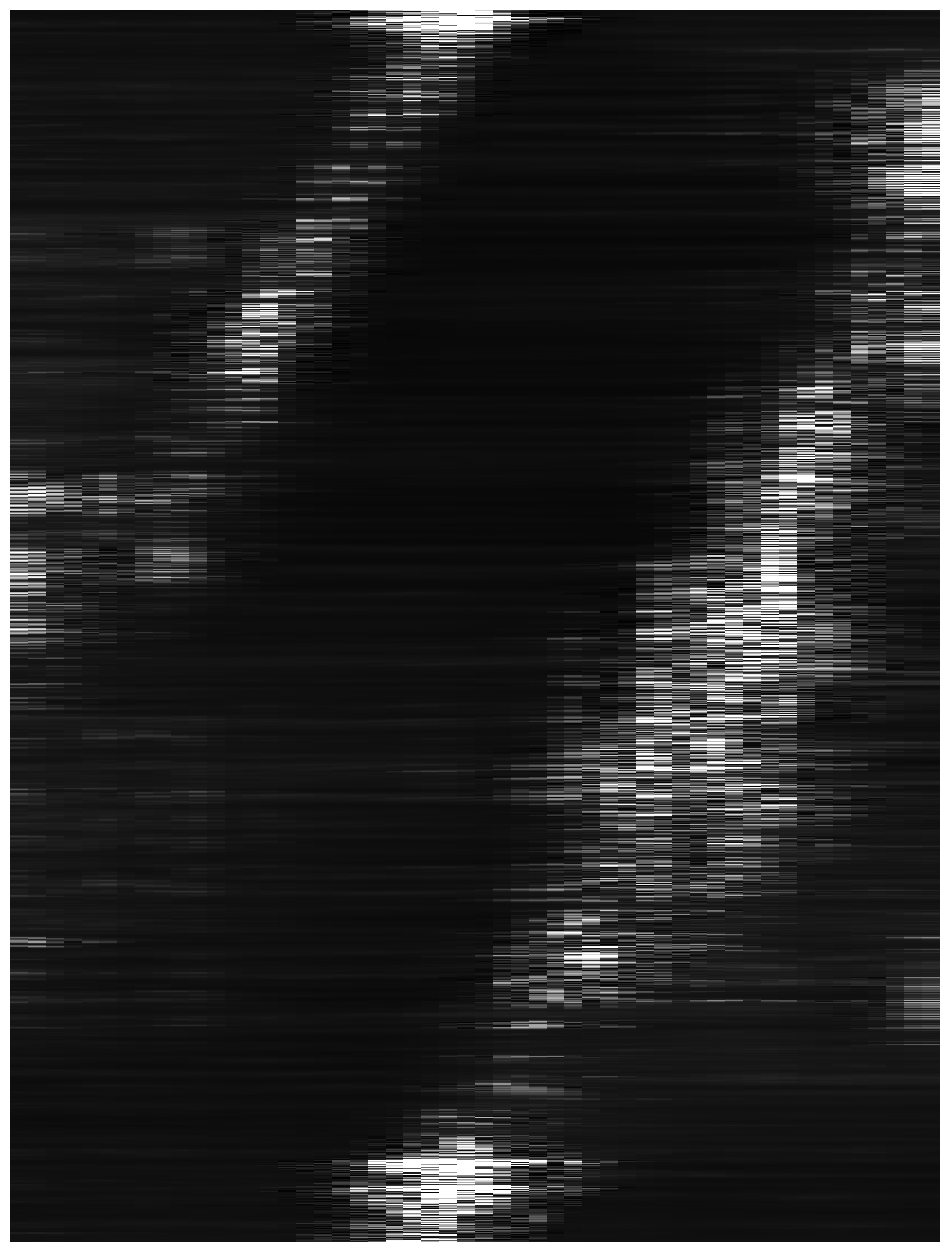

In [332]:
img = cv2.fastNlMeansDenoising(img, templateWindowSize=10,searchWindowSize=31, h=20)
plot_numpy(img)


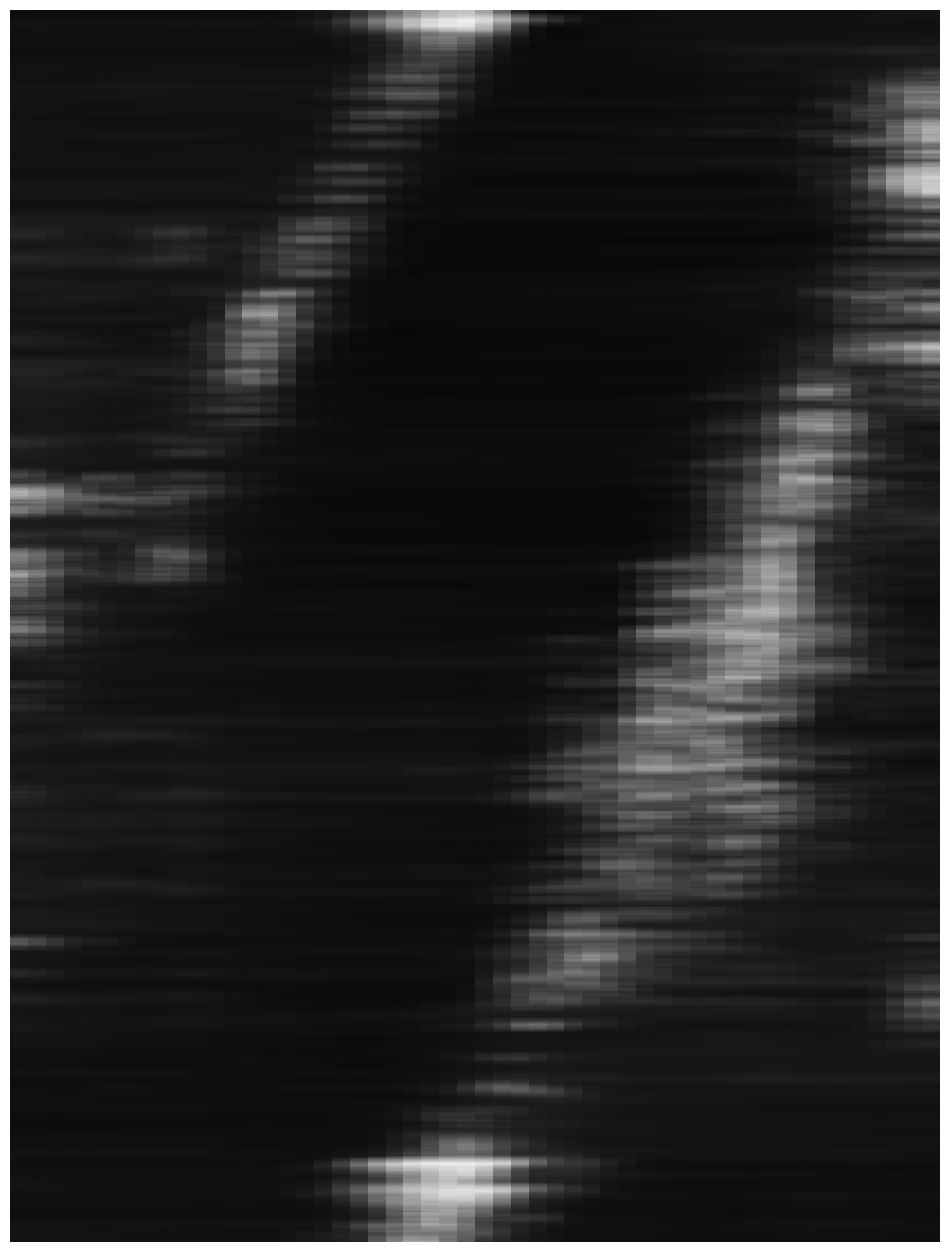

In [333]:
img = cv2.blur(img, (3,41))
plot_numpy(img)

In [334]:
# img = cv2.GaussianBlur(img, (3, 3), 0)
# plot_numpy(img)

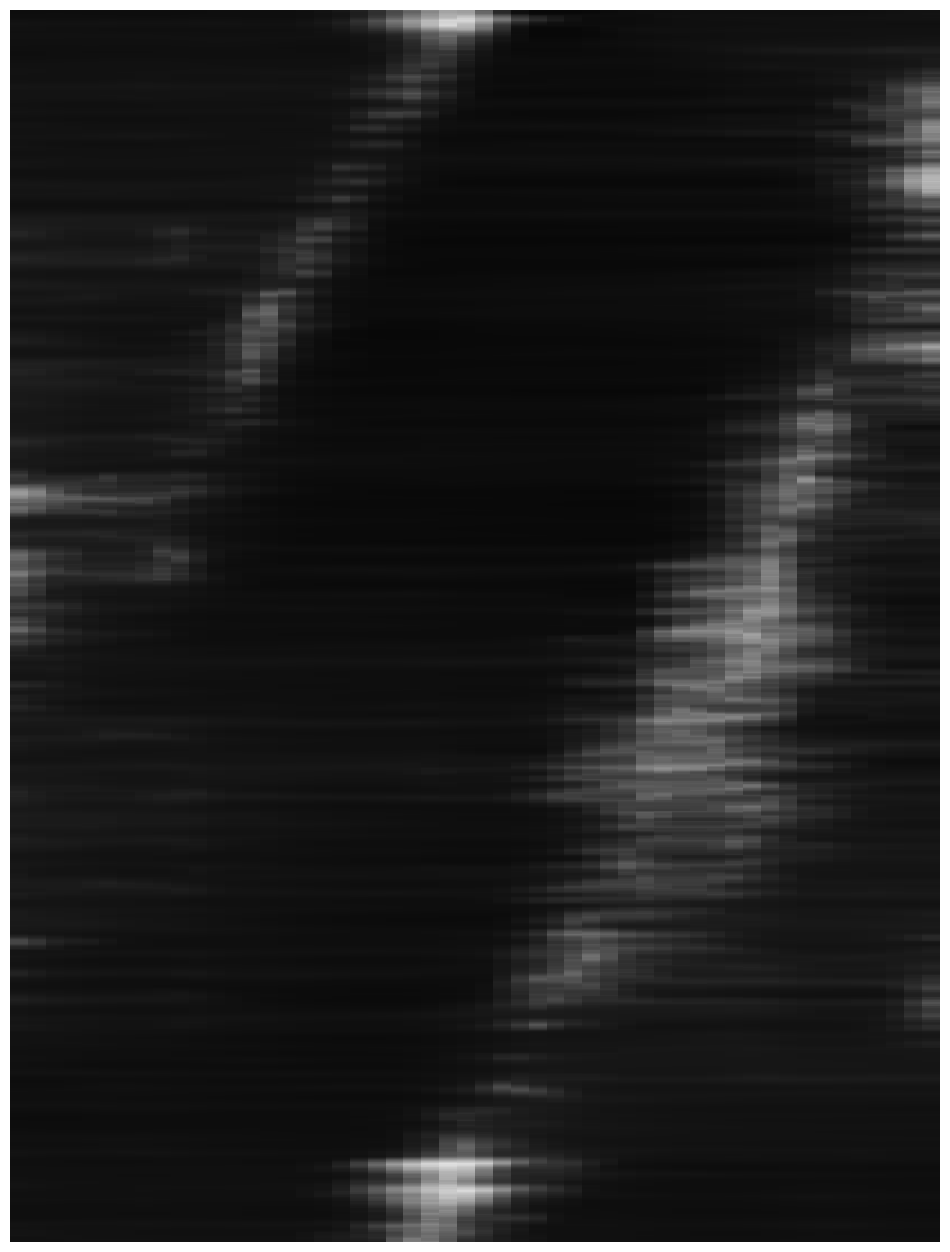

In [335]:
img = cv2.morphologyEx(
            img, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_RECT, (3,9)), iterations=1
        )
plot_numpy(img)

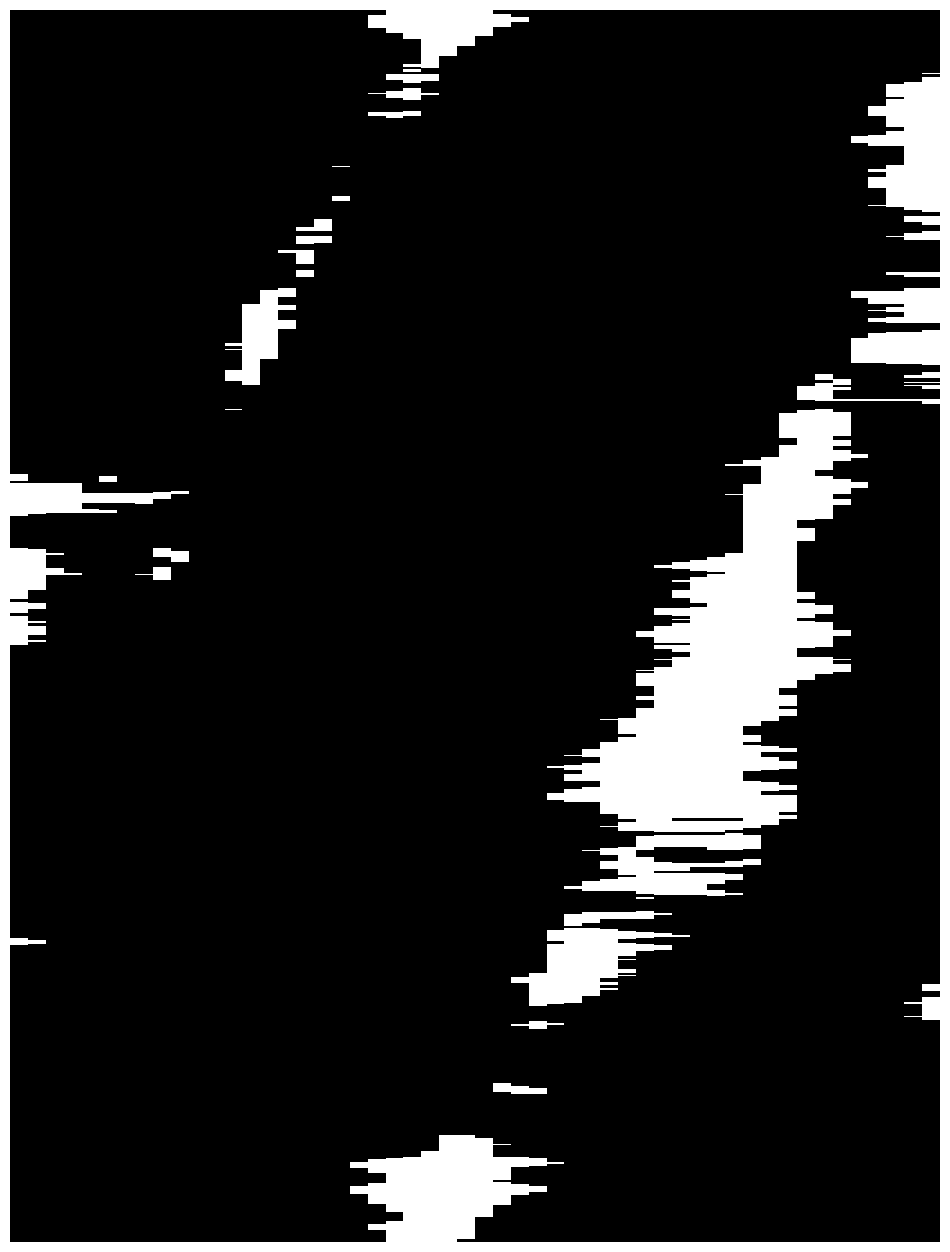

In [336]:
tr, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# tr, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plot_numpy(img)


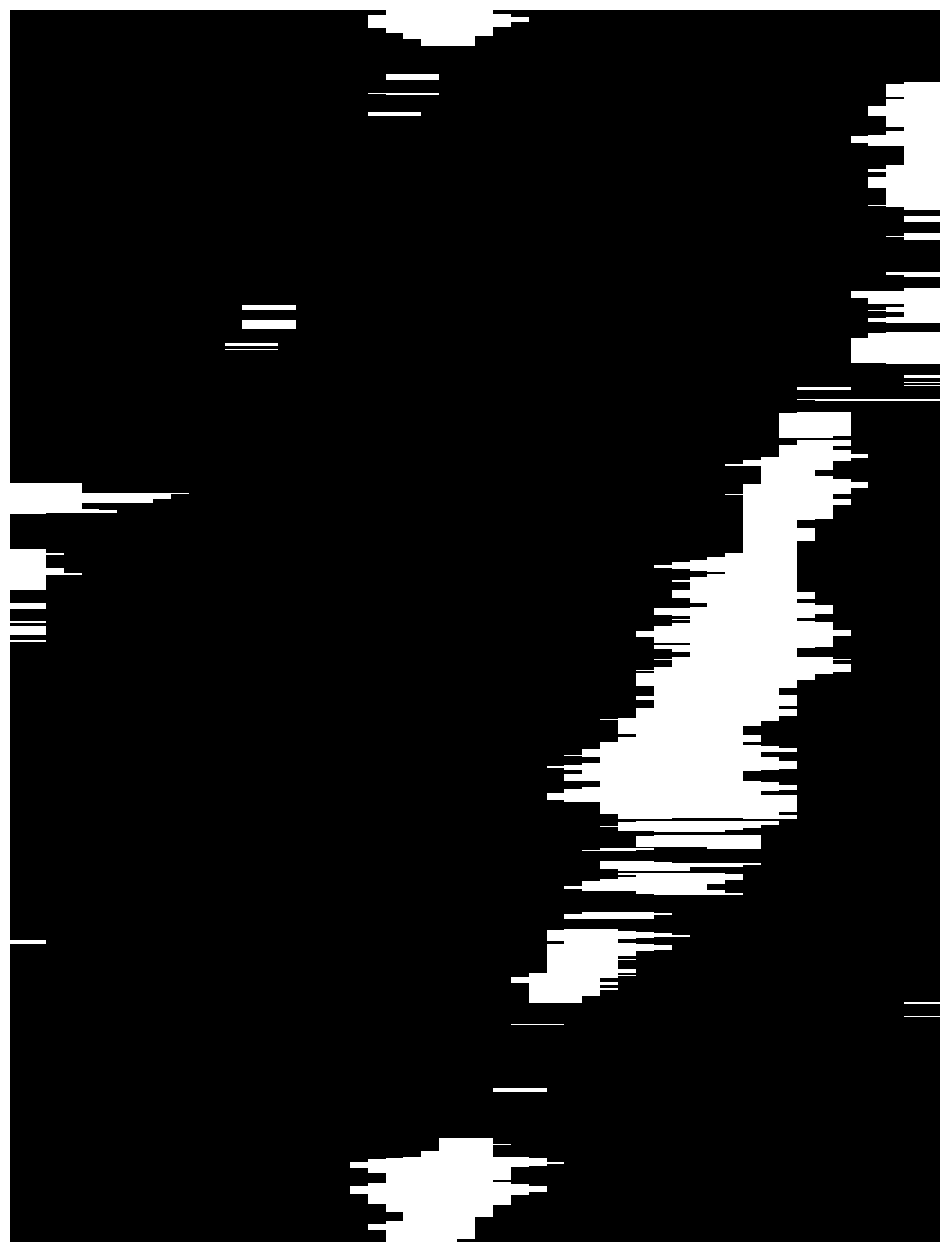

In [337]:
def proper_opening(image, kernel=(3,3), iterations=1):
    close1 = cv2.morphologyEx(
        image, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    open1 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    close2 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    return np.minimum(image, close2)

def proper_closing(image, kernel=(3,3), iterations = 1):
       
    open1 = cv2.morphologyEx(
        image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    close1 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    open2 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    return np.maximum(image, open2)

def automedian_filter(image, kernel=(3,3), iterations = 1):
       
    open1 = cv2.morphologyEx(
        image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    
    close1 = cv2.morphologyEx(
        open1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )

    open2 = cv2.morphologyEx(
        close1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, kernel), iterations=iterations
    )
    return np.maximum(open2, proper_opening(image, kernel, iterations))

# img = proper_opening(img, kernel=(7,7), iterations=1)
# img2 = img.copy()
# for i in range(3):
#     img2 = cv2.morphologyEx(
#             img2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)), iterations=1
#         )
#     img2 = cv2.morphologyEx(
#             img2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1
#        . )
# img2 = cv2.morphologyEx(
#             img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)), iterations=1
#         )
# img2 = automedian_filter(img, kernel=(5,5))
# (img2 != img).sum()
# plot_numpy(img)
img = cv2.morphologyEx(
            img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1
        )
plot_numpy(img)


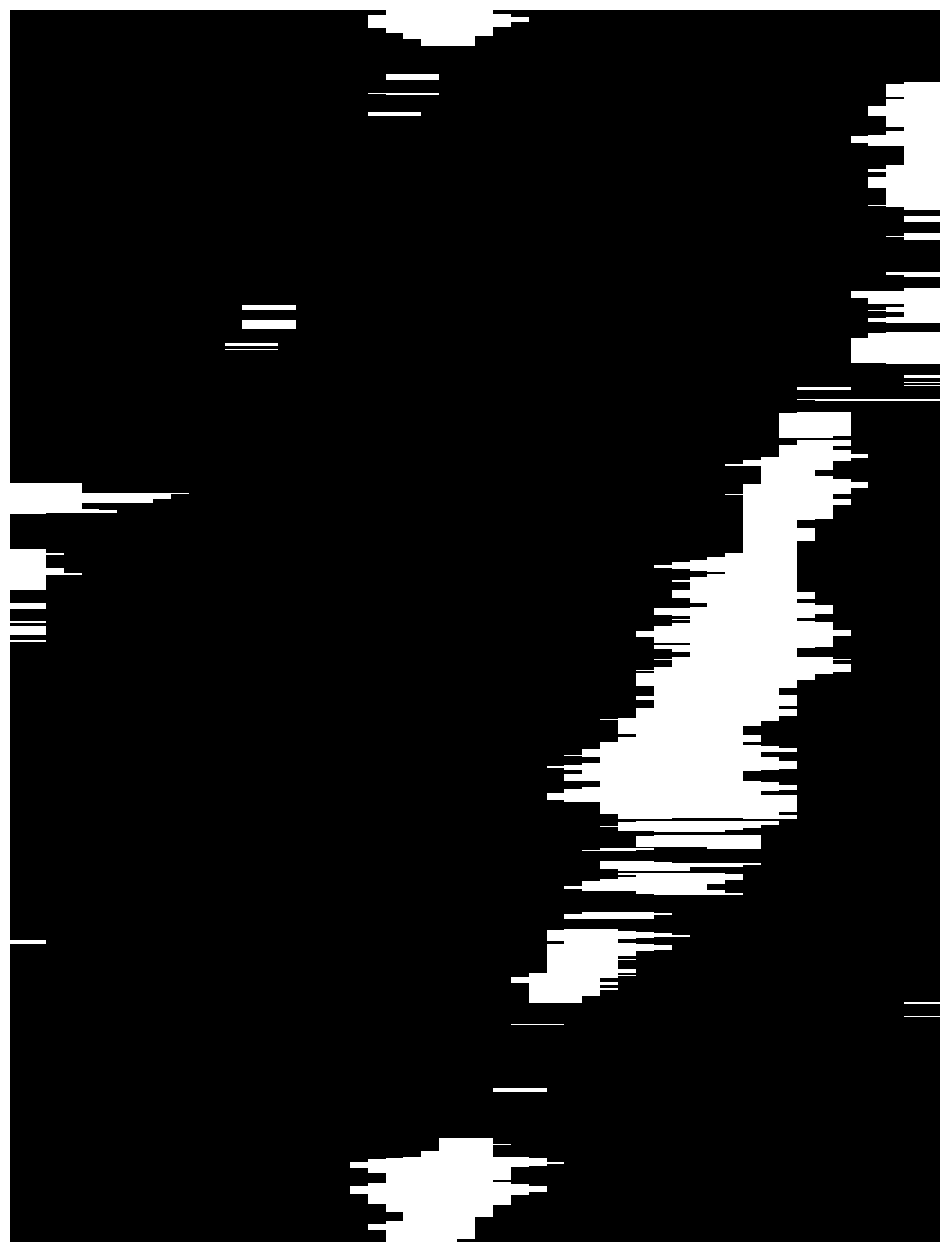

In [338]:
img = cv2.resize(img, (w,h), interpolation=cv2.INTER_NEAREST)
plot_numpy(img)


In [339]:
img.shape

(6250, 52)

In [340]:
def generate_colors(num_colors):
    hsv_colors = [(i / num_colors, 1.0, 1.0) for i in range(num_colors)]
    rgb_colors = [plt.cm.hsv(h)[:3] for h, _, _ in hsv_colors]
    rgb_colors = (np.array(rgb_colors) * 255).astype(np.uint8)
    np.random.shuffle(rgb_colors)
    return rgb_colors

In [341]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

X = np.nonzero(img)
X = np.vstack(X).T

X.shape
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
clustering = DBSCAN(eps=0.08, min_samples=500).fit(X_scaled)

no_of_clusters = np.max(clustering.labels_)+1
print(no_of_clusters)


3


Number of clusters:  3


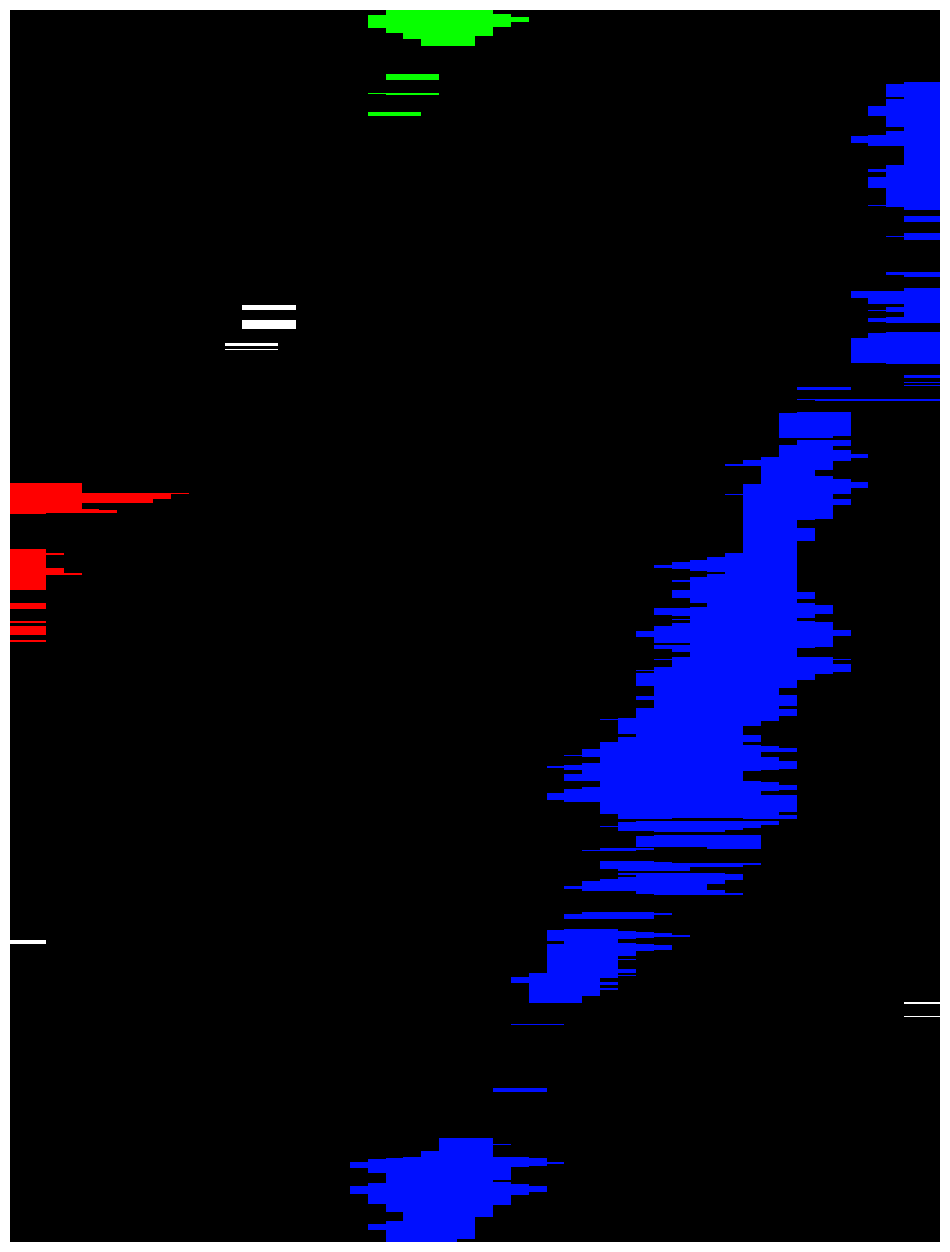

In [342]:
colors = generate_colors(no_of_clusters) 
img_clusters = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

print("Number of clusters: ", no_of_clusters)
for cluster_id in range(no_of_clusters):
    idx = X[clustering.labels_ == cluster_id, :]
    # print(idx)
    # print(f"Cluster{cluster_id}: {np.sum(idx)} members")
    img_clusters[idx.T[0], idx.T[1],:] = colors[cluster_id]

plot_numpy(img_clusters)

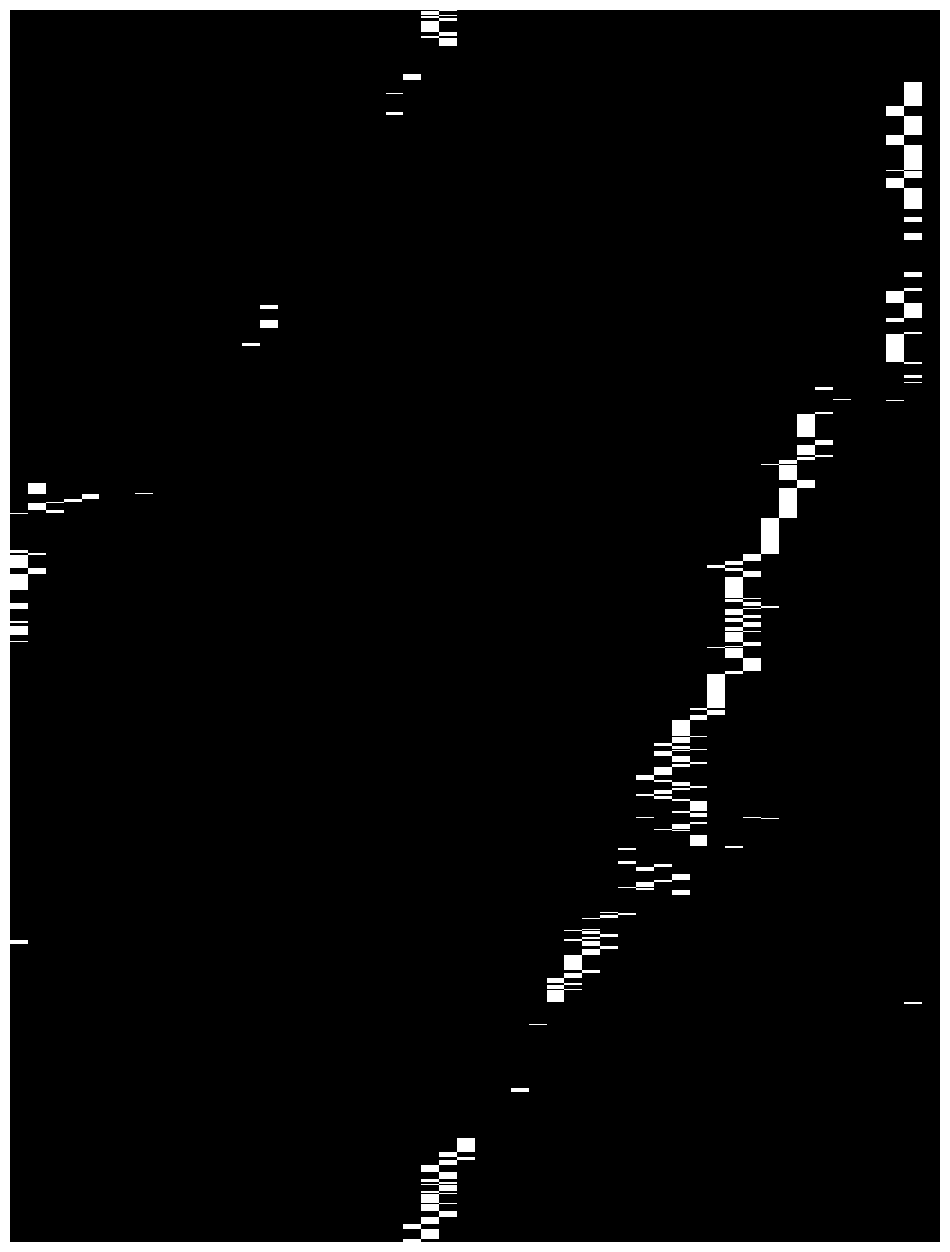

In [343]:
from skimage.morphology import skeletonize
skeleton = skeletonize(img)
plot_numpy(255 * skeleton.astype(np.uint8))

R2 of cluster 0: 0.11540091497457394
Discarded cluster 0 with R2=0.11540091497457394
R2 of cluster 1: 0.872661090055187
Detected velocity: 18.36 m/s (66.1 km/h)

R2 of cluster 2: 0.22726661382017377
Discarded cluster 2 with R2=0.22726661382017377


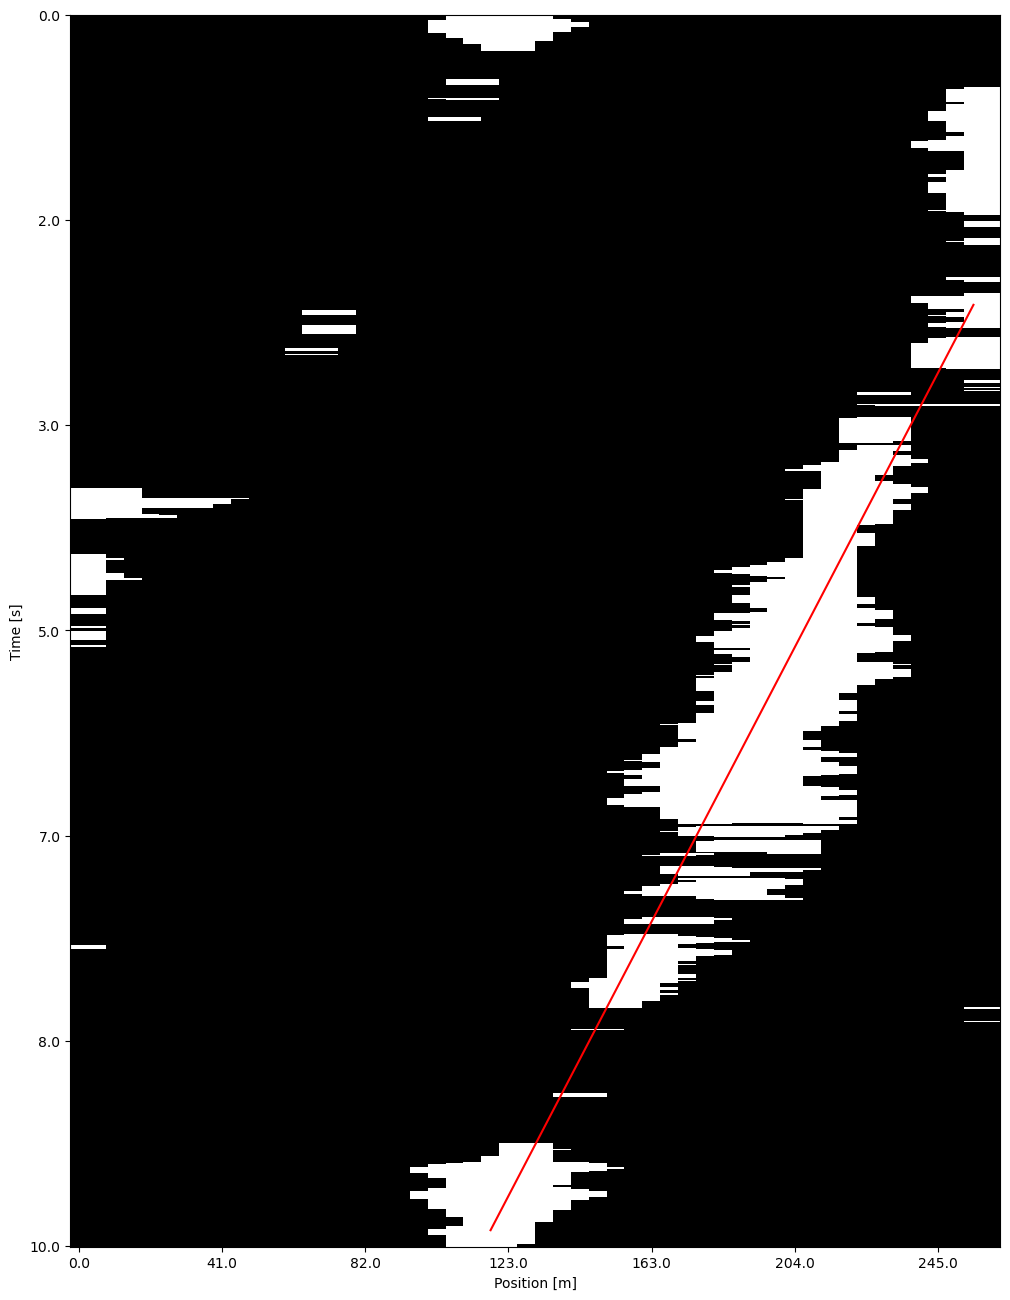

In [344]:
from sklearn.linear_model import LinearRegression

lines = []

for cluster_id in range(no_of_clusters):
    idx = X[clustering.labels_ == cluster_id, :]
    x_coords = idx[:, 1].reshape(-1,1)
    y_coords = idx[:, 0]
    
    model = LinearRegression()
    model.fit(x_coords, y_coords)

    slope = model.coef_[0]
    intercept = model.intercept_

    x_start = np.min(x_coords)
    x_end = np.max(x_coords)
    
    # y_start = model.predict([[x_start]])
    # y_end = model.predict([[x_end]])
    r2 = model.score(x_coords, y_coords)
    print(f"R2 of cluster {cluster_id}: {r2}")

    #DISCARDING R2 < 0.5
    if r2 < 0.5:
        print(f"Discarded cluster {cluster_id} with R2={r2}")
        continue
    velocity = velocity_from_slope(slope)
    print(f"Detected velocity: {velocity} m/s ({ mps_to_kmph(velocity) } km/h)")
    print()
    lines.append((slope,intercept, x_start, x_end))
    

plot_numpy_with_lines(img, lines)



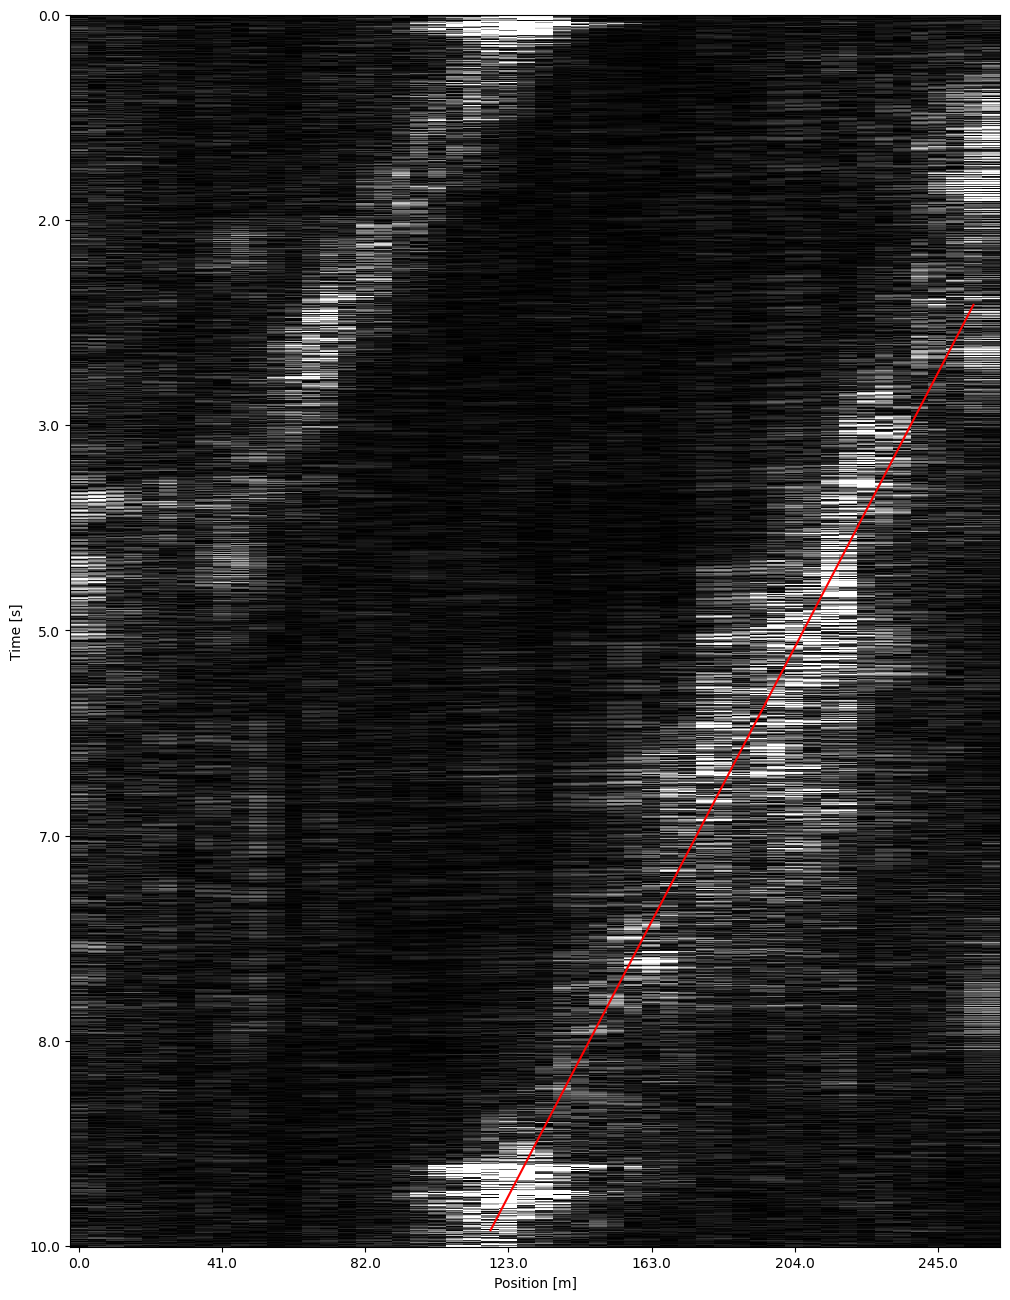

In [345]:
plot_numpy_with_lines(original_img, lines)

In [4]:
from regression_pipeline import detect_velocities

090322
090332
090342
090352
090402
090412
090422
090432
090442
090452
090502
090512


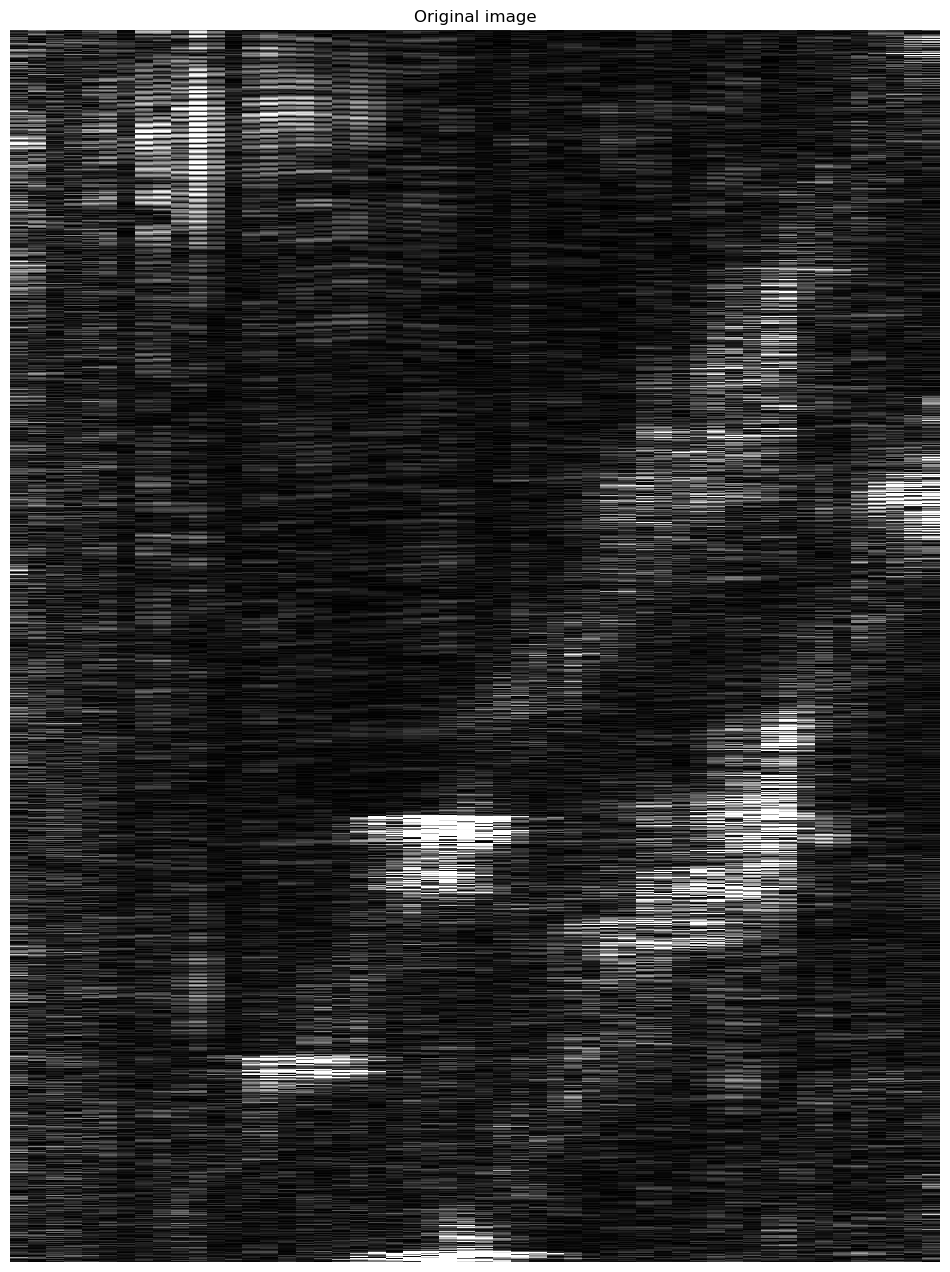

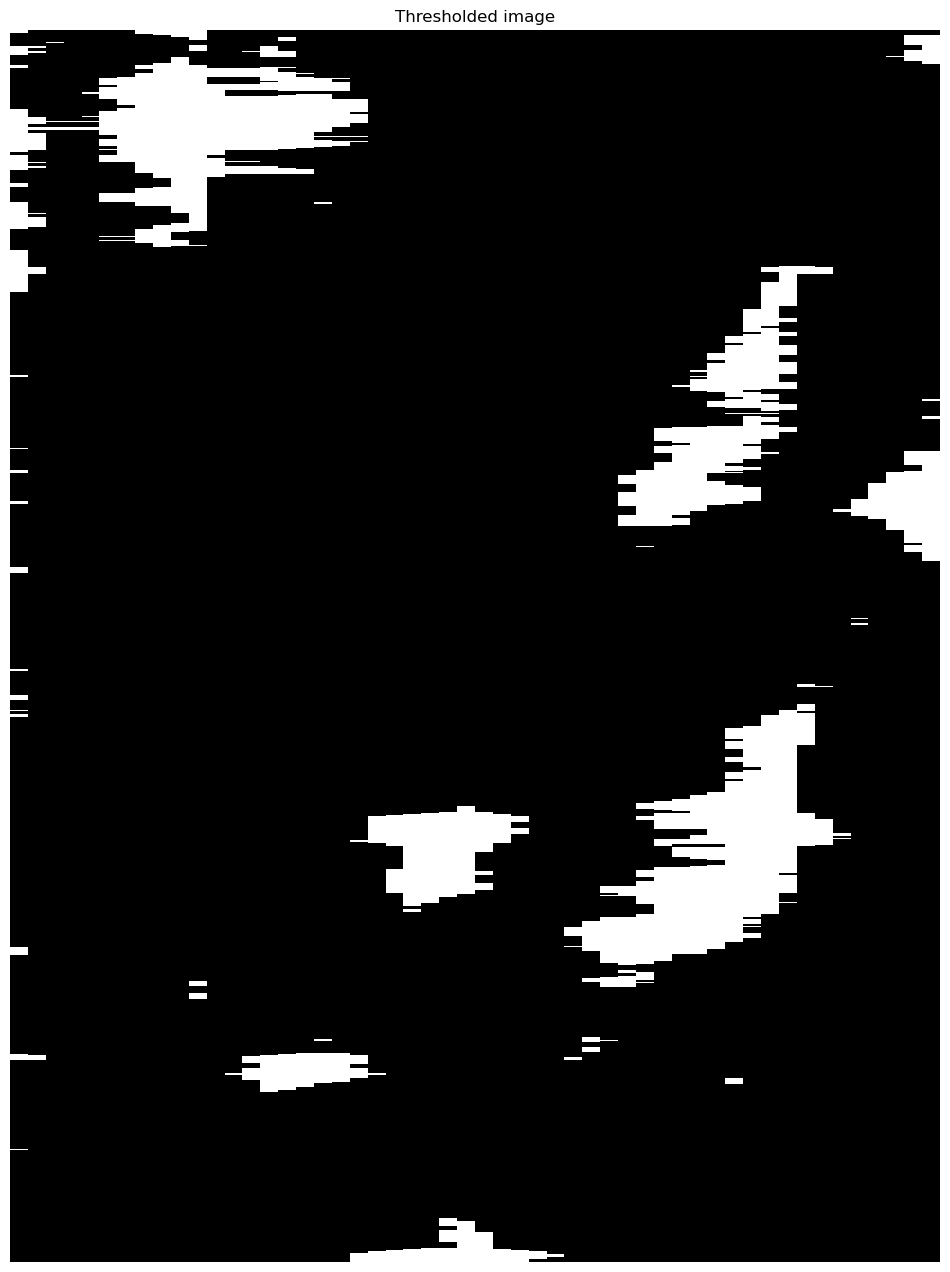

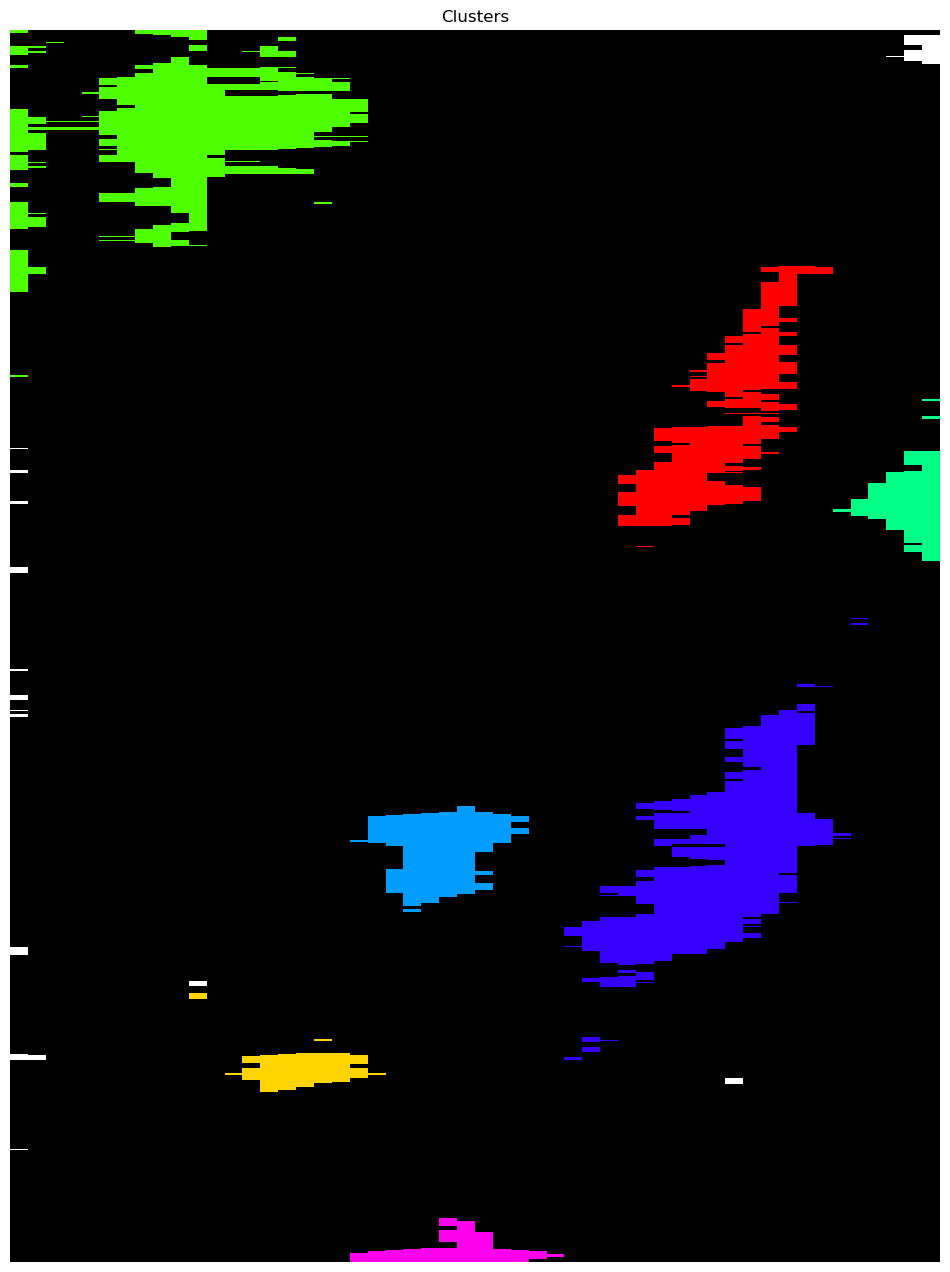

Discarded cluster 0 with R2=0.12757863350709264 (<0.5)
Detected velocity: 30.34 m/s (109.22 km/h)

Discarded cluster 2 with R2=0.0003721023175031757 (<0.5)
Discarded cluster 3 with R2=0.4557982772569664 (<0.5)
Discarded cluster 4 with R2=0.026185093644595203 (<0.5)
Discarded cluster 5 with R2=0.06730297172252553 (<0.5)
Discarded cluster 6 with R2=0.013756772938563366 (<0.5)


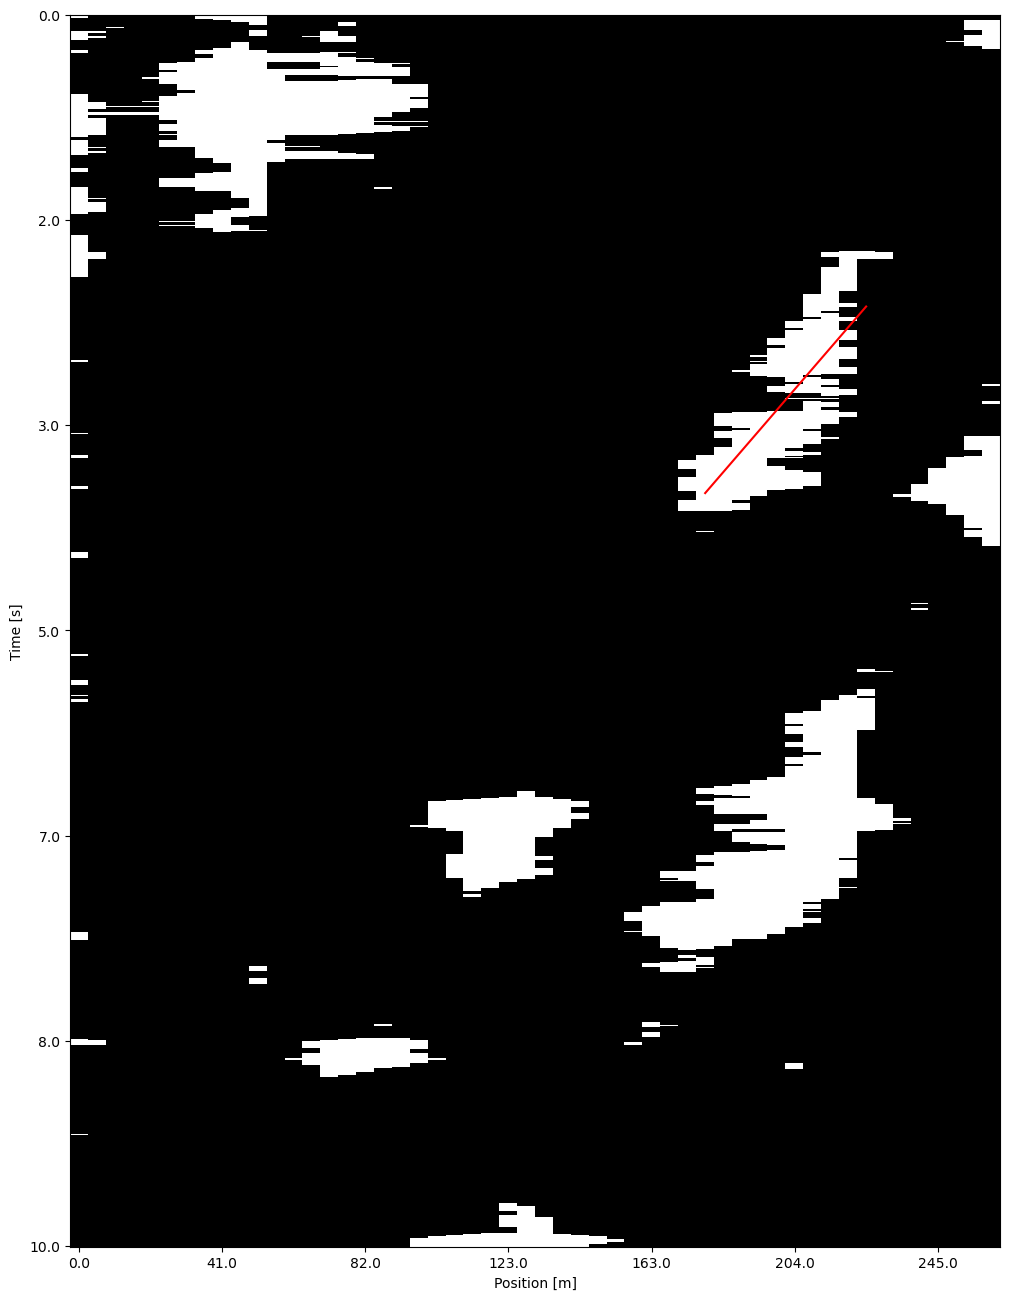

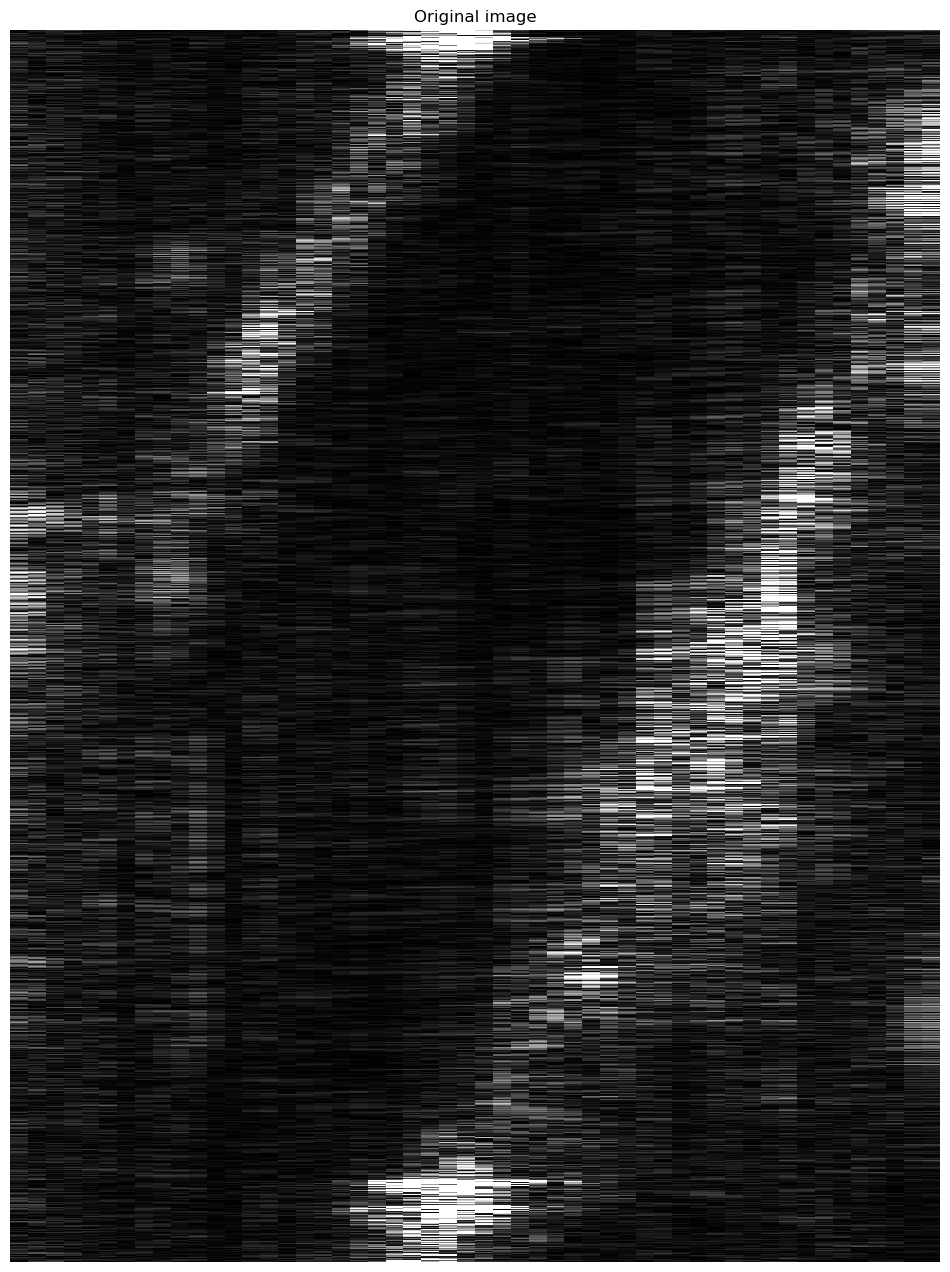

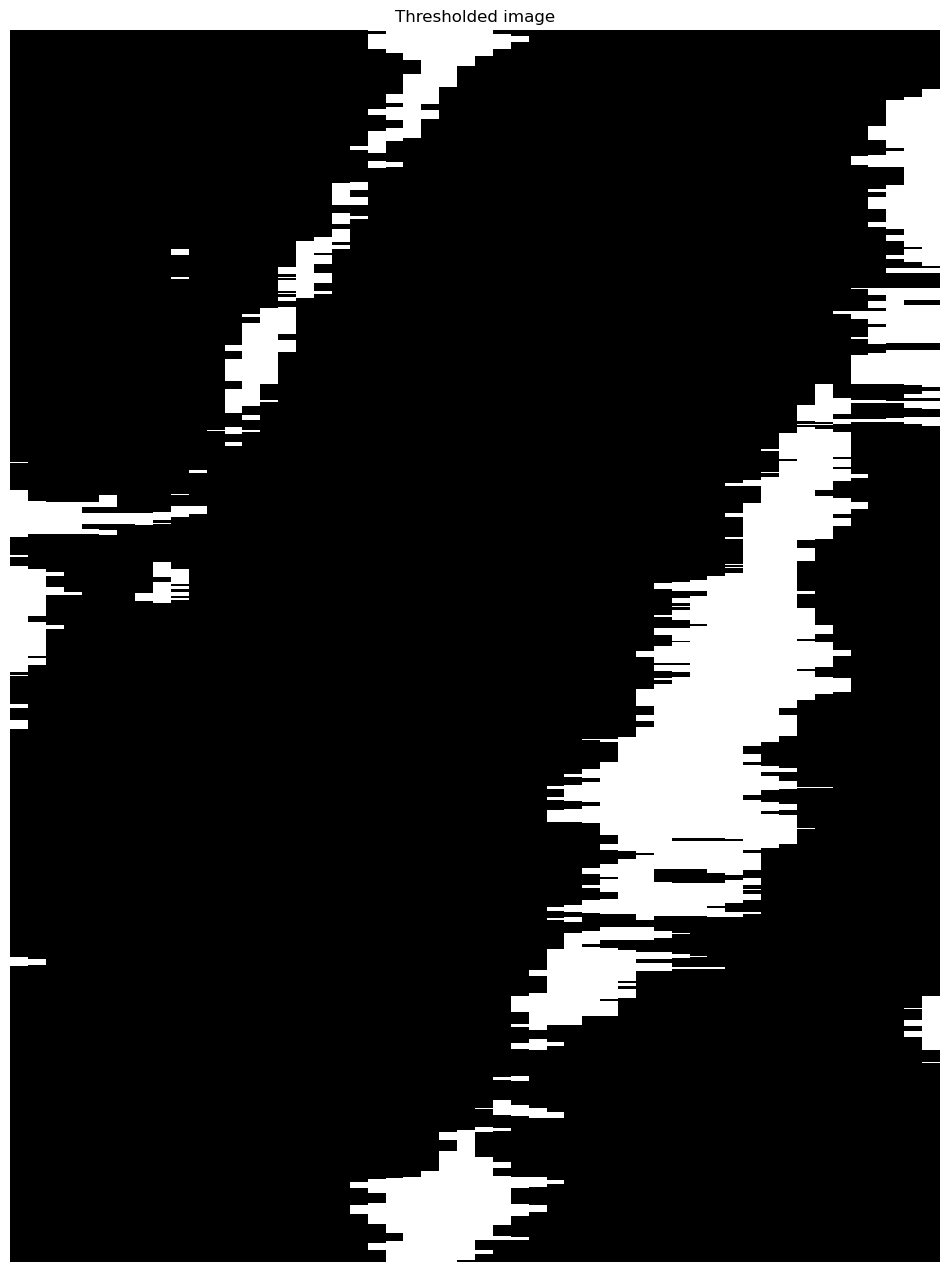

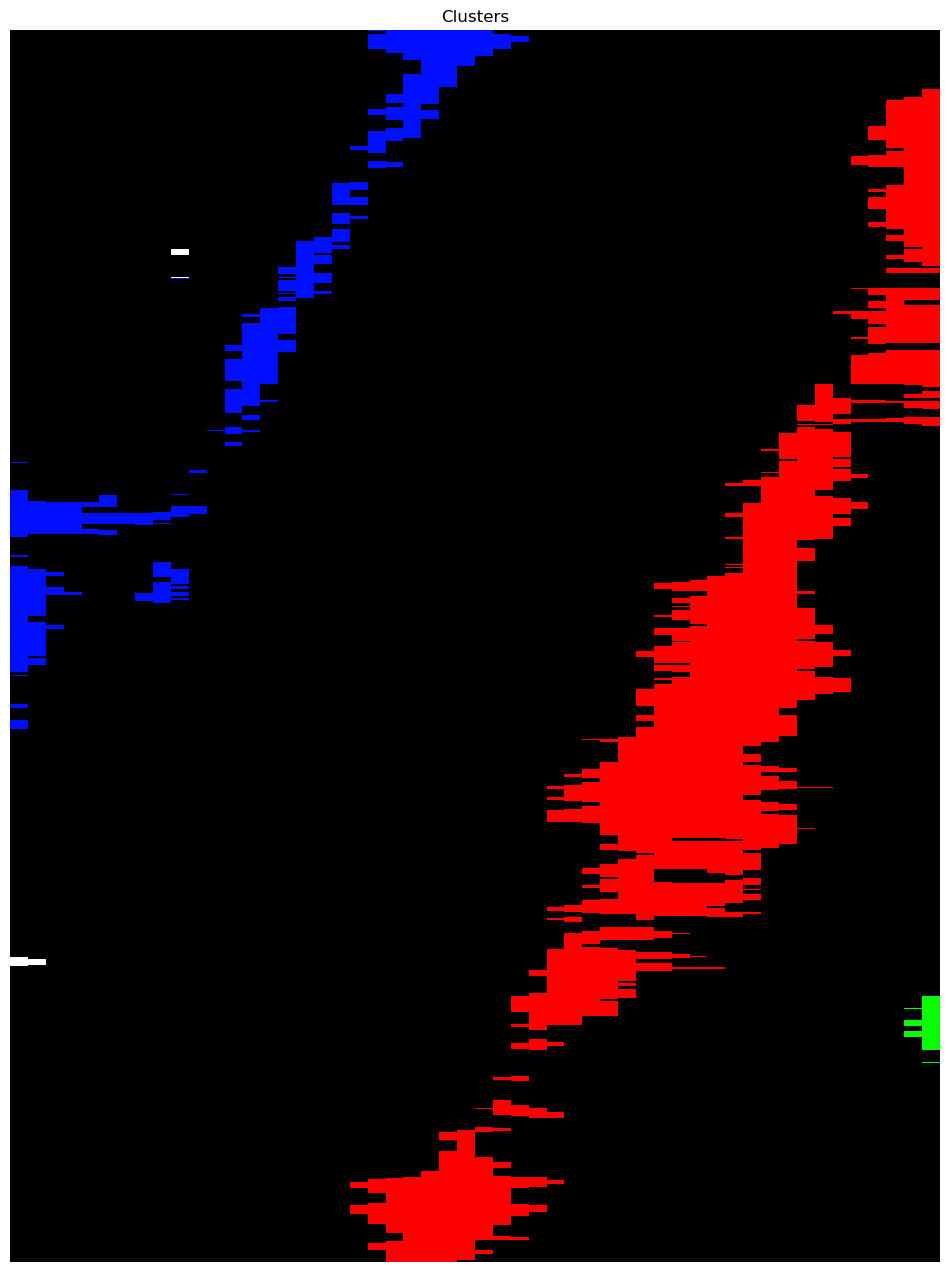

Detected velocity: 27.13 m/s (97.67 km/h)

Detected velocity: 18.26 m/s (65.74 km/h)

Discarded cluster 2 with R2=0.0029409018431784117 (<0.5)


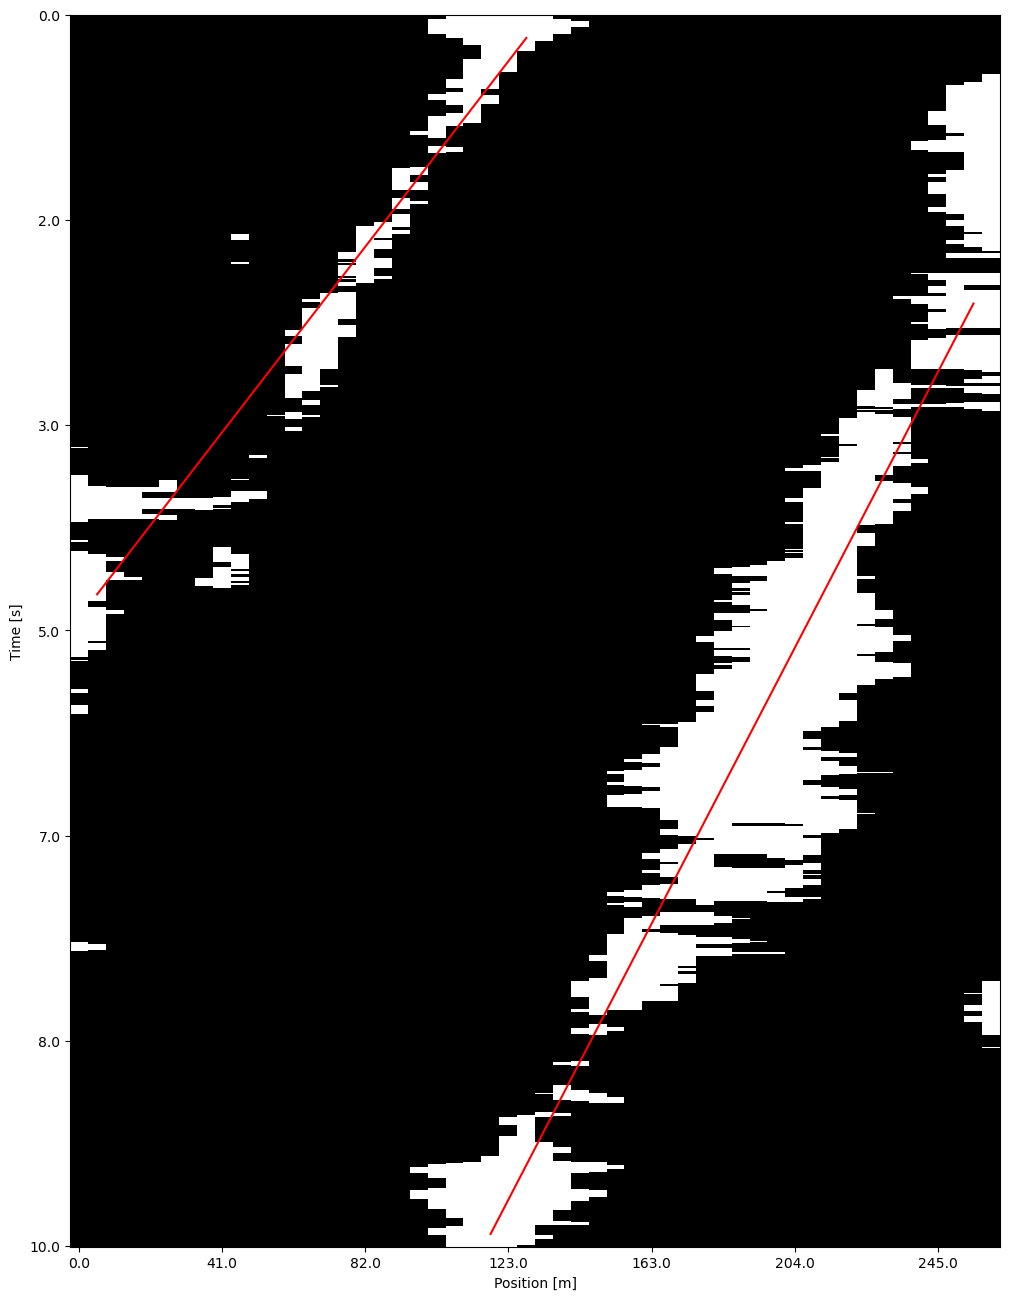

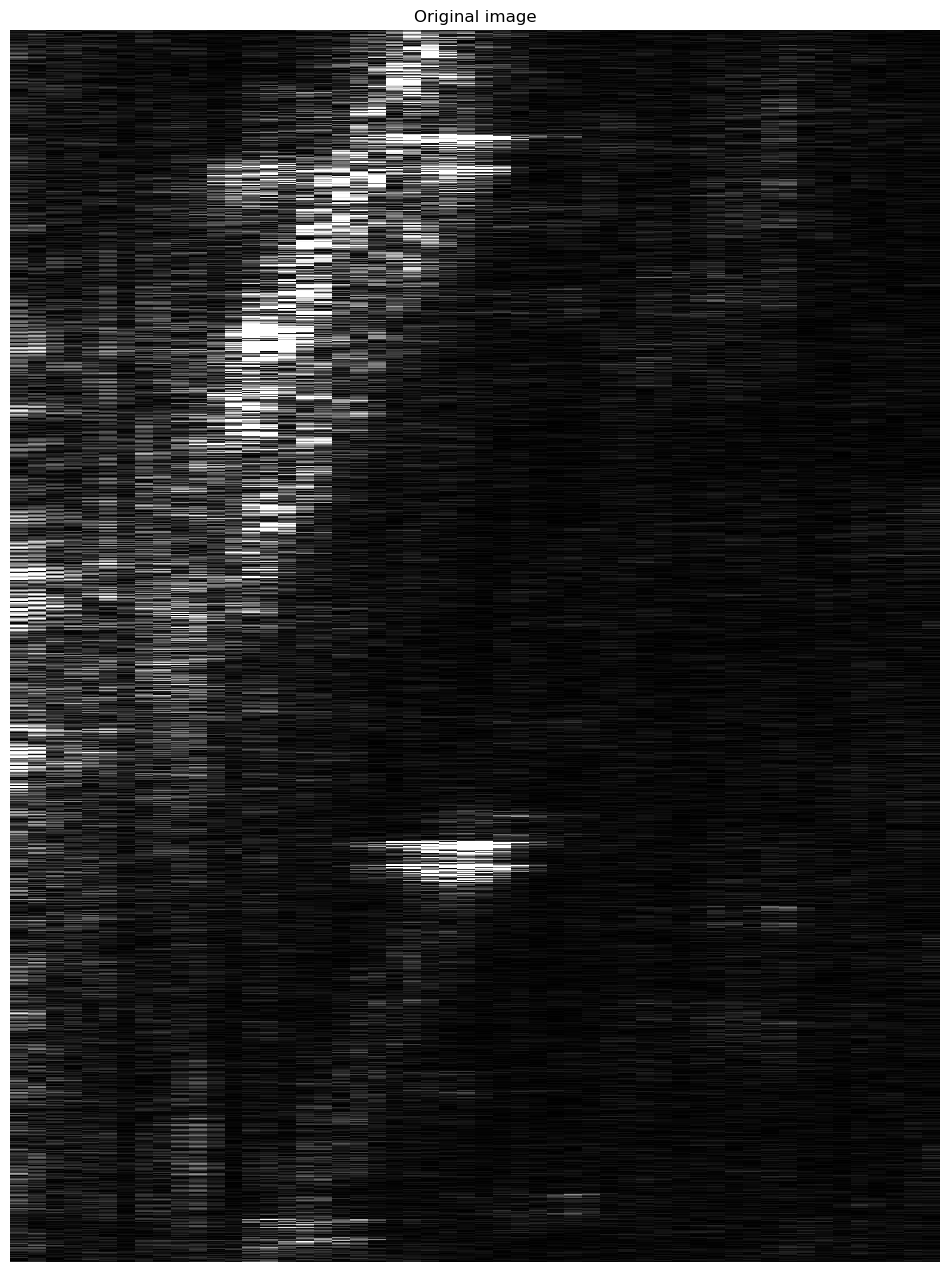

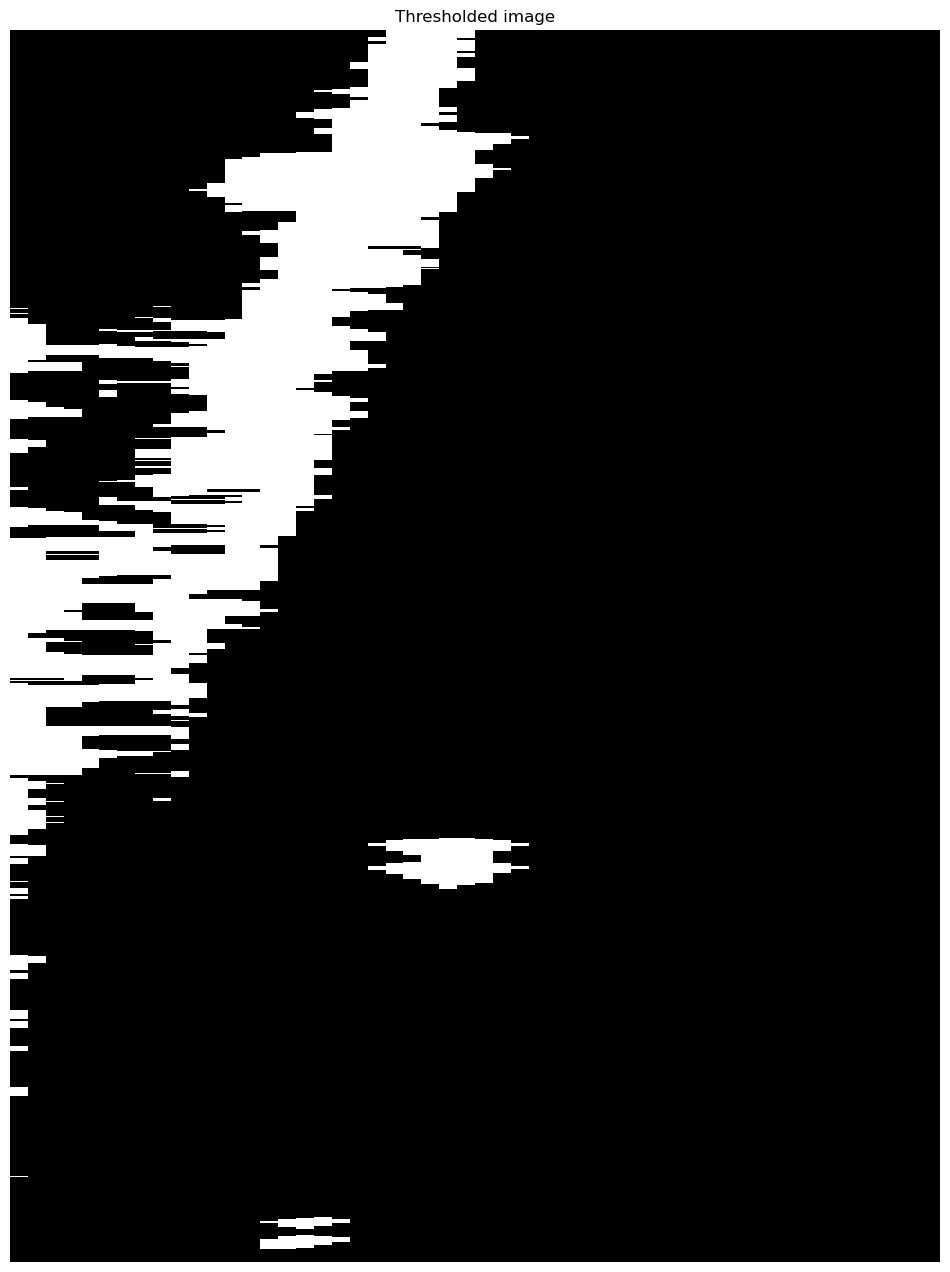

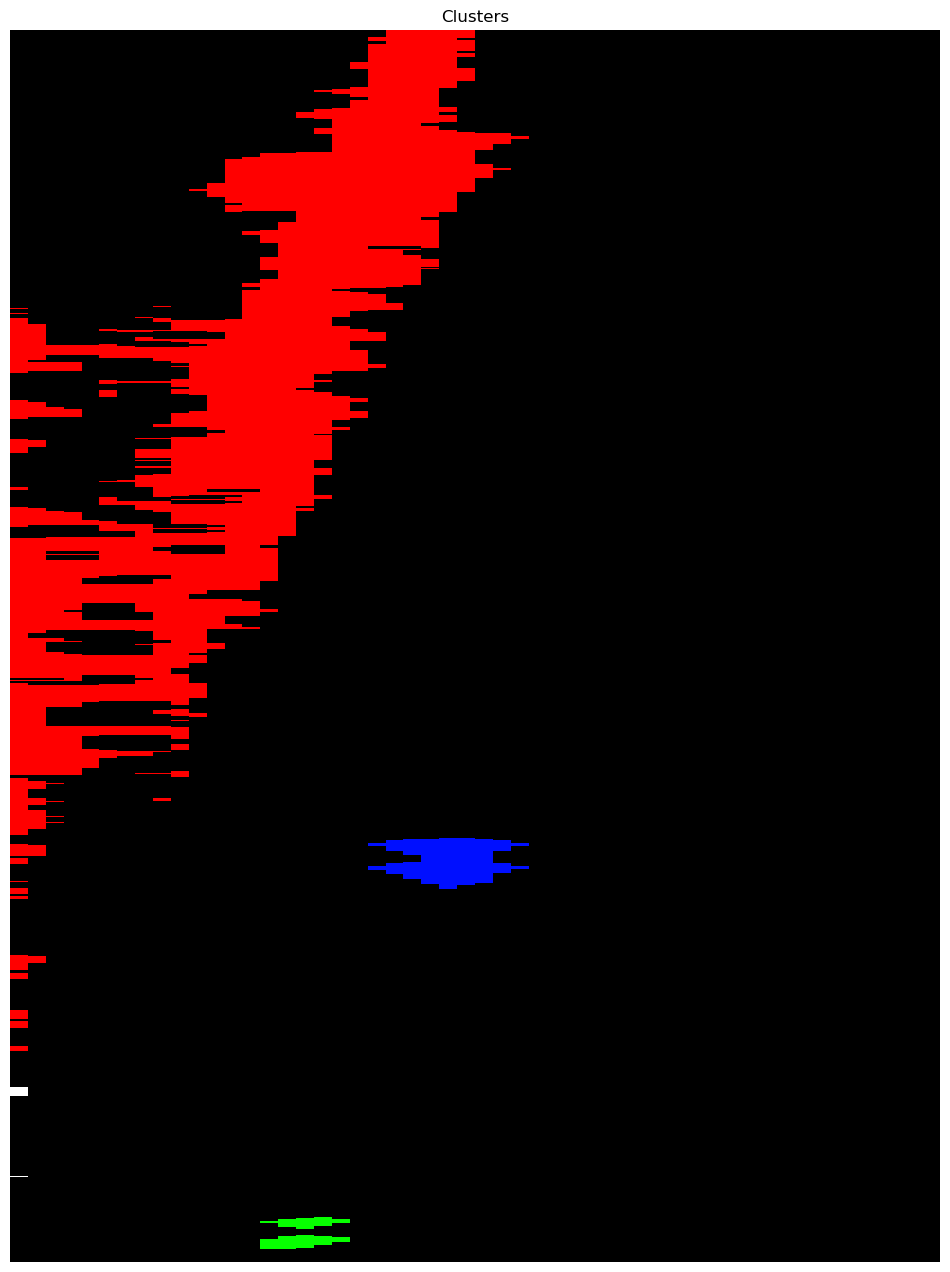

Detected velocity: 26.74 m/s (96.26 km/h)

Discarded cluster 1 with R2=3.7297208974607088e-06 (<0.5)
Discarded cluster 2 with R2=0.06365783093425592 (<0.5)


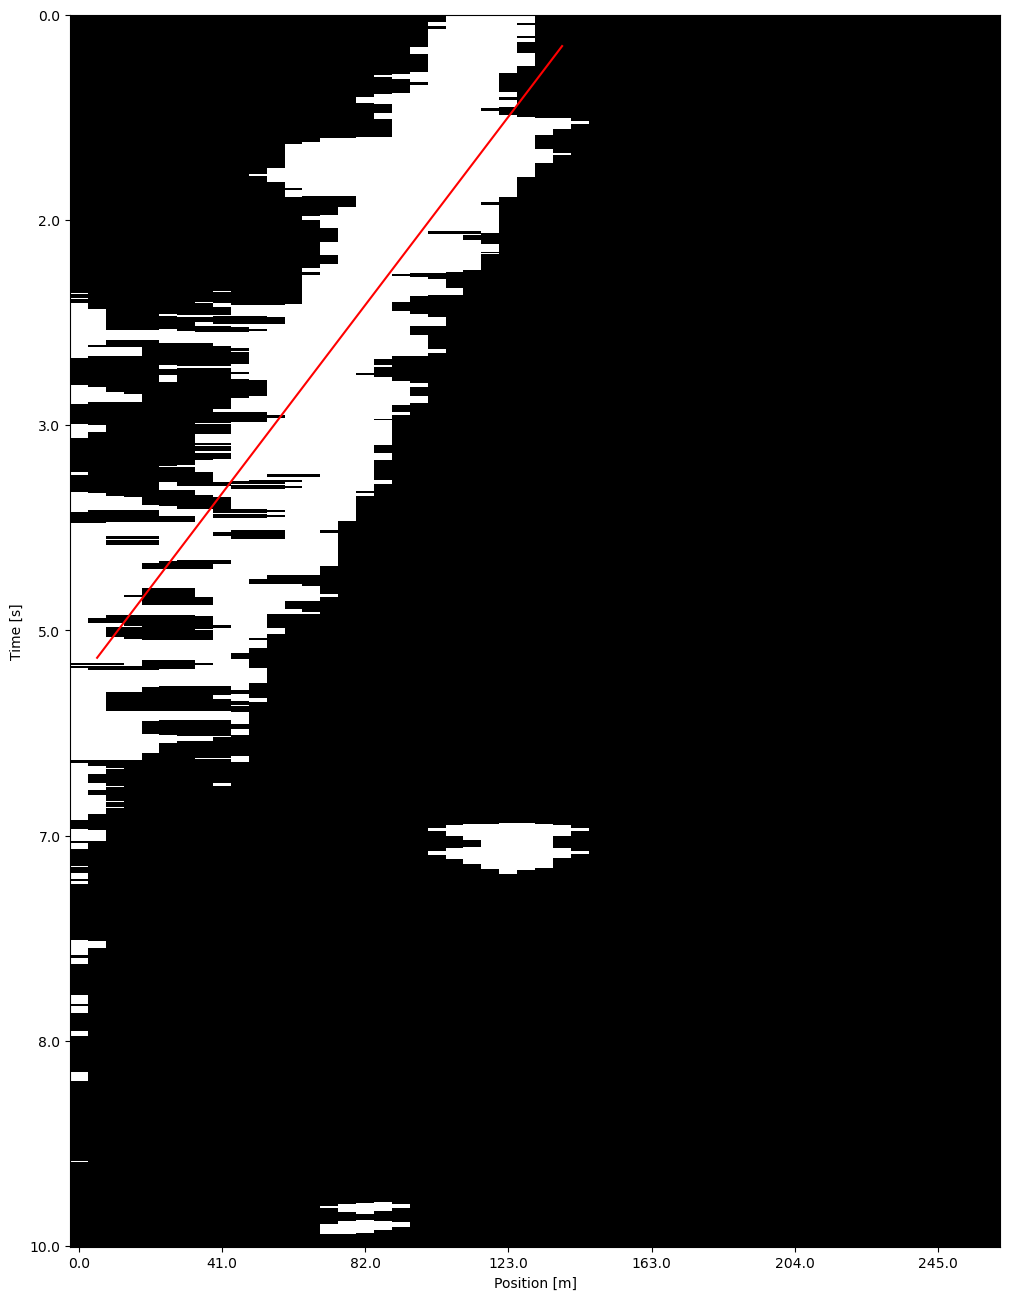

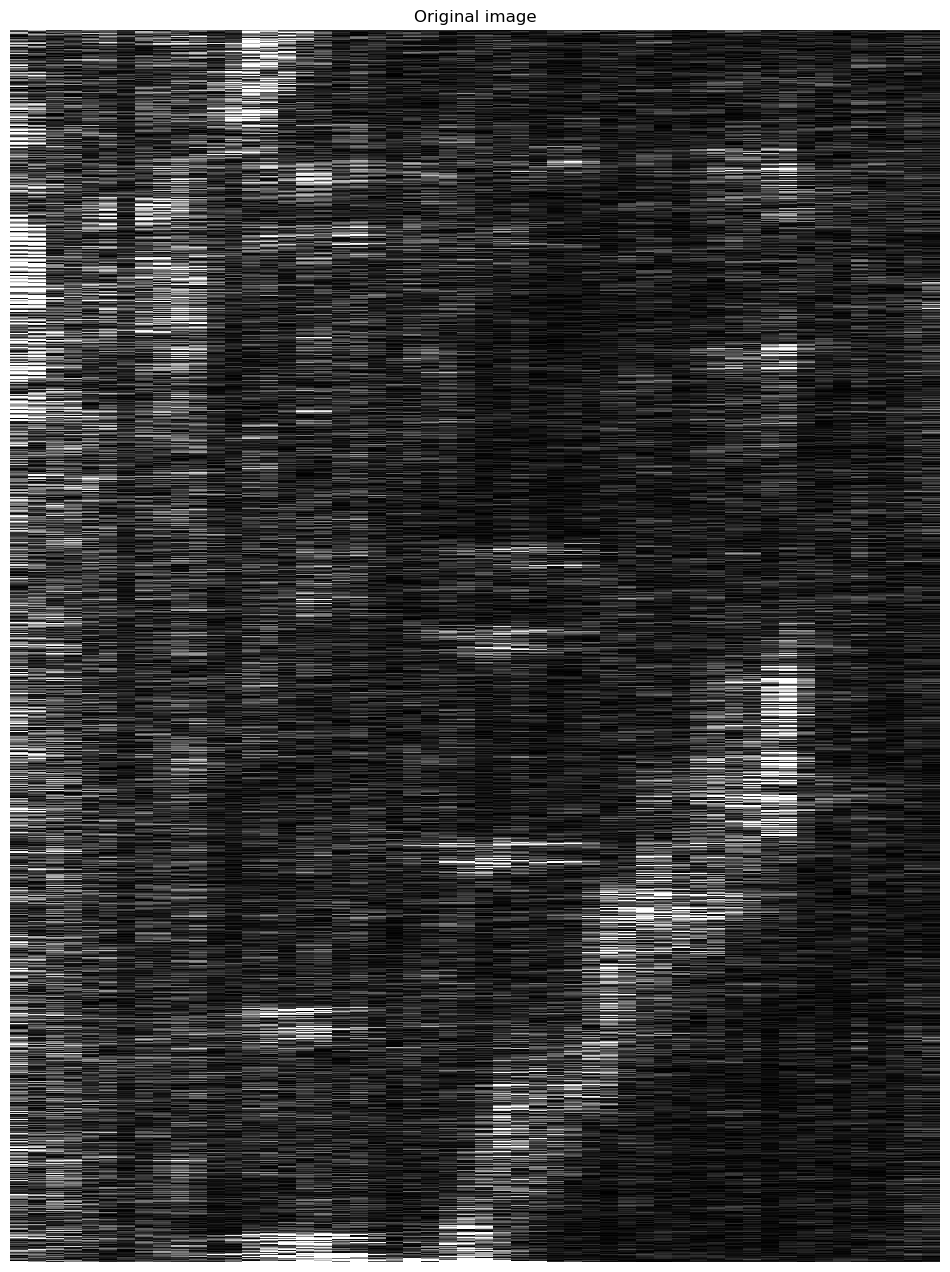

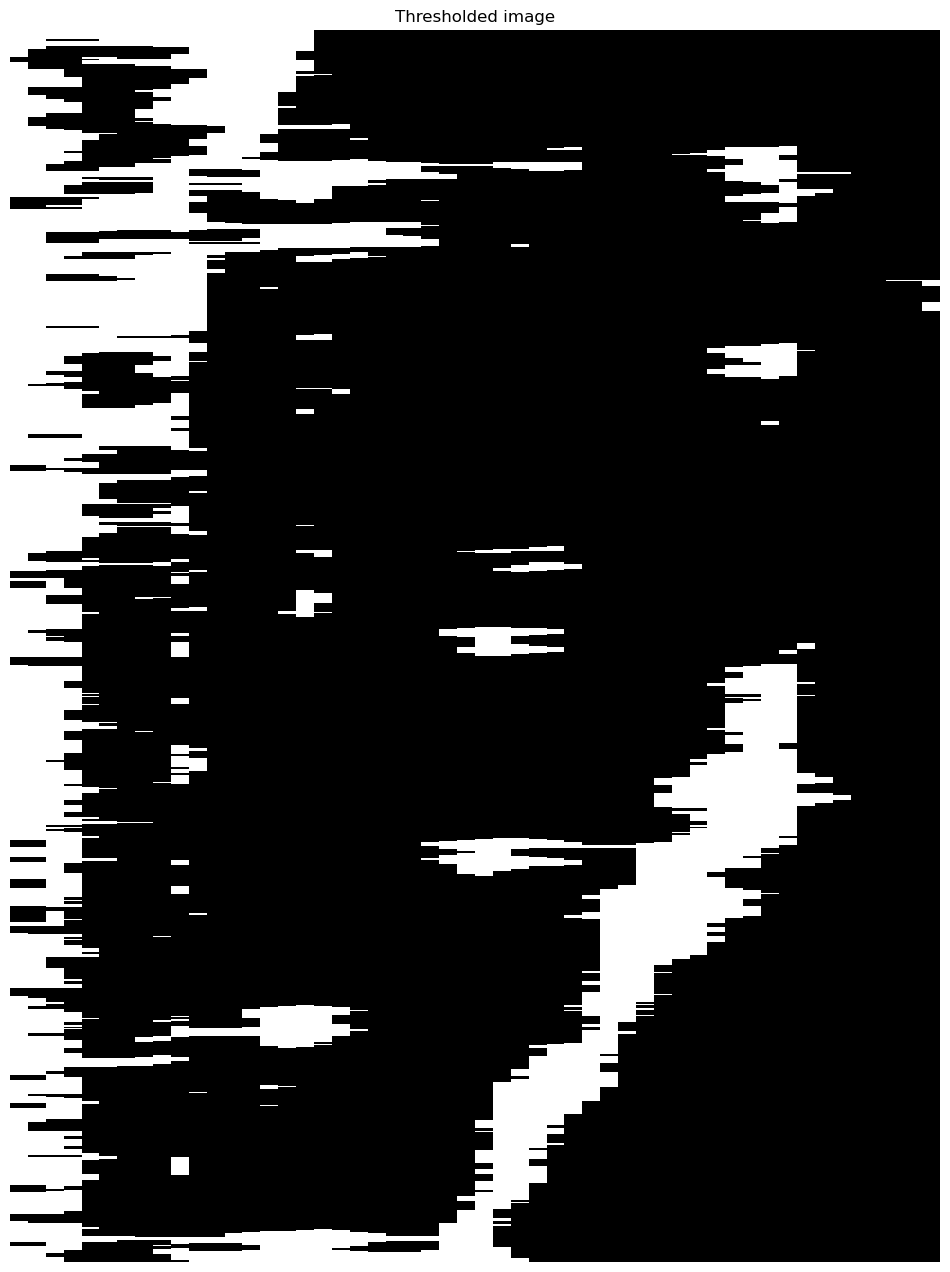

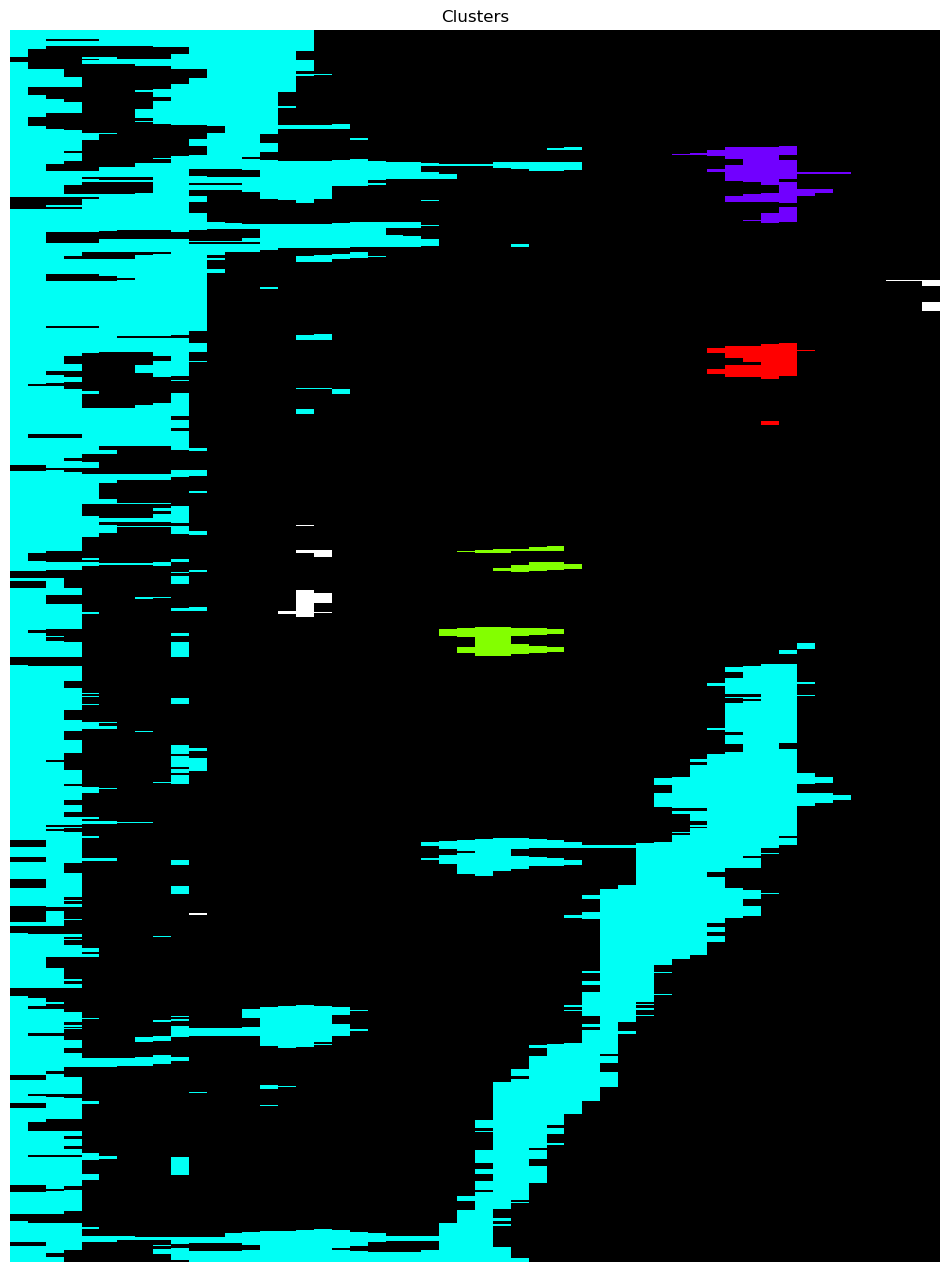

Discarded cluster 0 with R2=0.11315992586467005 (<0.5)
Discarded cluster 1 with R2=0.10574129186288406 (<0.5)
Discarded cluster 2 with R2=0.0004816459521772565 (<0.5)
Discarded cluster 3 with R2=0.1785669813185493 (<0.5)


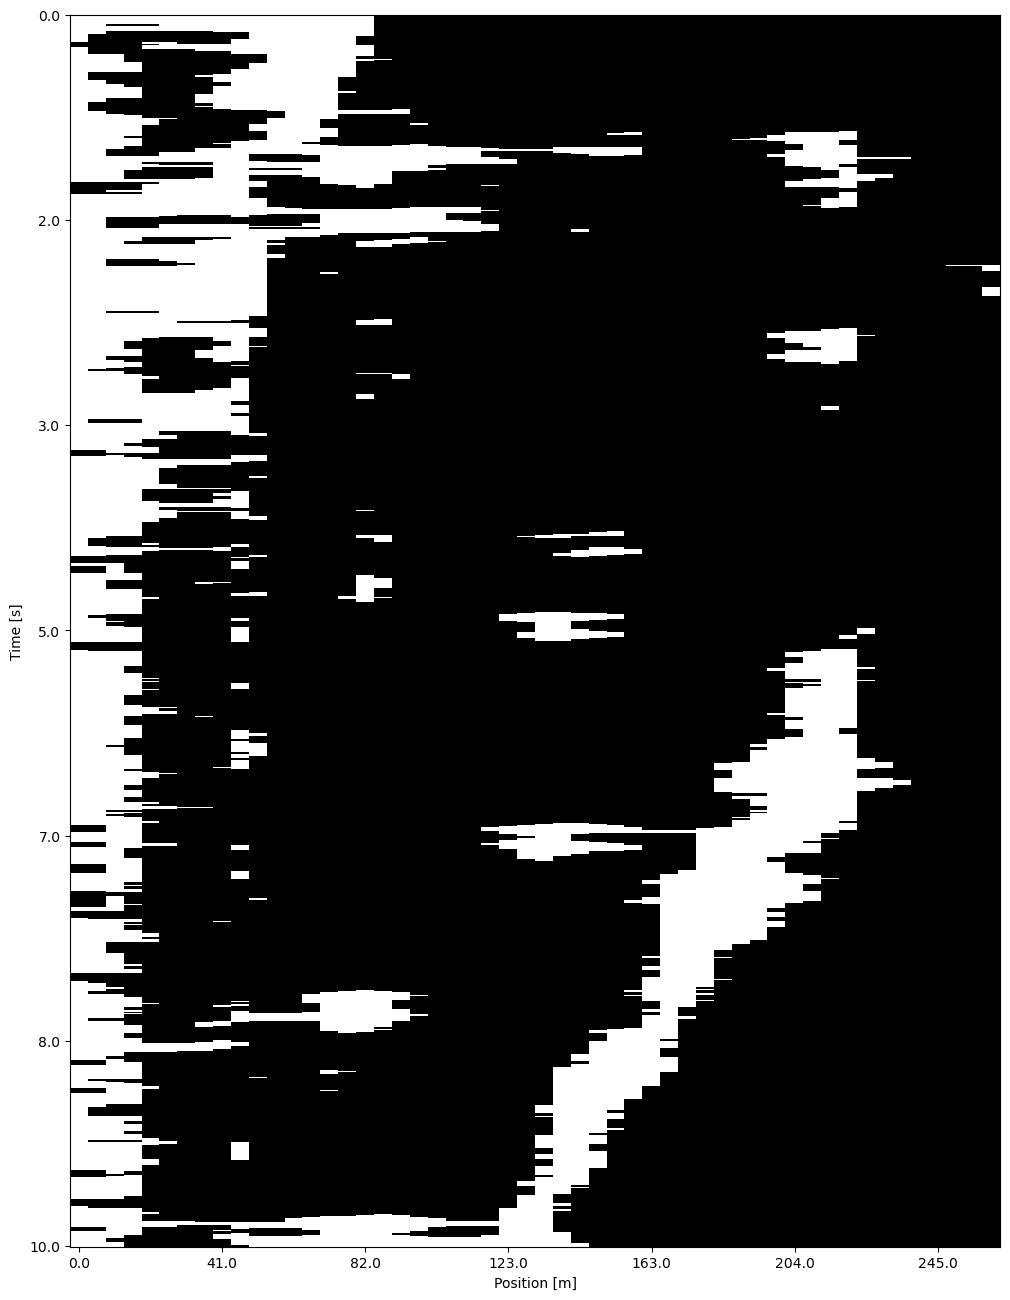

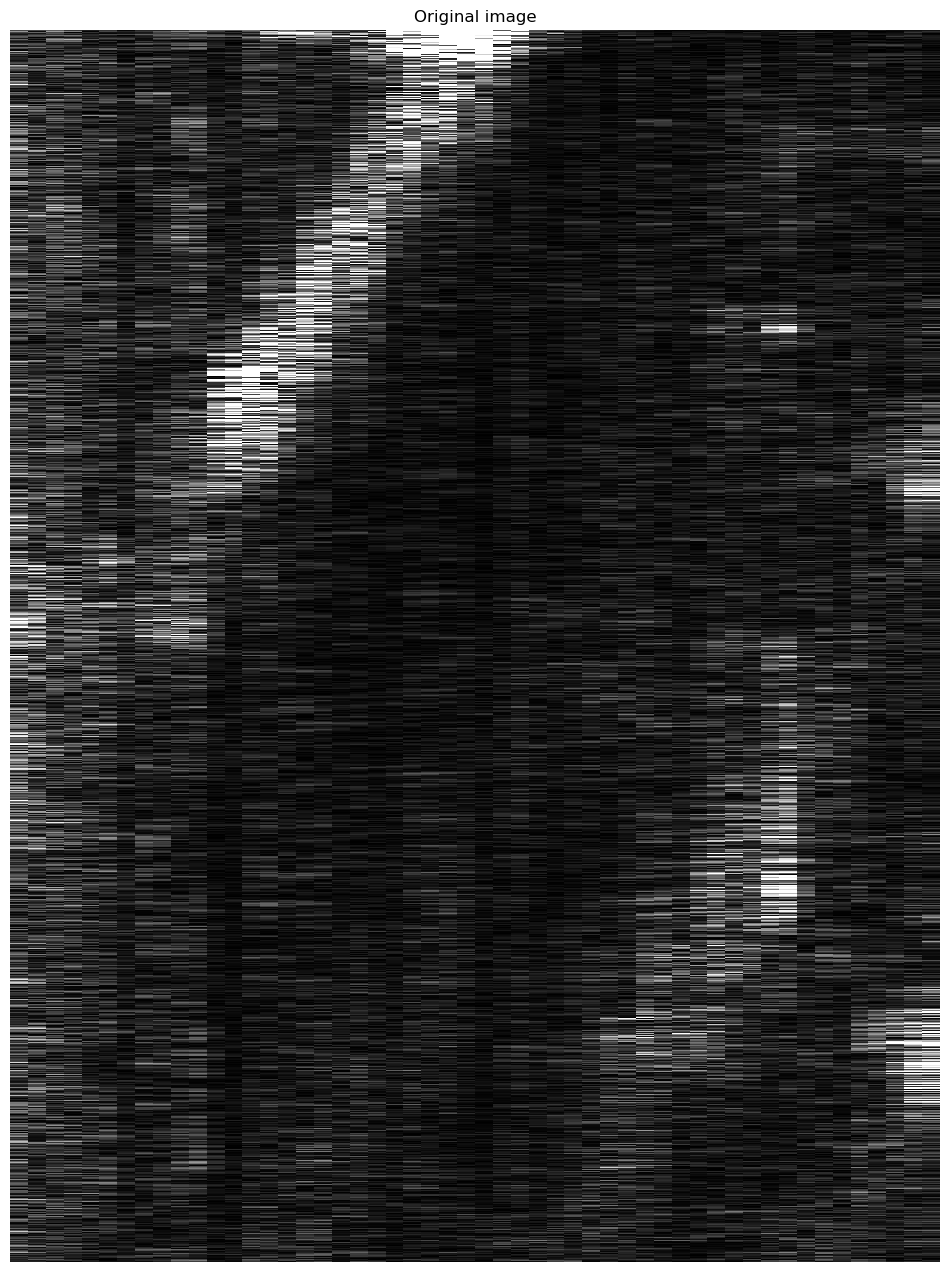

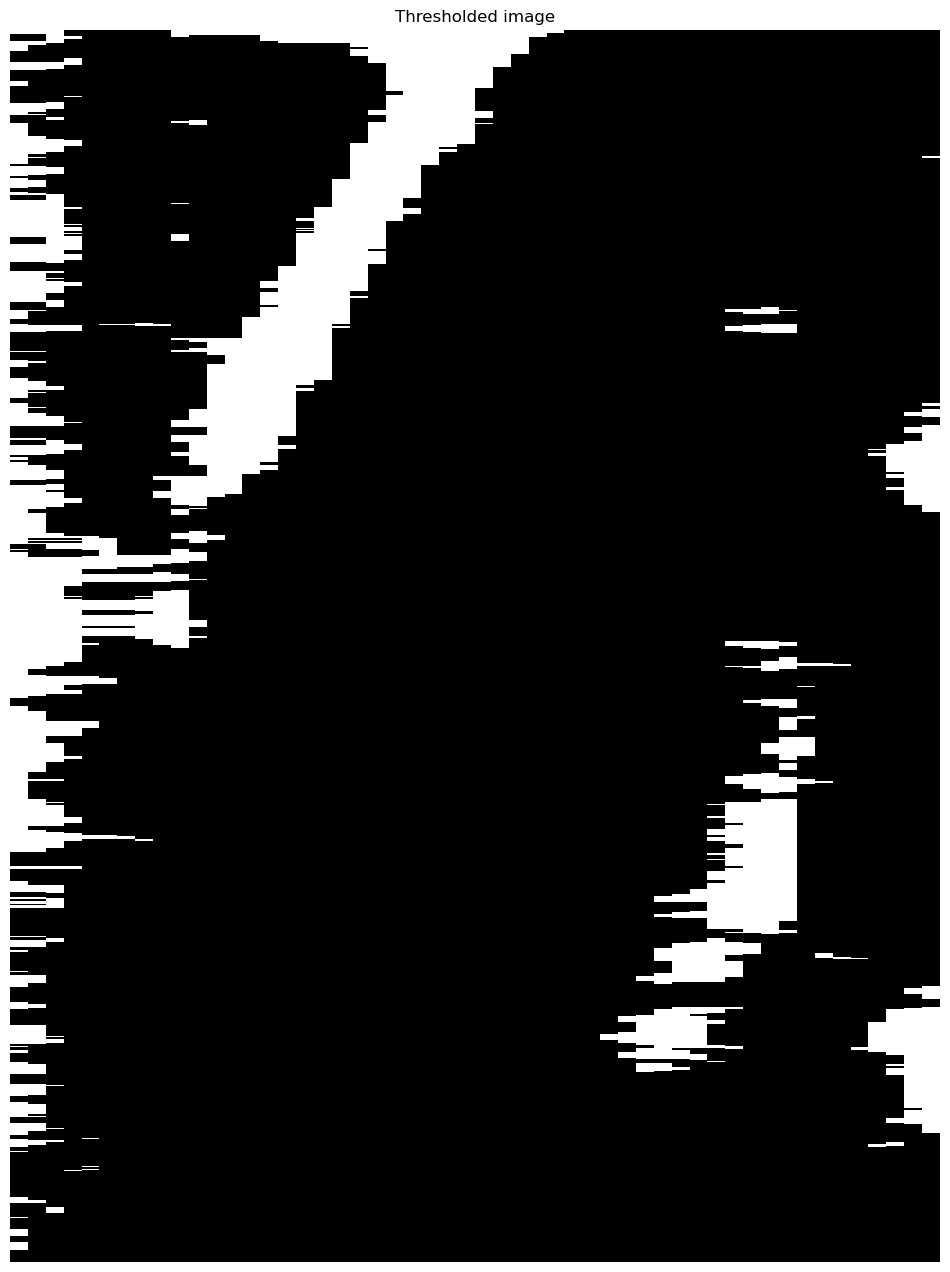

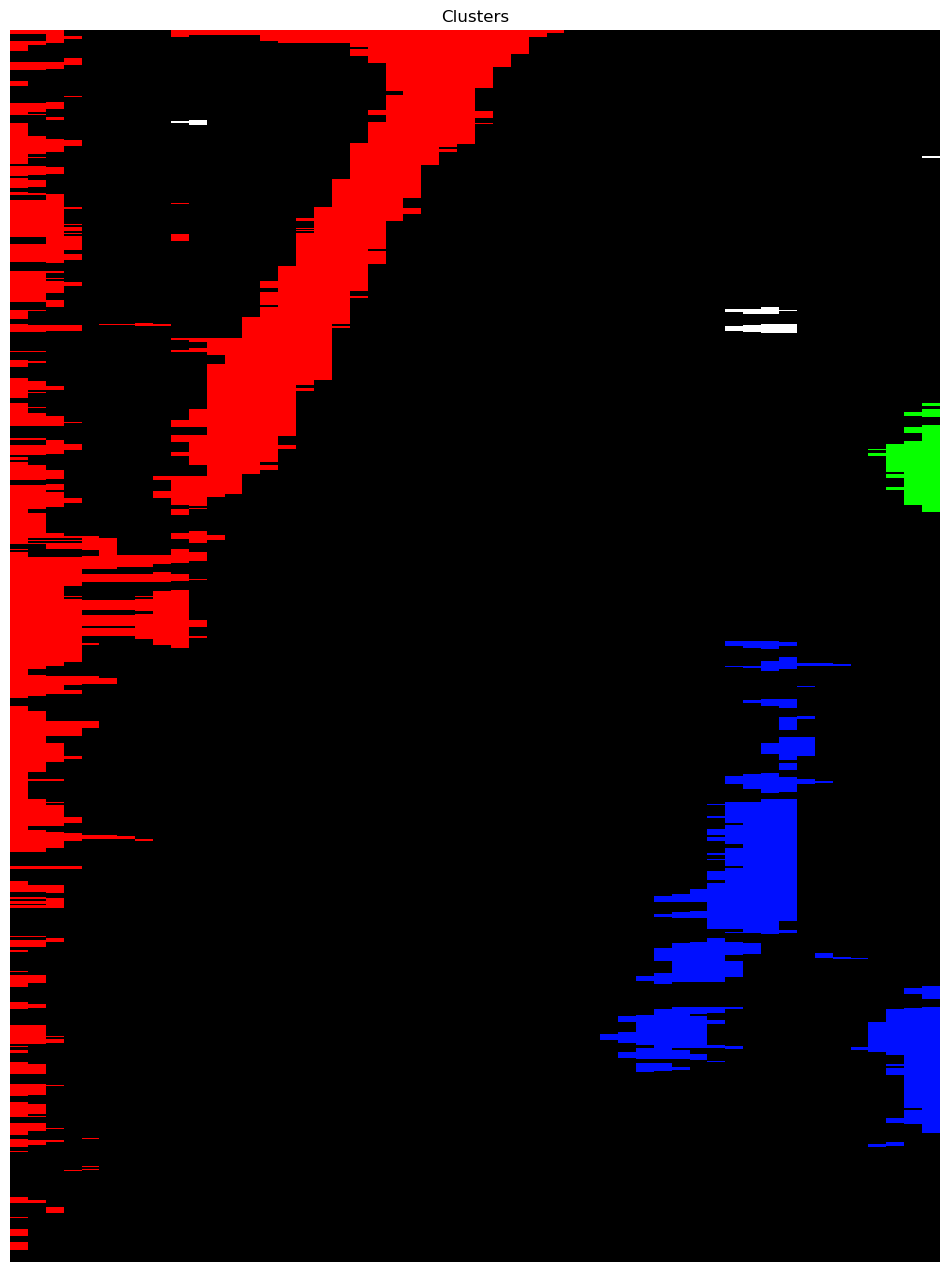

Discarded cluster 0 with R2=0.46847693709279625 (<0.5)
Discarded cluster 1 with R2=7.064736368112001e-05 (<0.5)
Discarded cluster 2 with R2=0.047264219073033686 (<0.5)


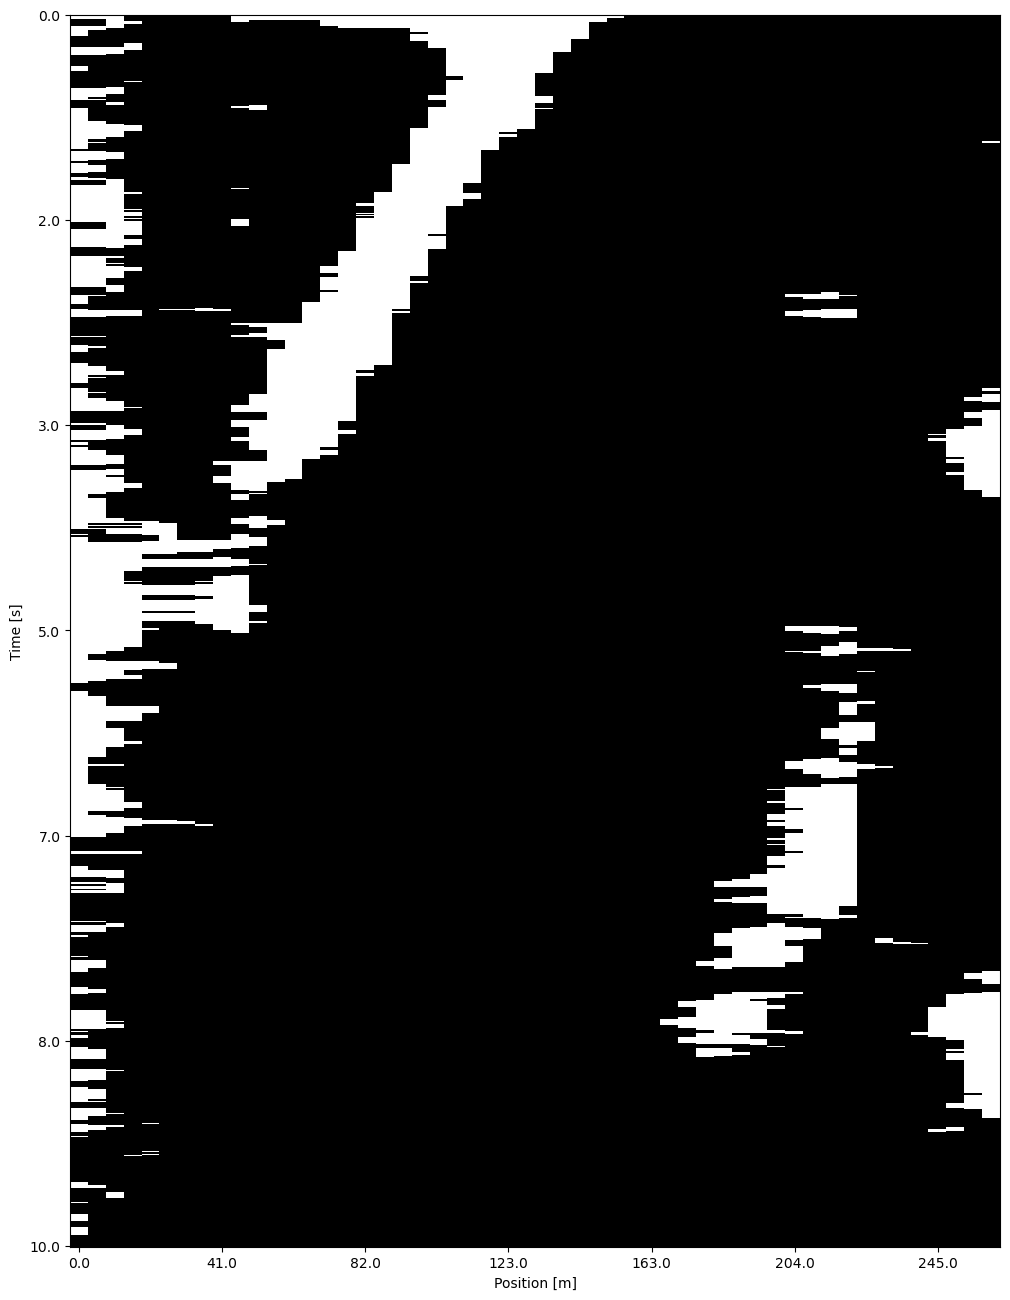

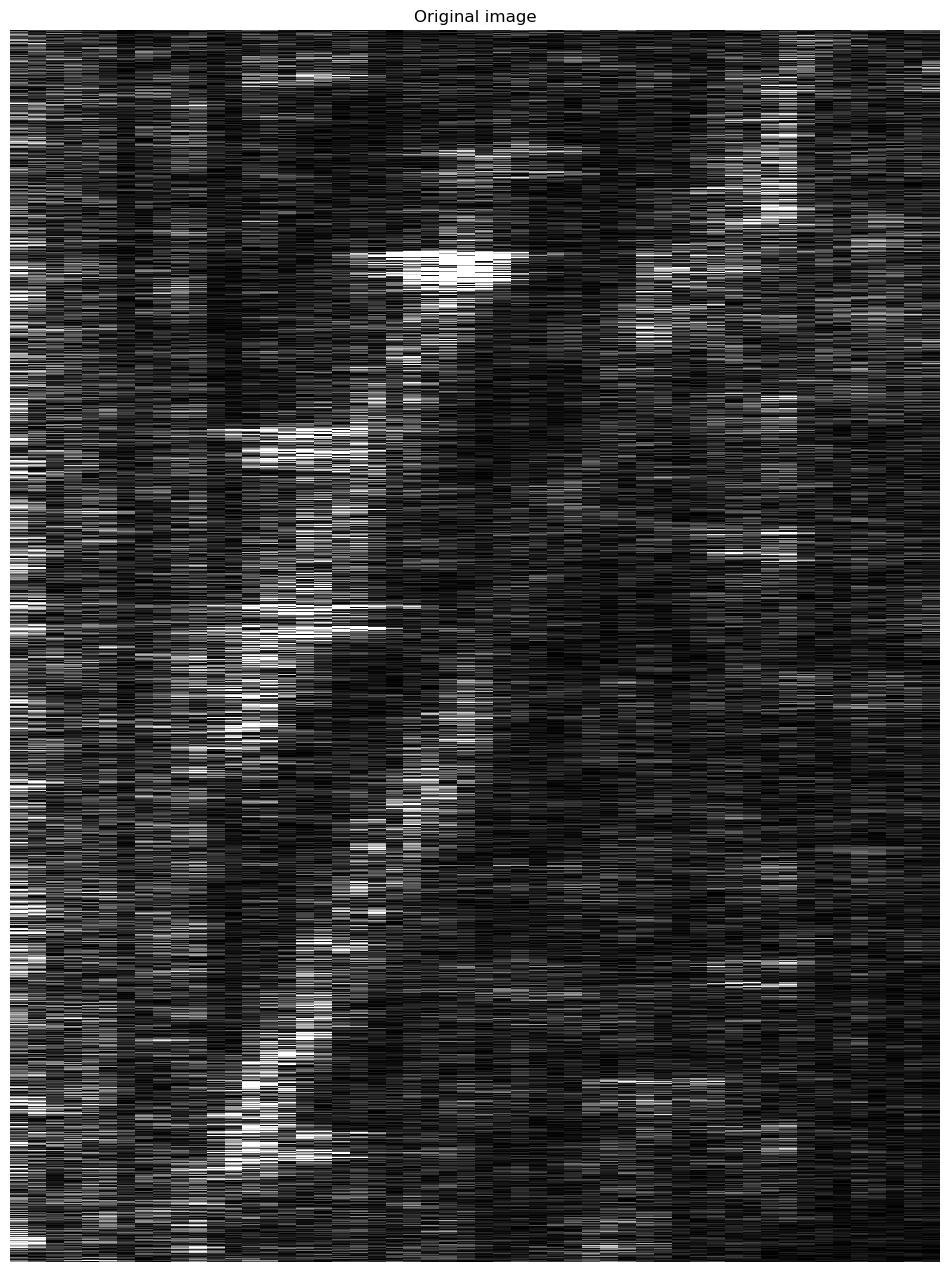

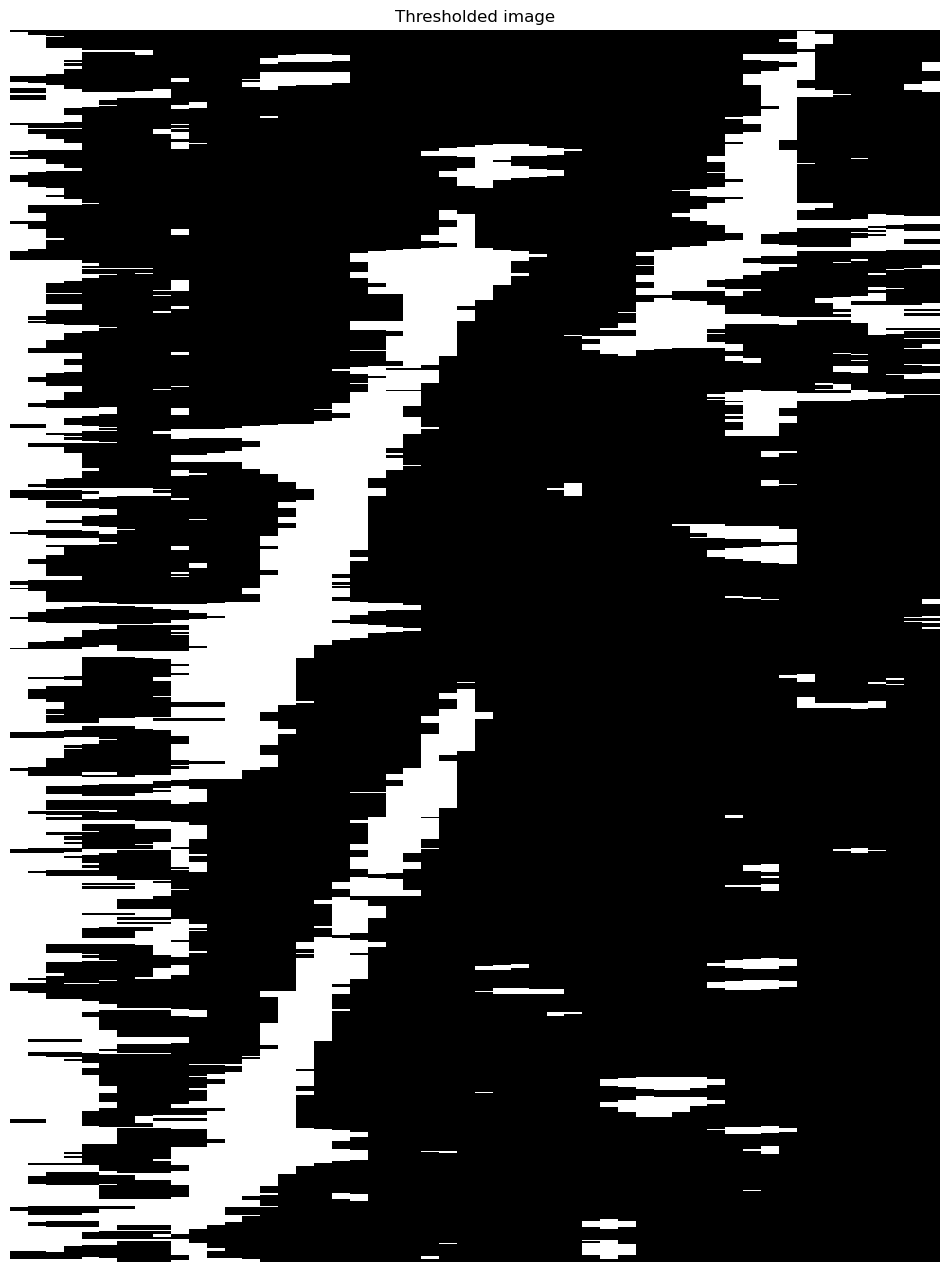

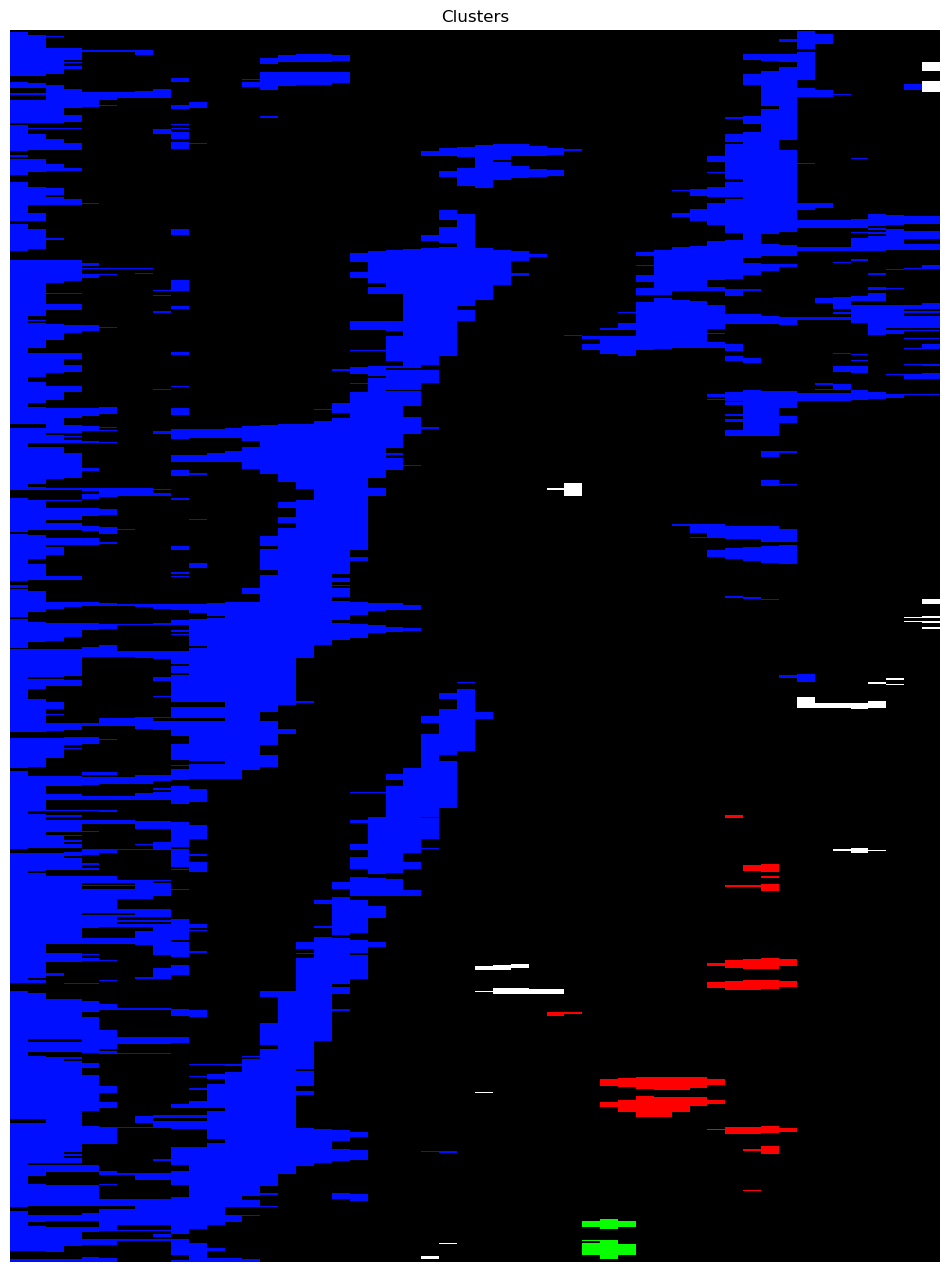

Discarded cluster 0 with R2=0.23175423138294104 (<0.5)
Discarded cluster 1 with R2=0.24588067345806675 (<0.5)
Discarded cluster 2 with R2=0.00027683129451239186 (<0.5)


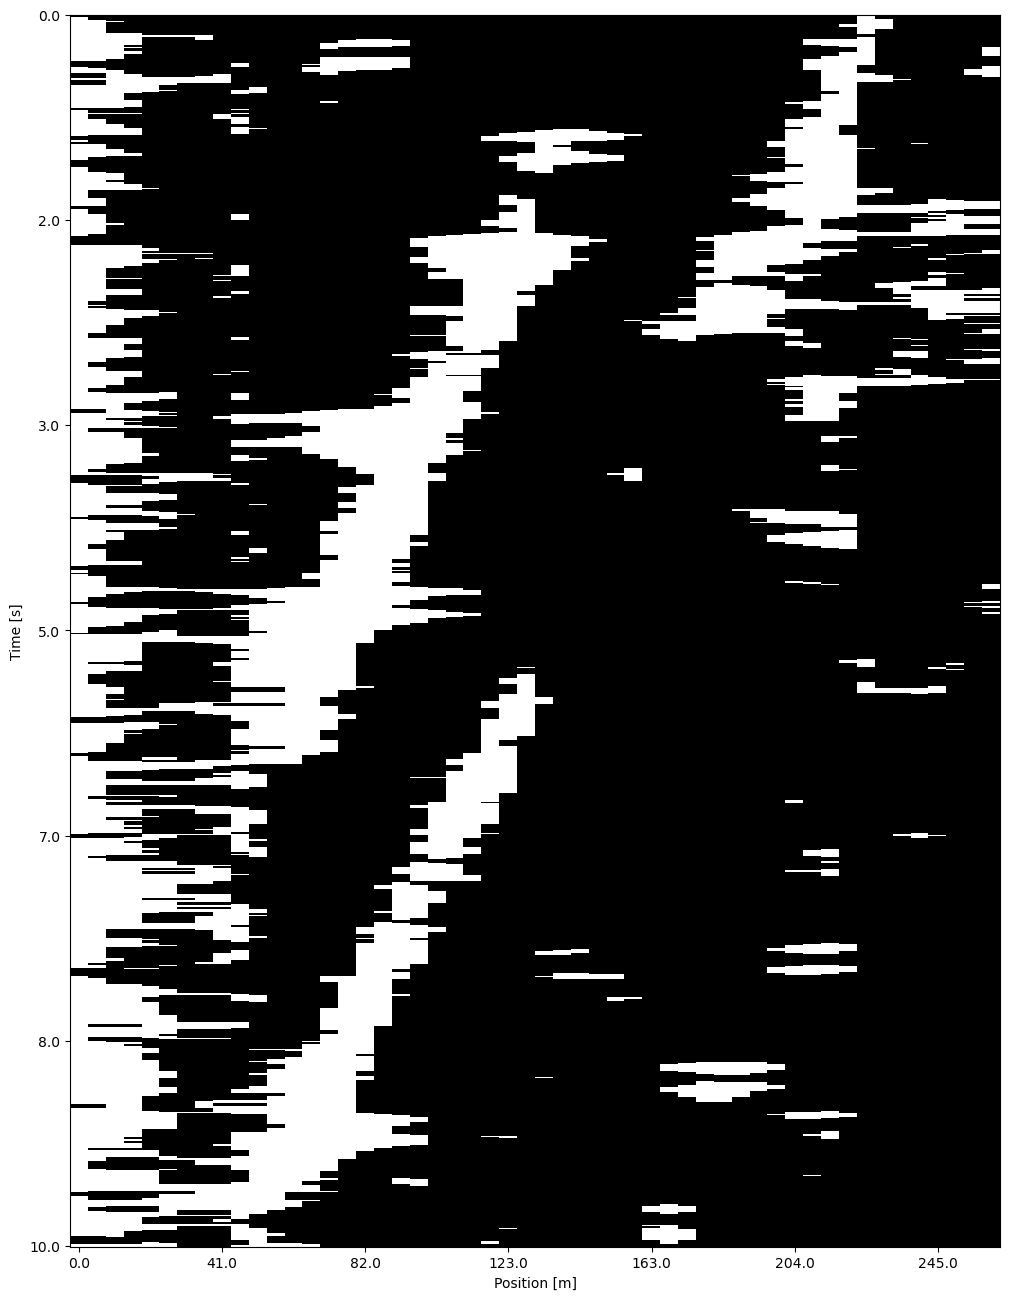

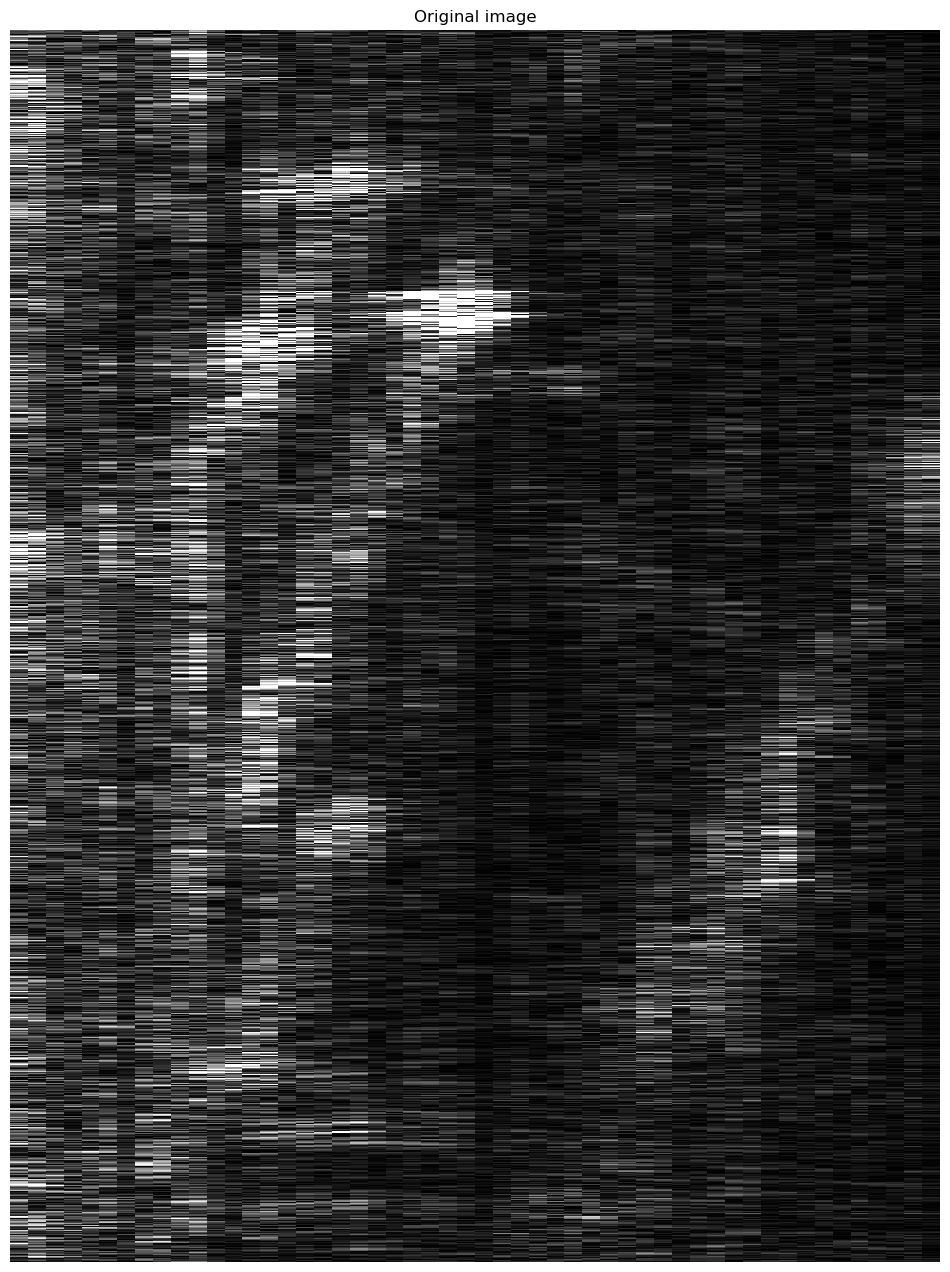

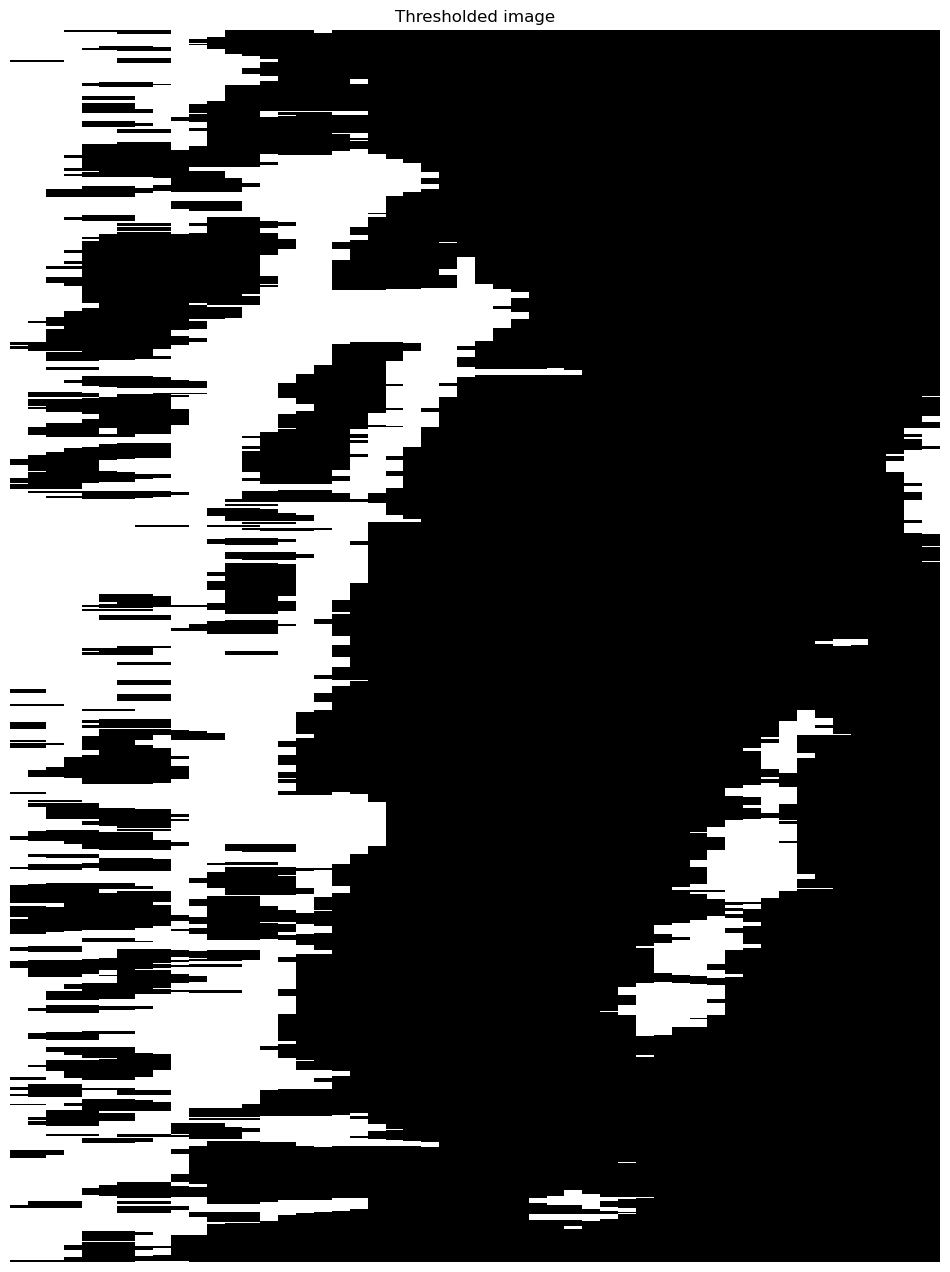

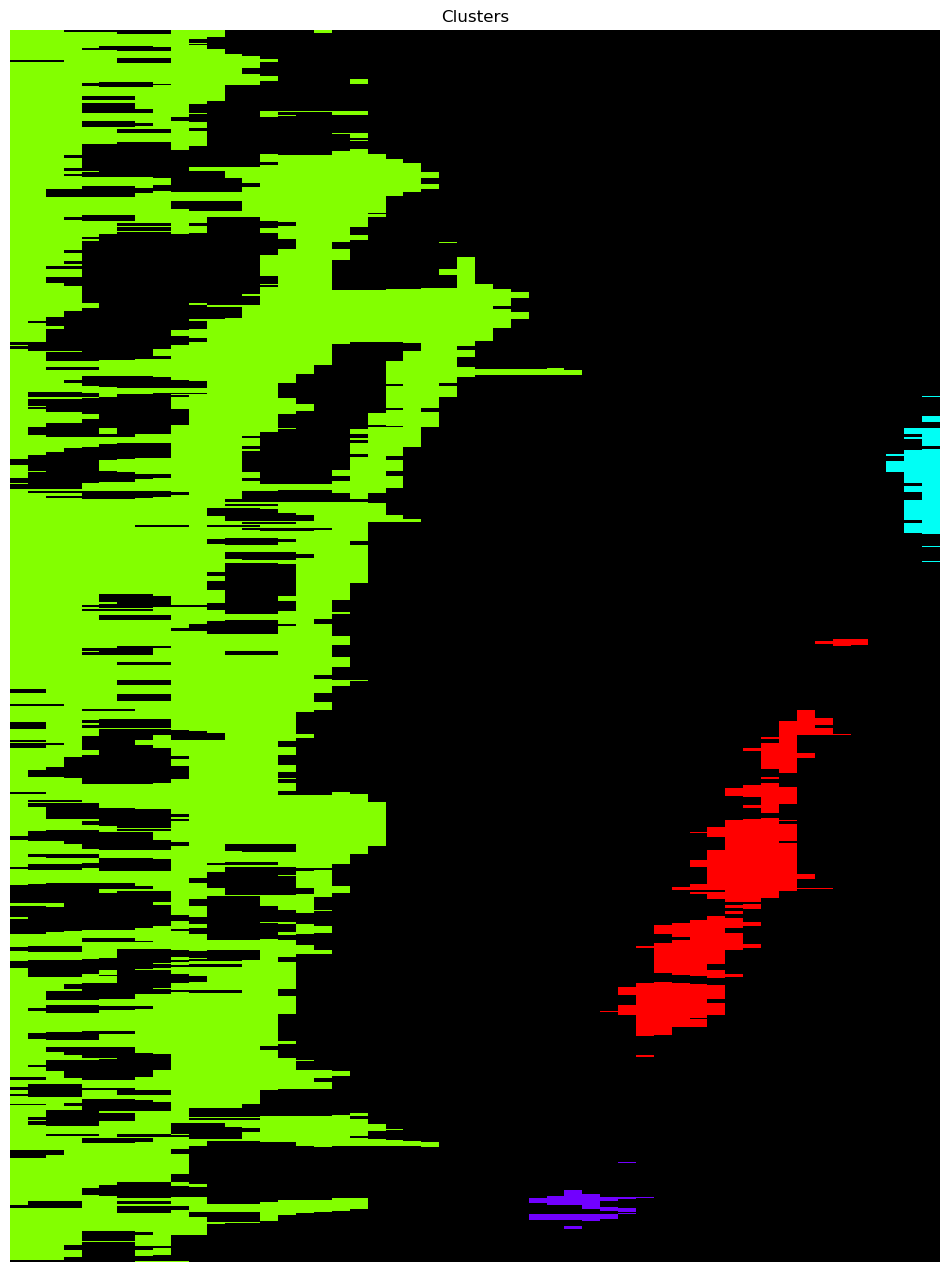

Discarded cluster 0 with R2=0.01865243034989239 (<0.5)
Discarded cluster 1 with R2=2.2562509638390793e-08 (<0.5)
Detected velocity: 22.34 m/s (80.42 km/h)

Discarded cluster 3 with R2=0.016397687994950227 (<0.5)


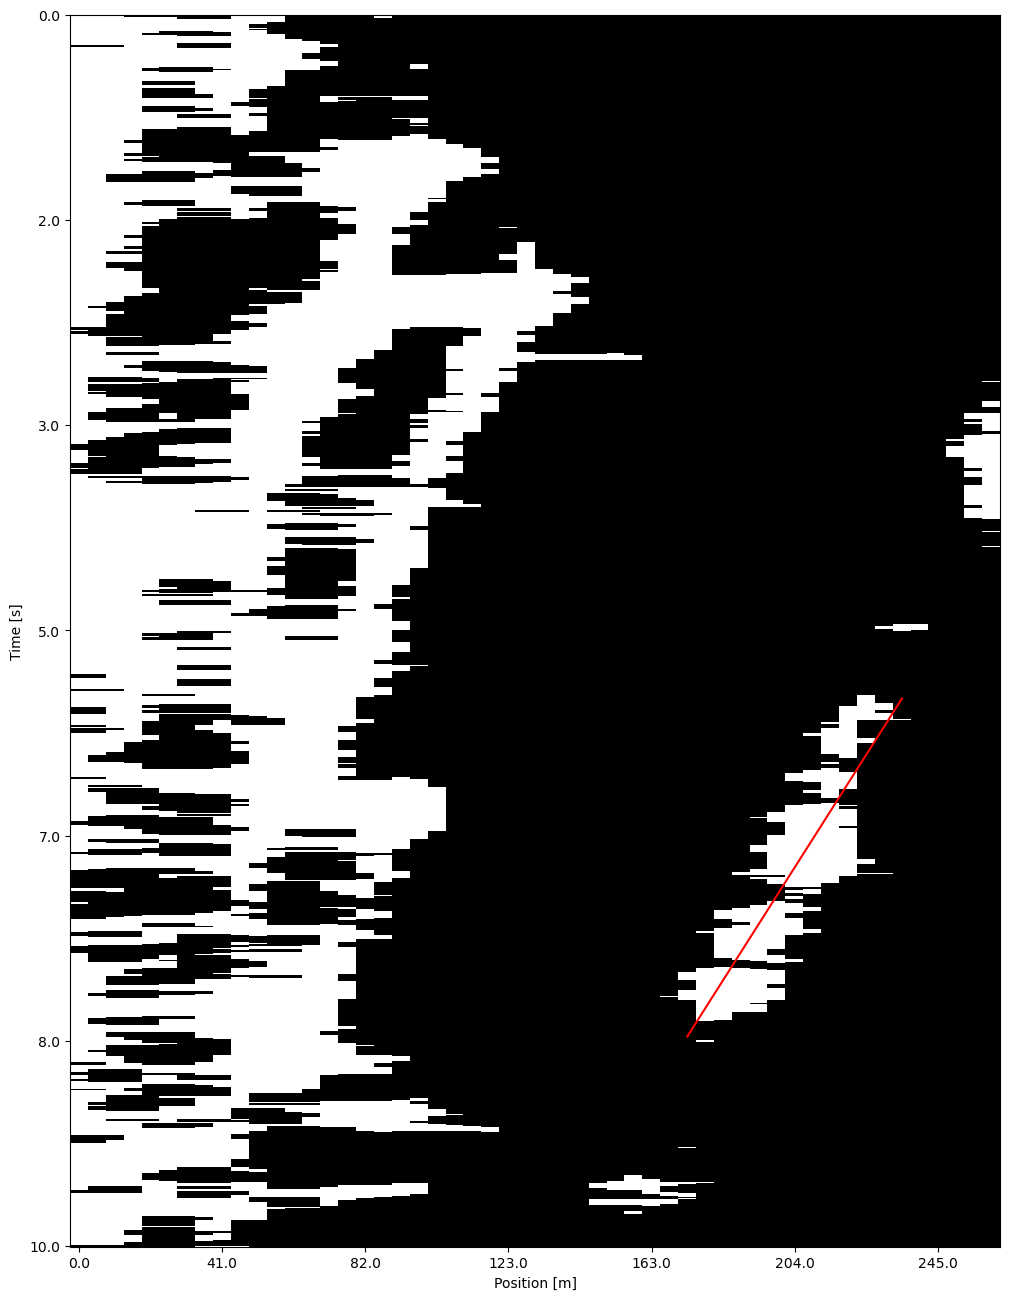

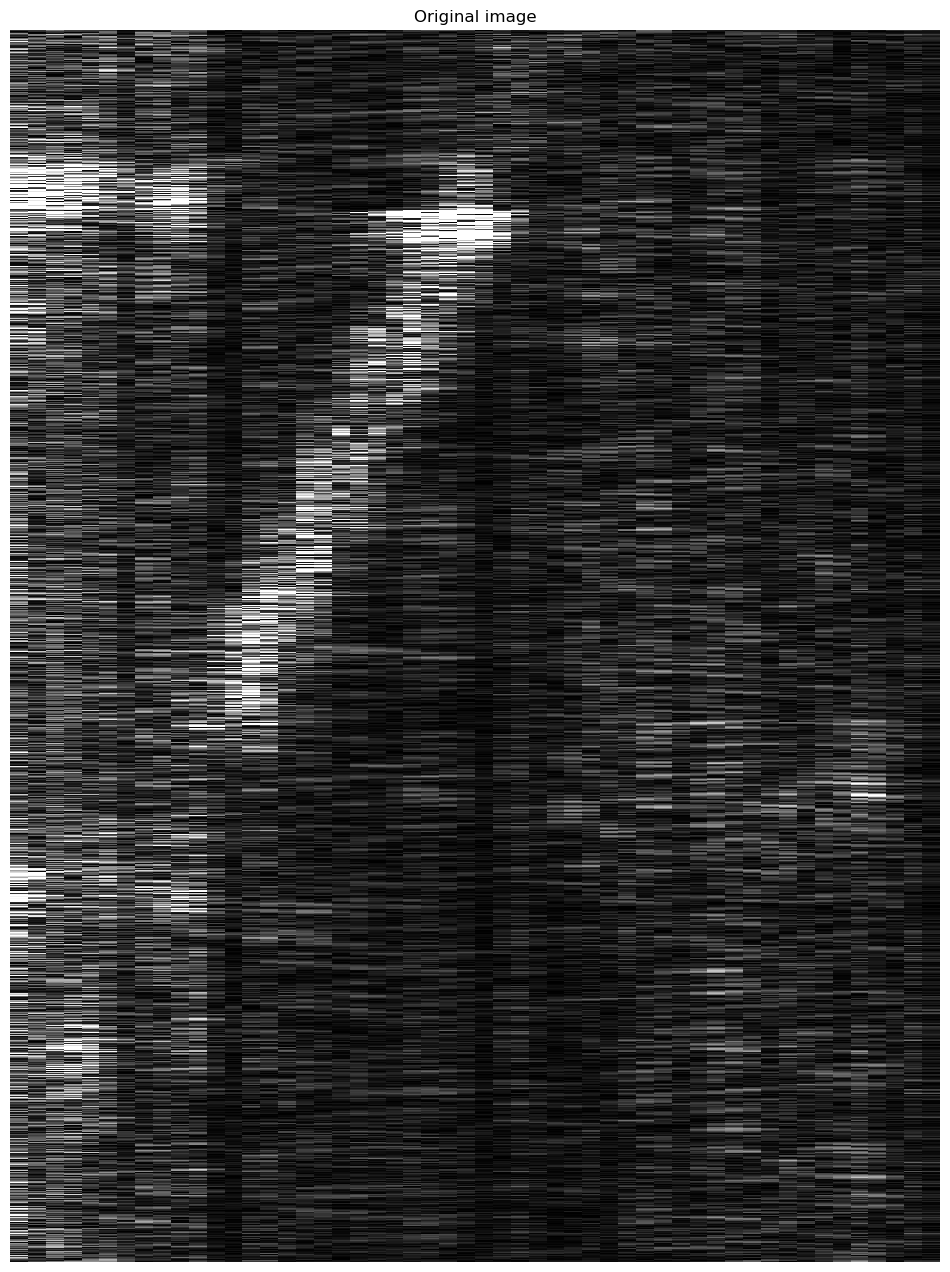

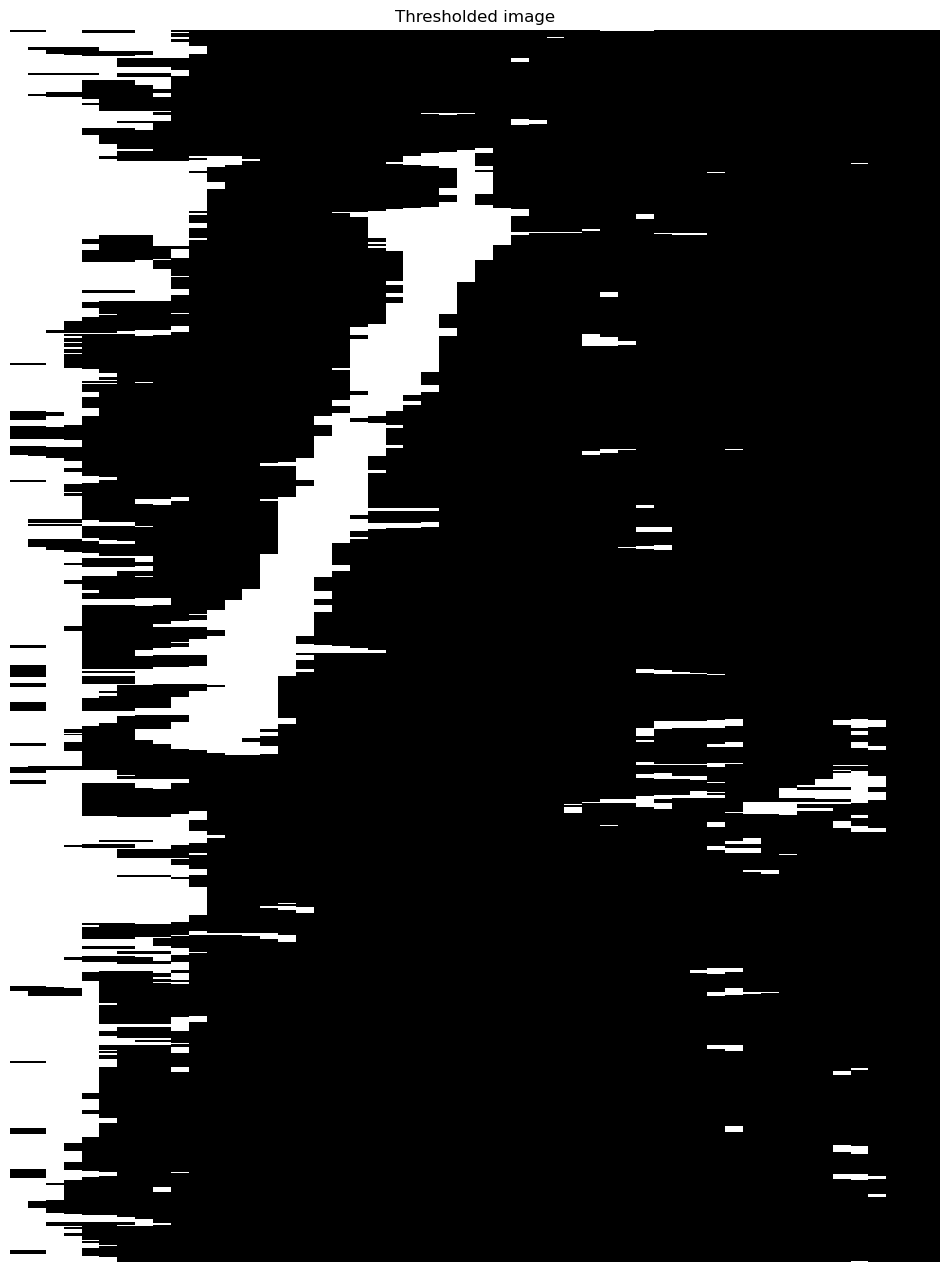

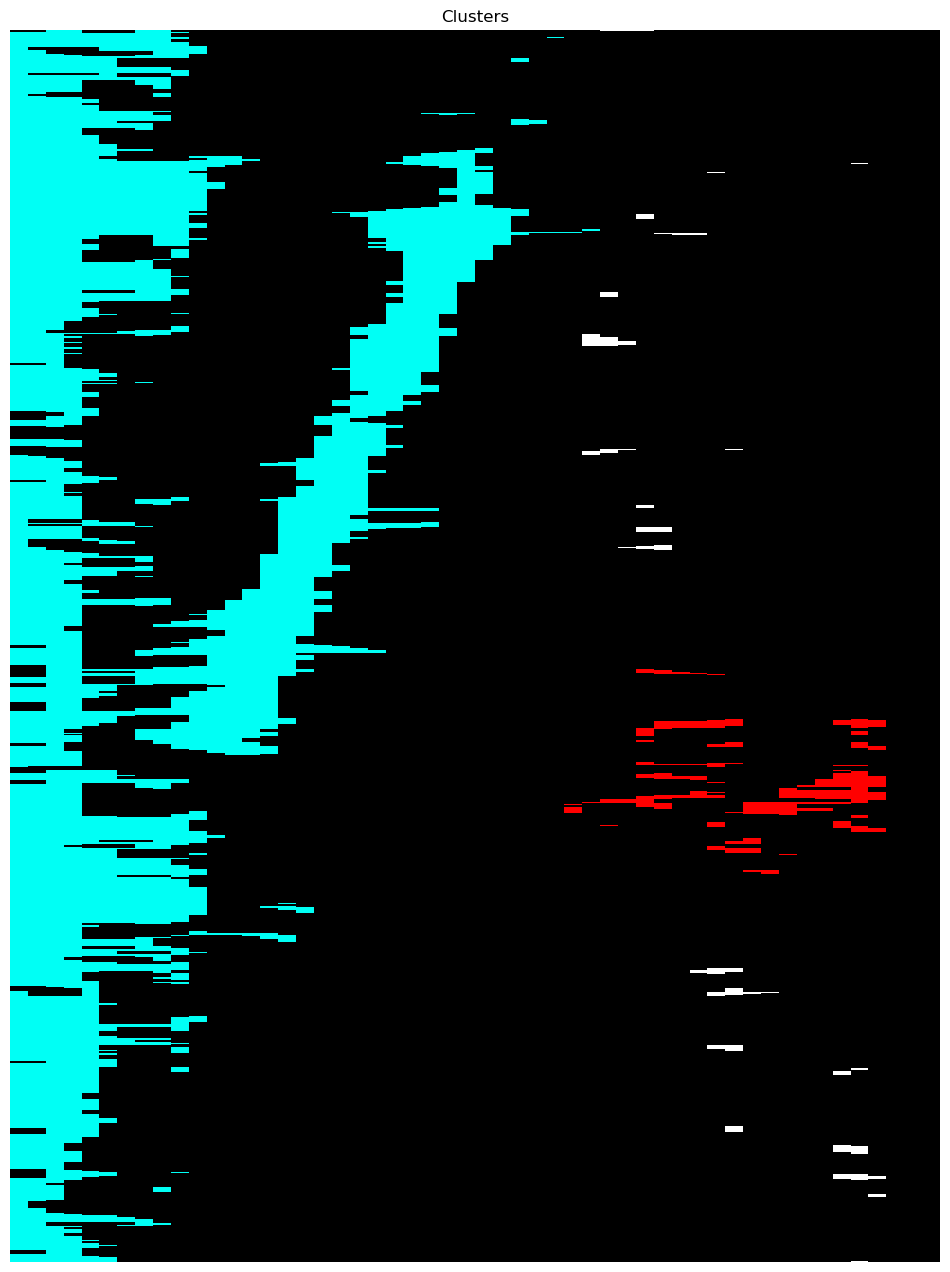

Discarded cluster 0 with R2=0.09295947534288607 (<0.5)
Discarded cluster 1 with R2=0.010581045315101179 (<0.5)


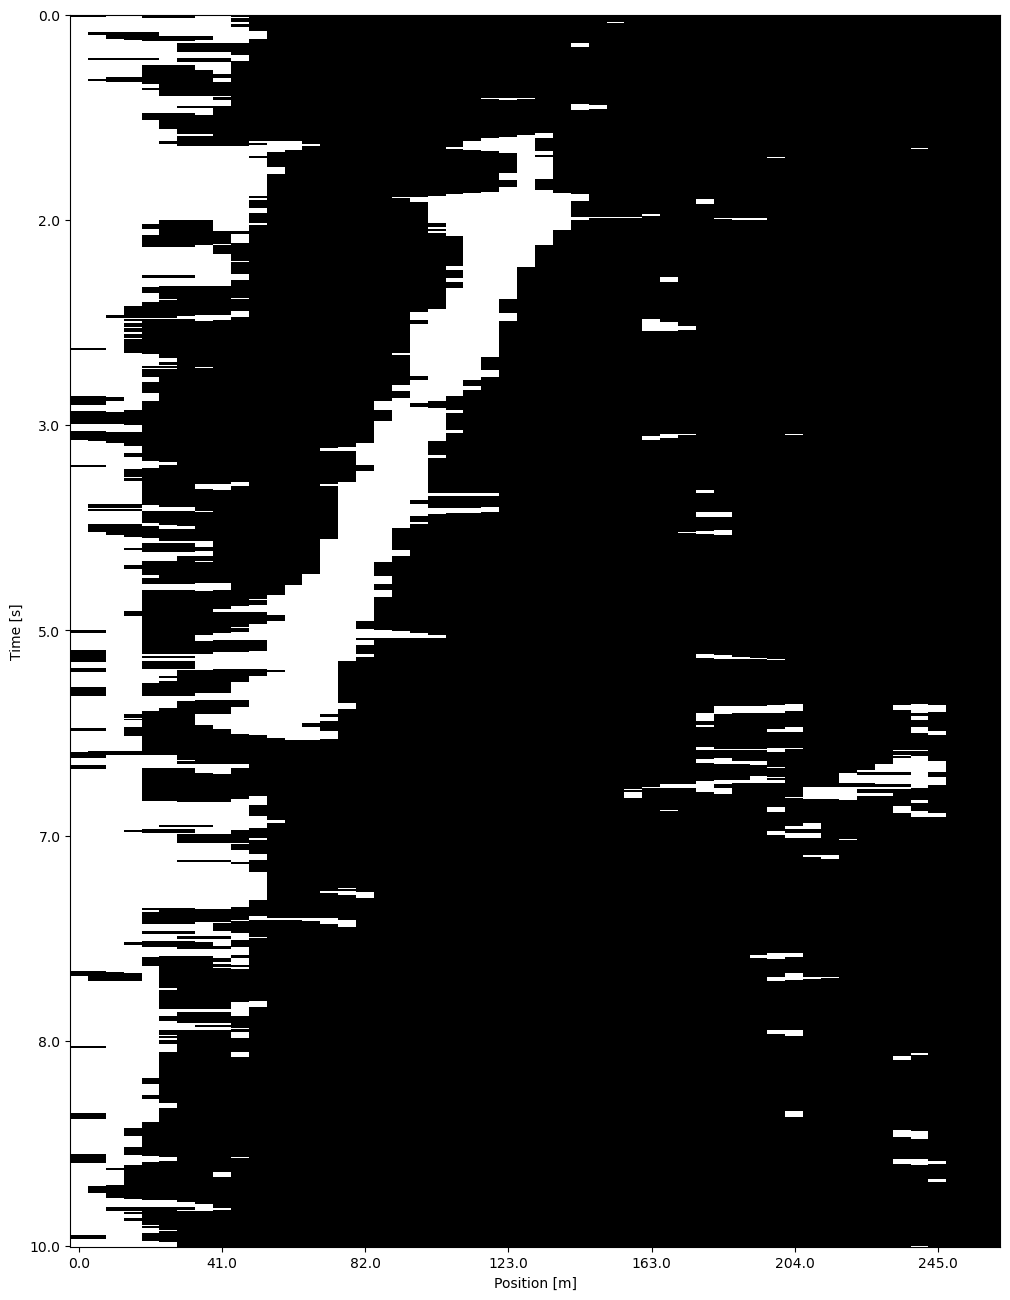

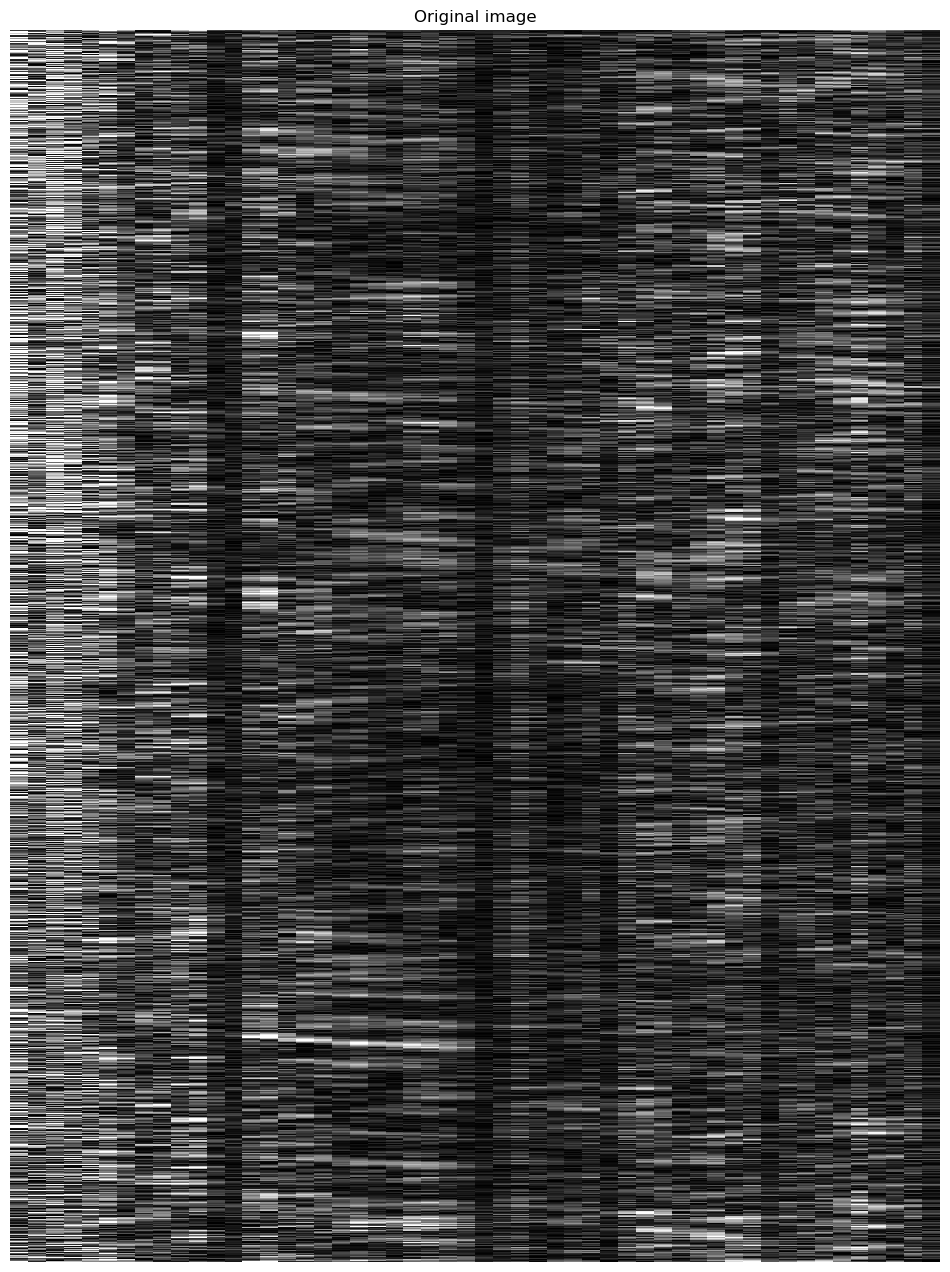

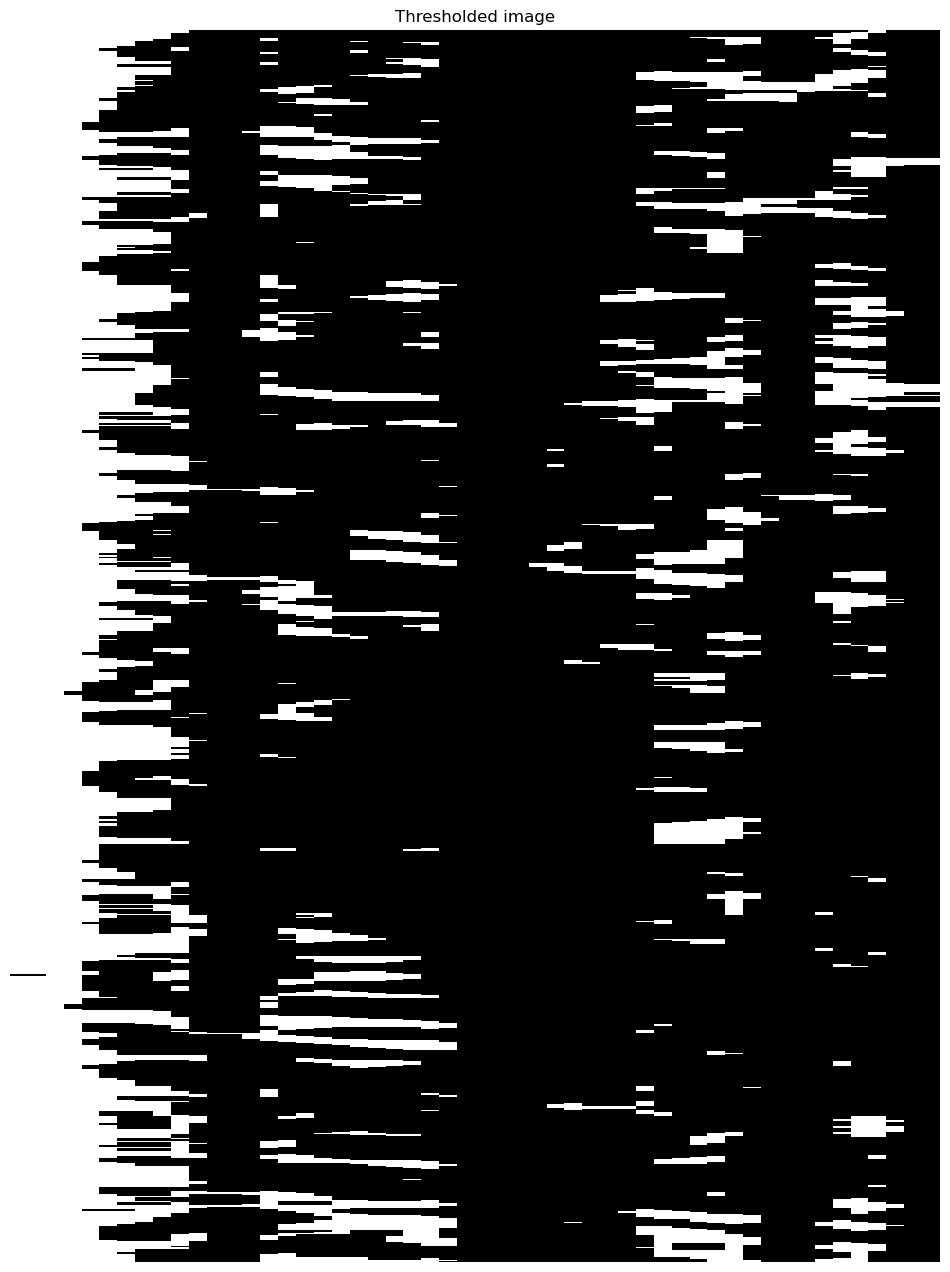

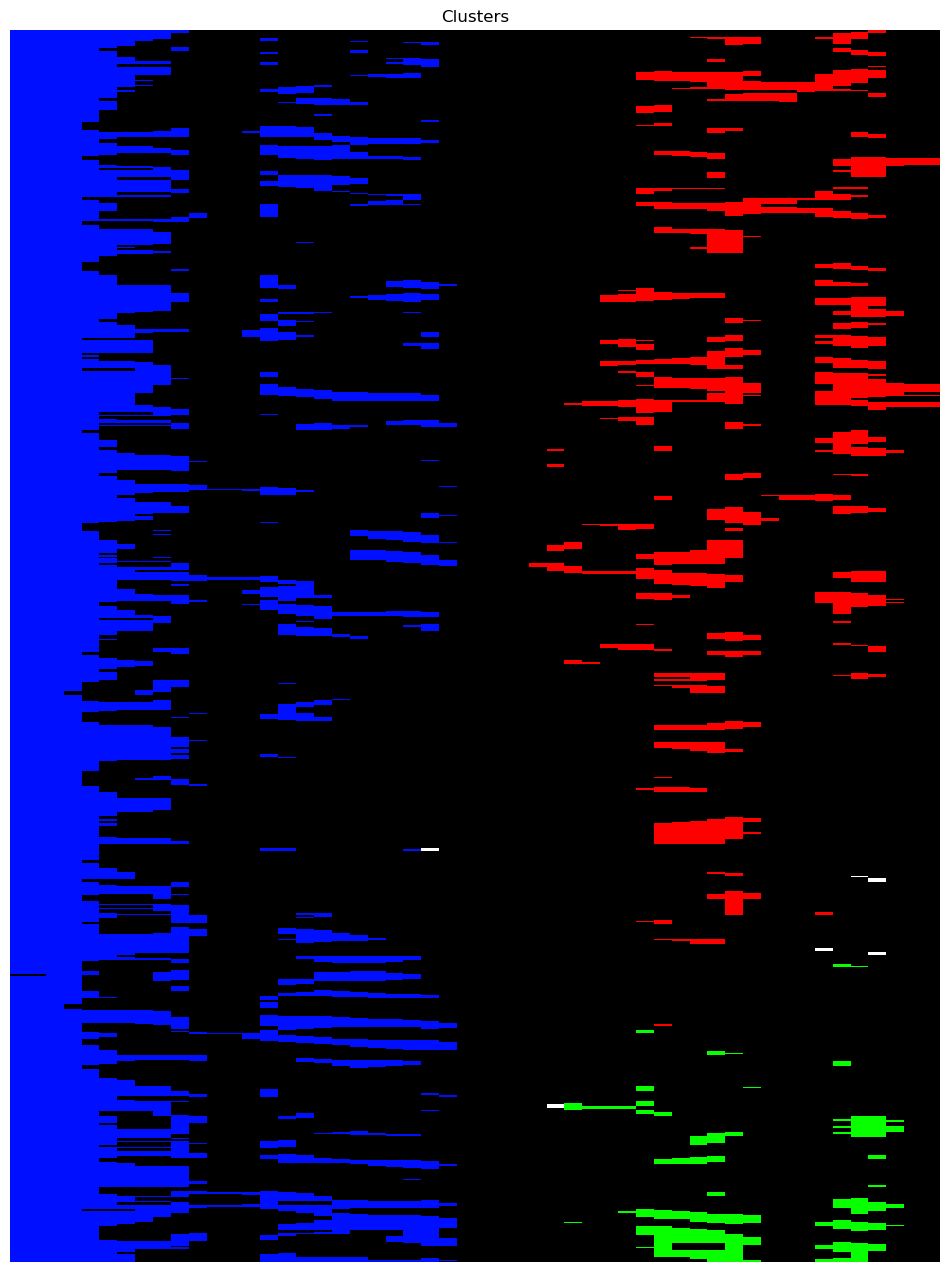

Discarded cluster 0 with R2=0.009944054018333093 (<0.5)
Discarded cluster 1 with R2=0.07433752038429586 (<0.5)
Discarded cluster 2 with R2=0.001958094868909299 (<0.5)


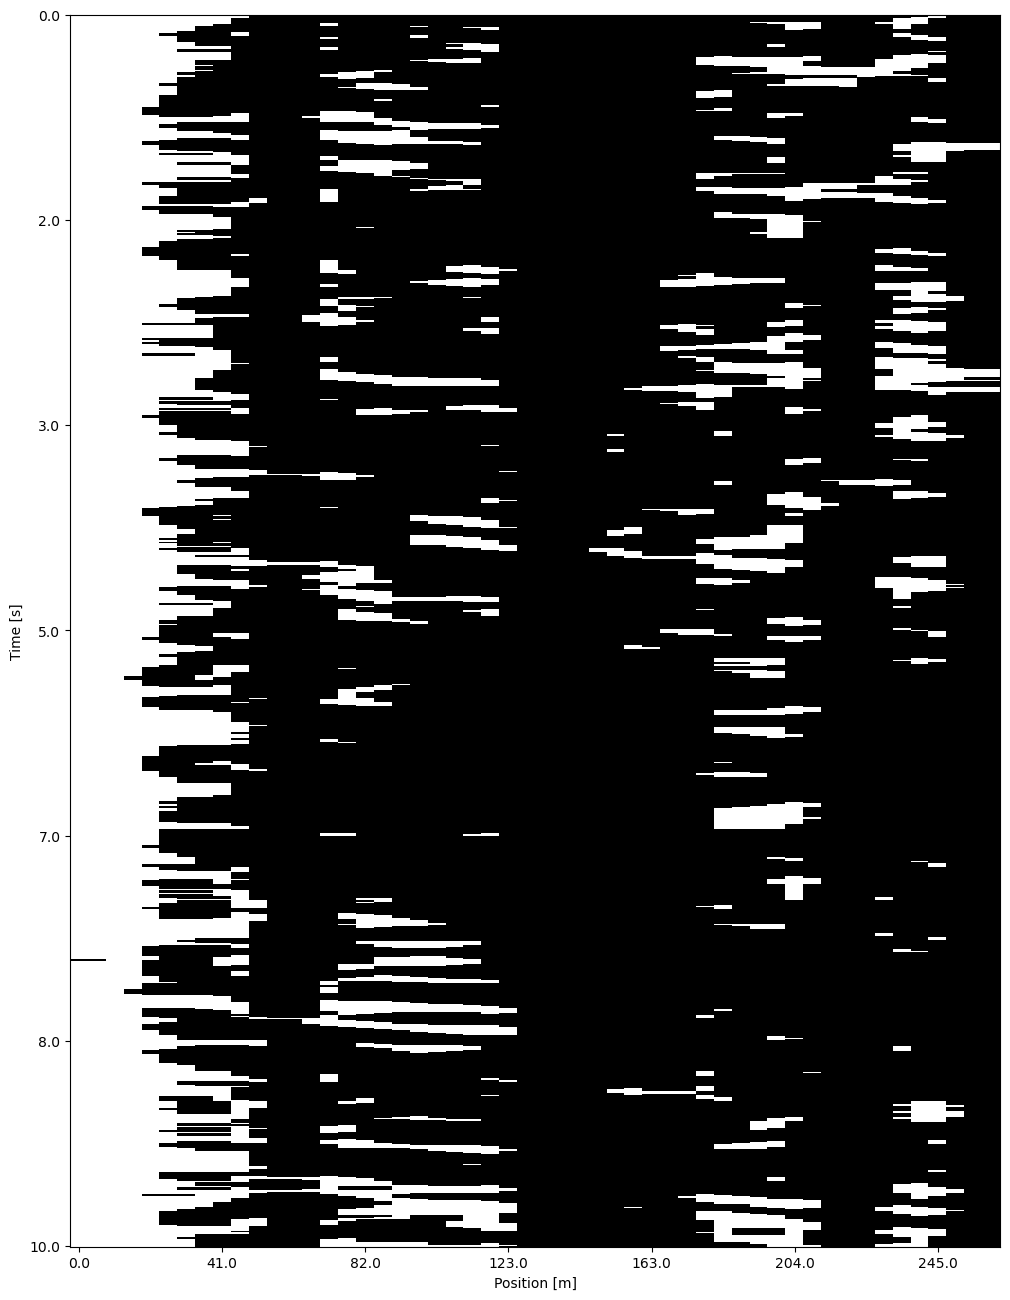

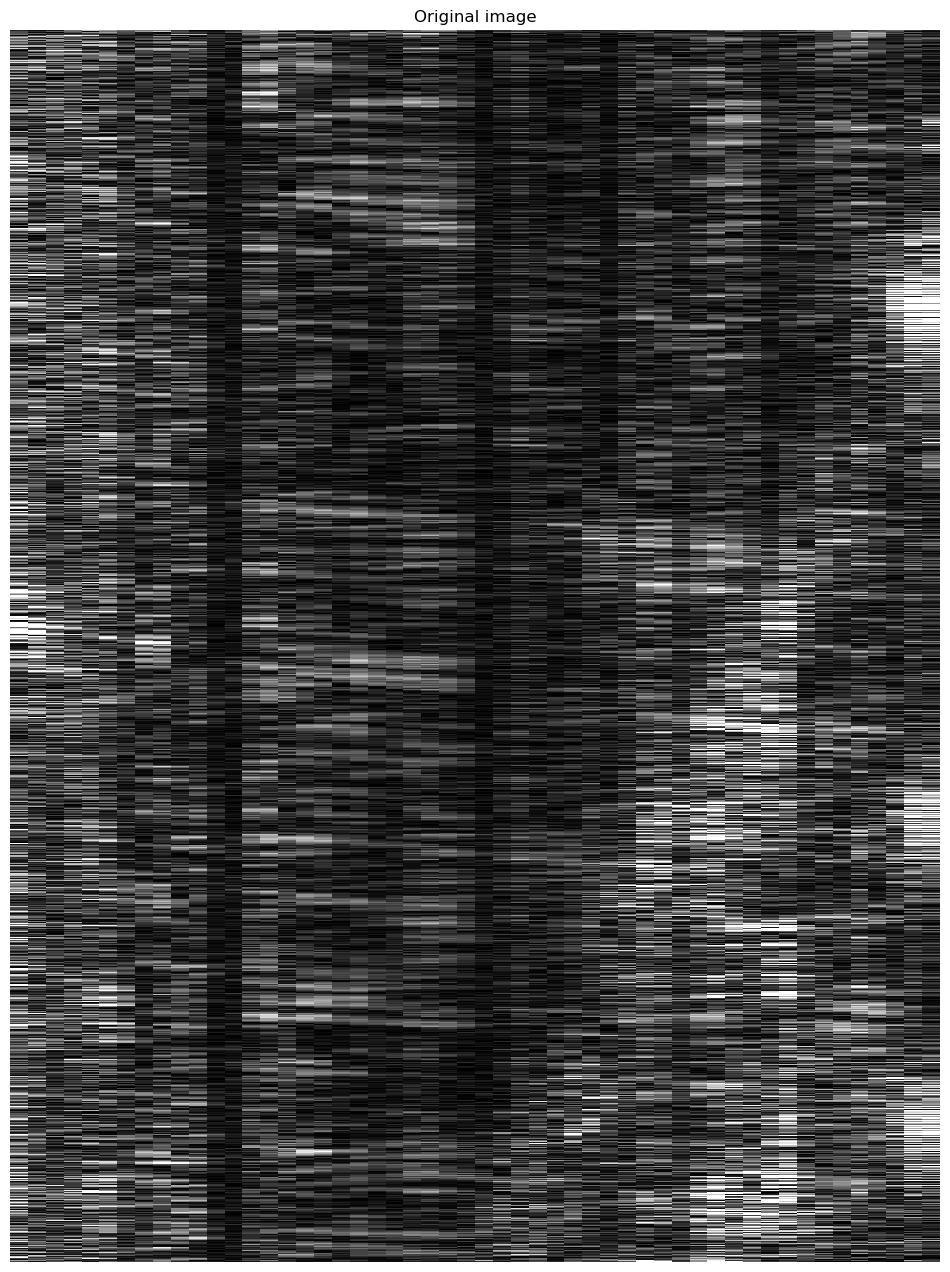

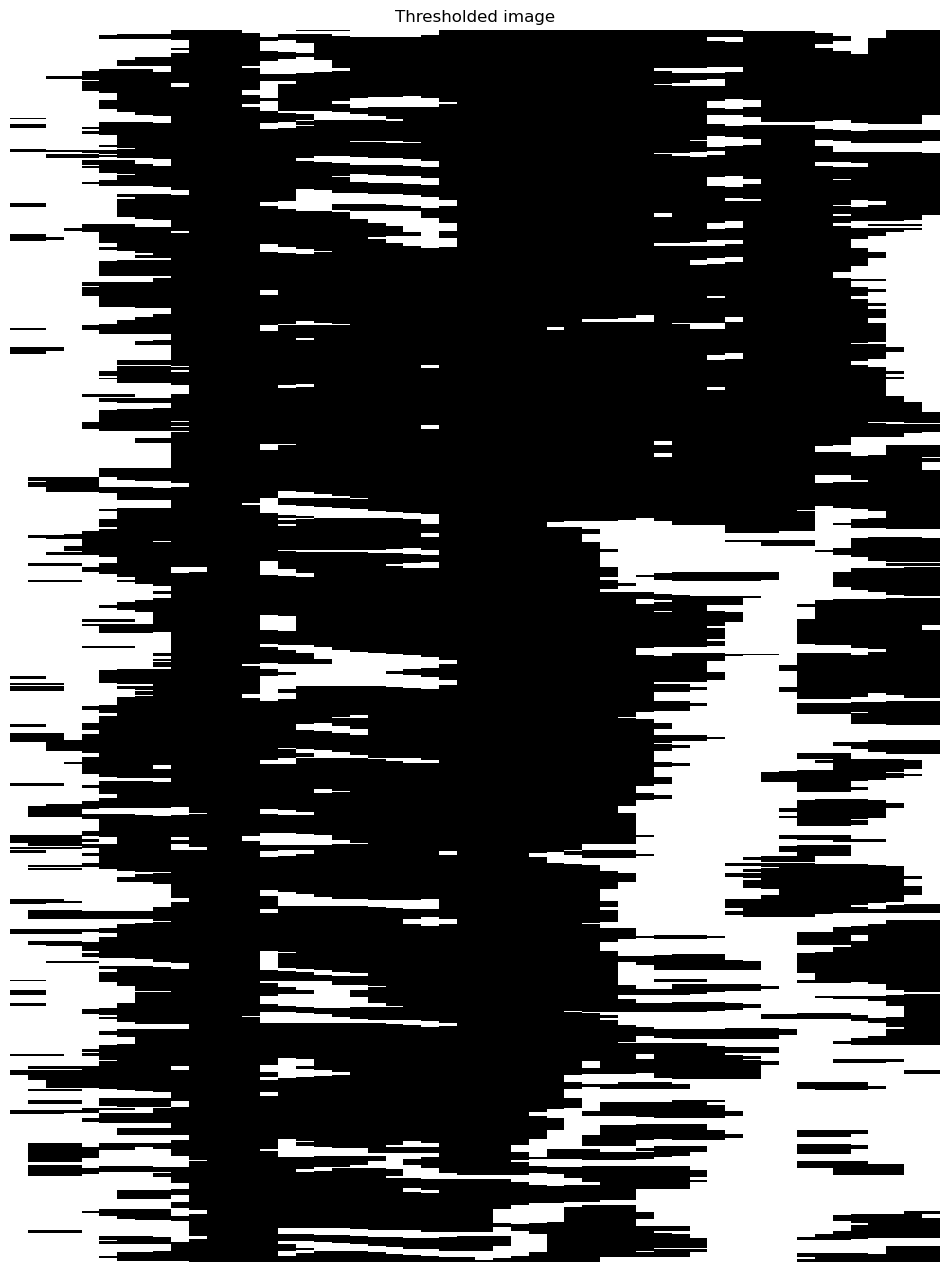

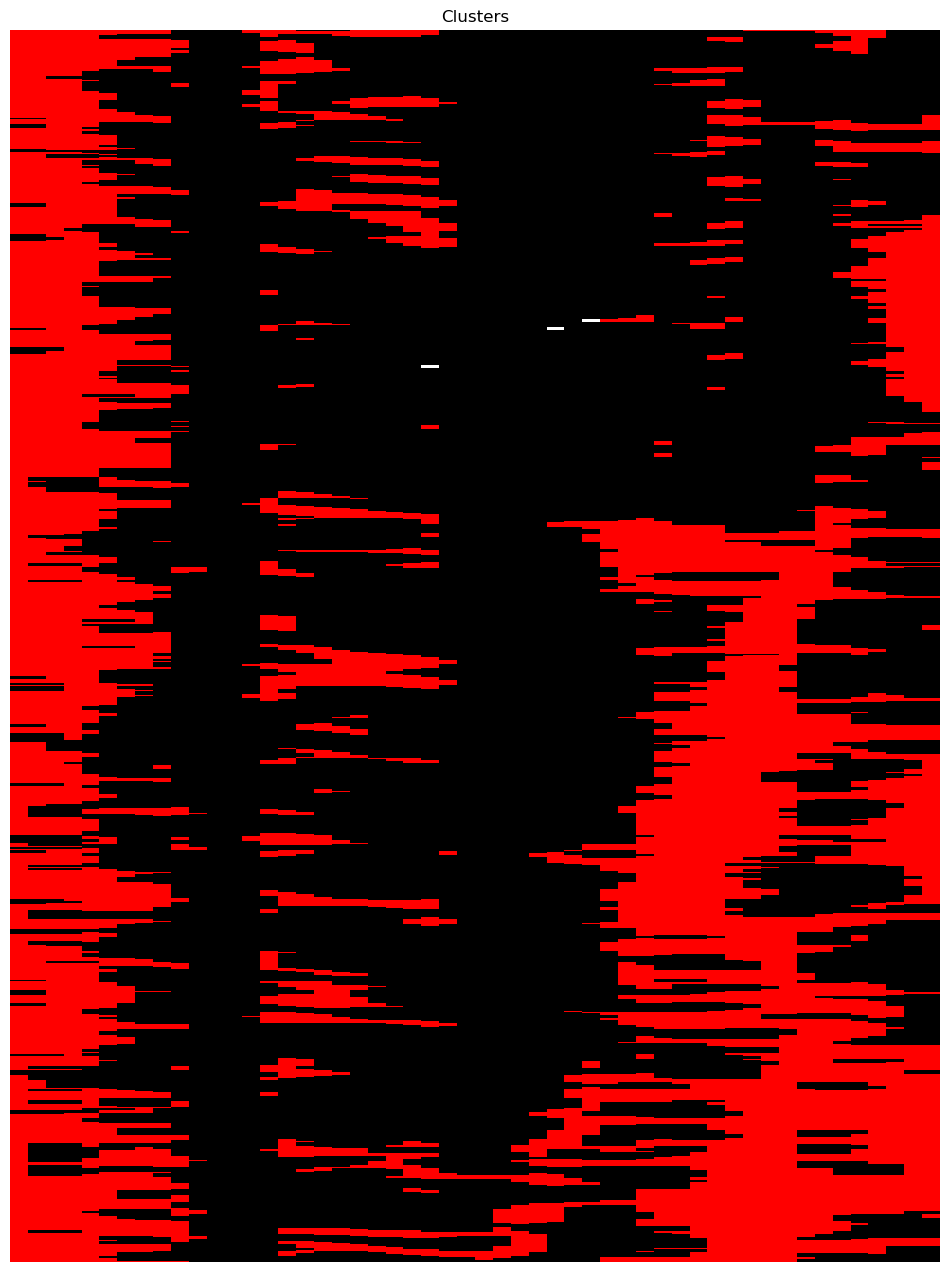

Discarded cluster 0 with R2=0.05622813082415623 (<0.5)


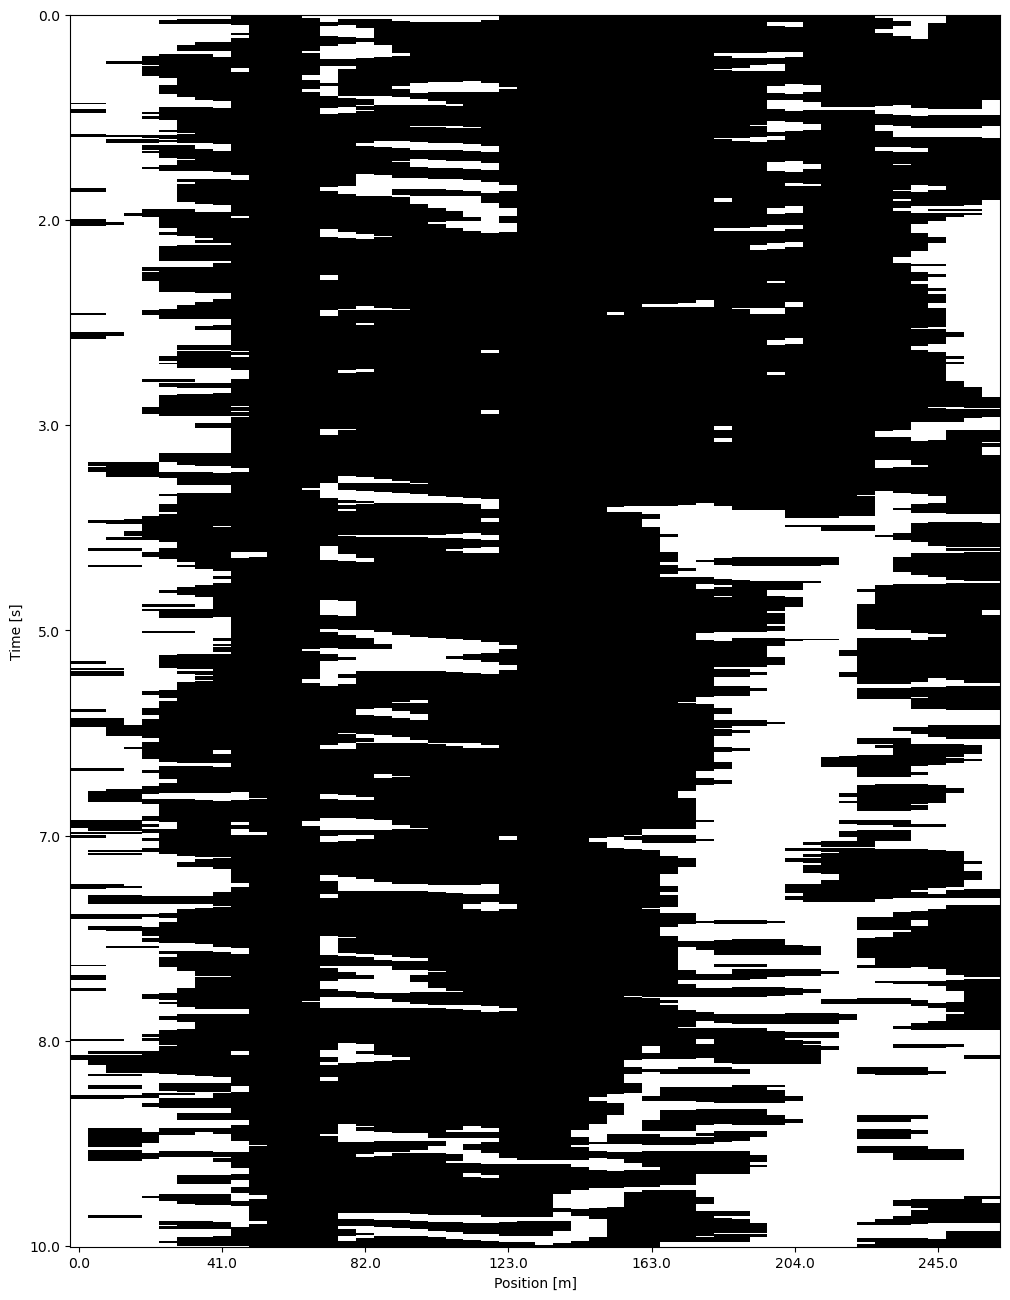

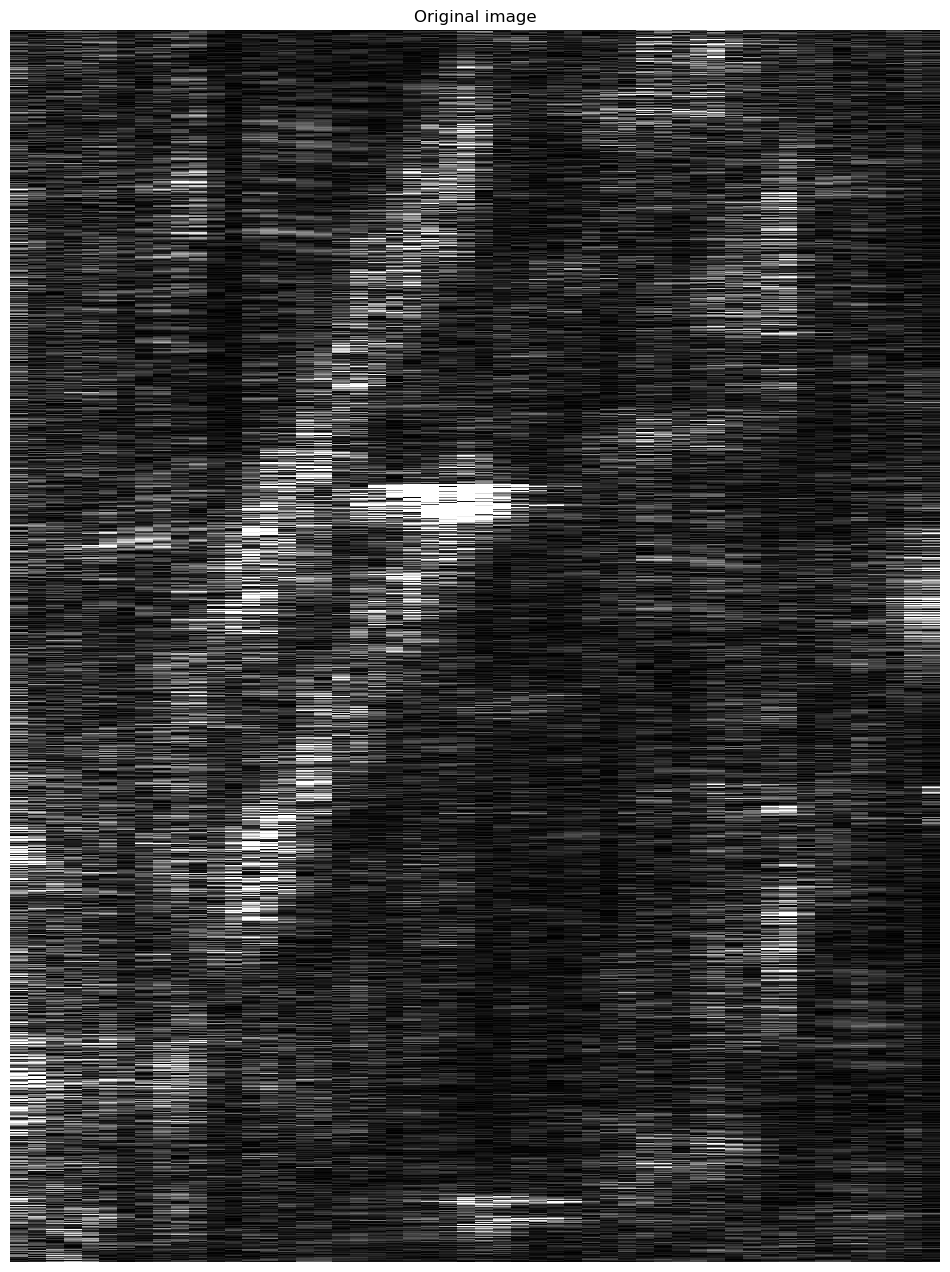

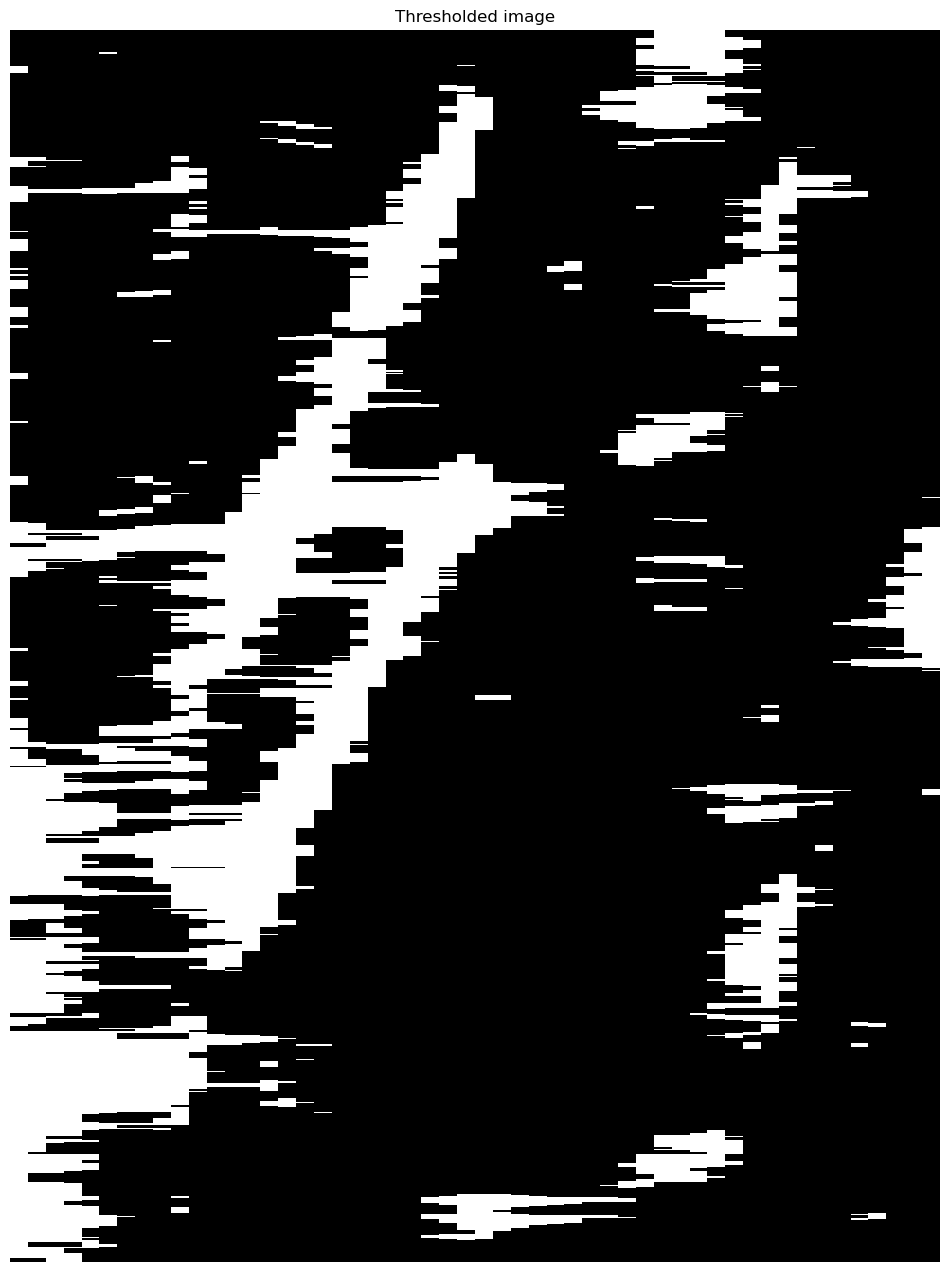

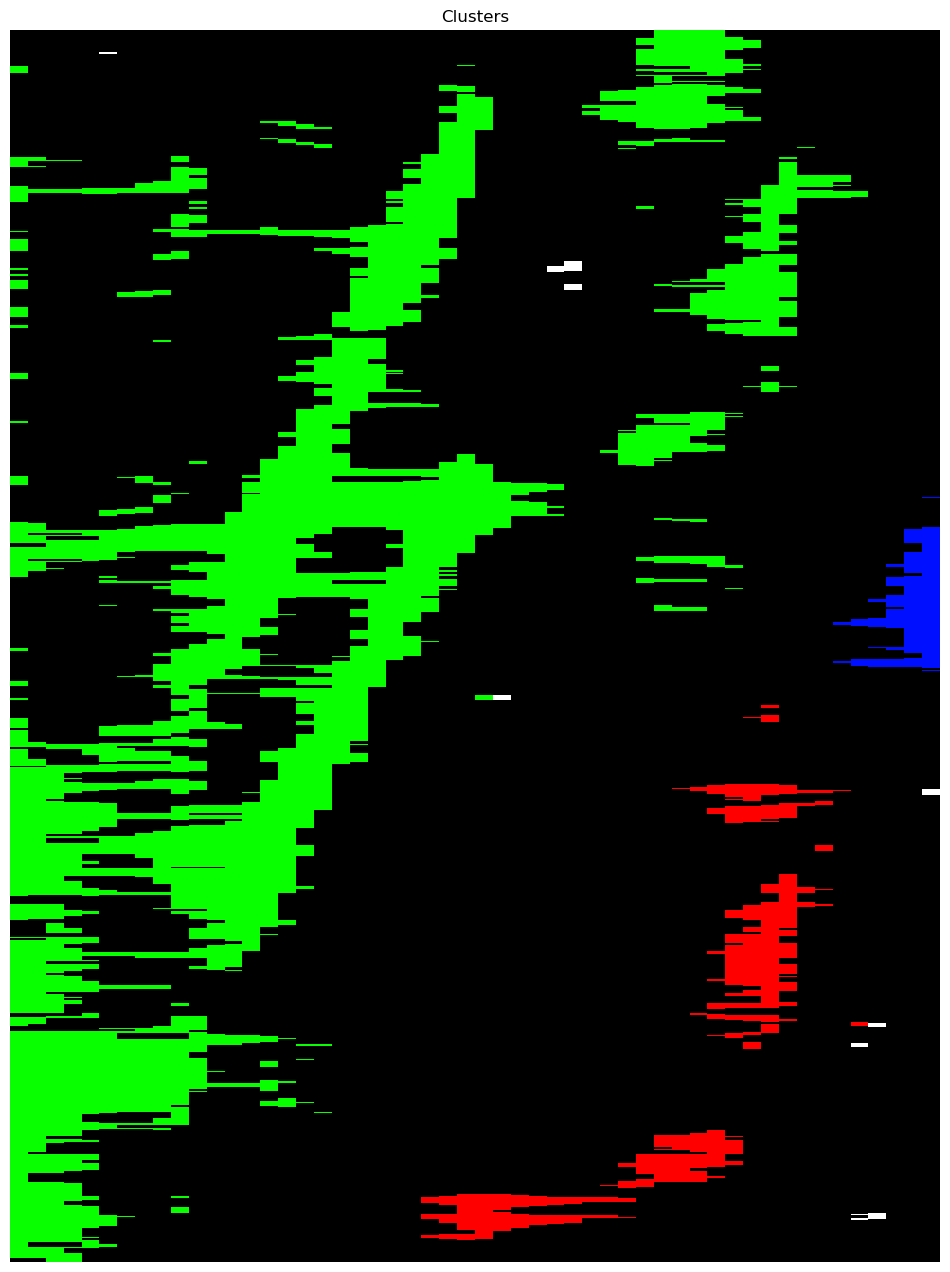

Detected velocity: 32.26 m/s (116.14 km/h)

Discarded cluster 1 with R2=0.09409095226468167 (<0.5)
Detected velocity: 32.82 m/s (118.15 km/h)



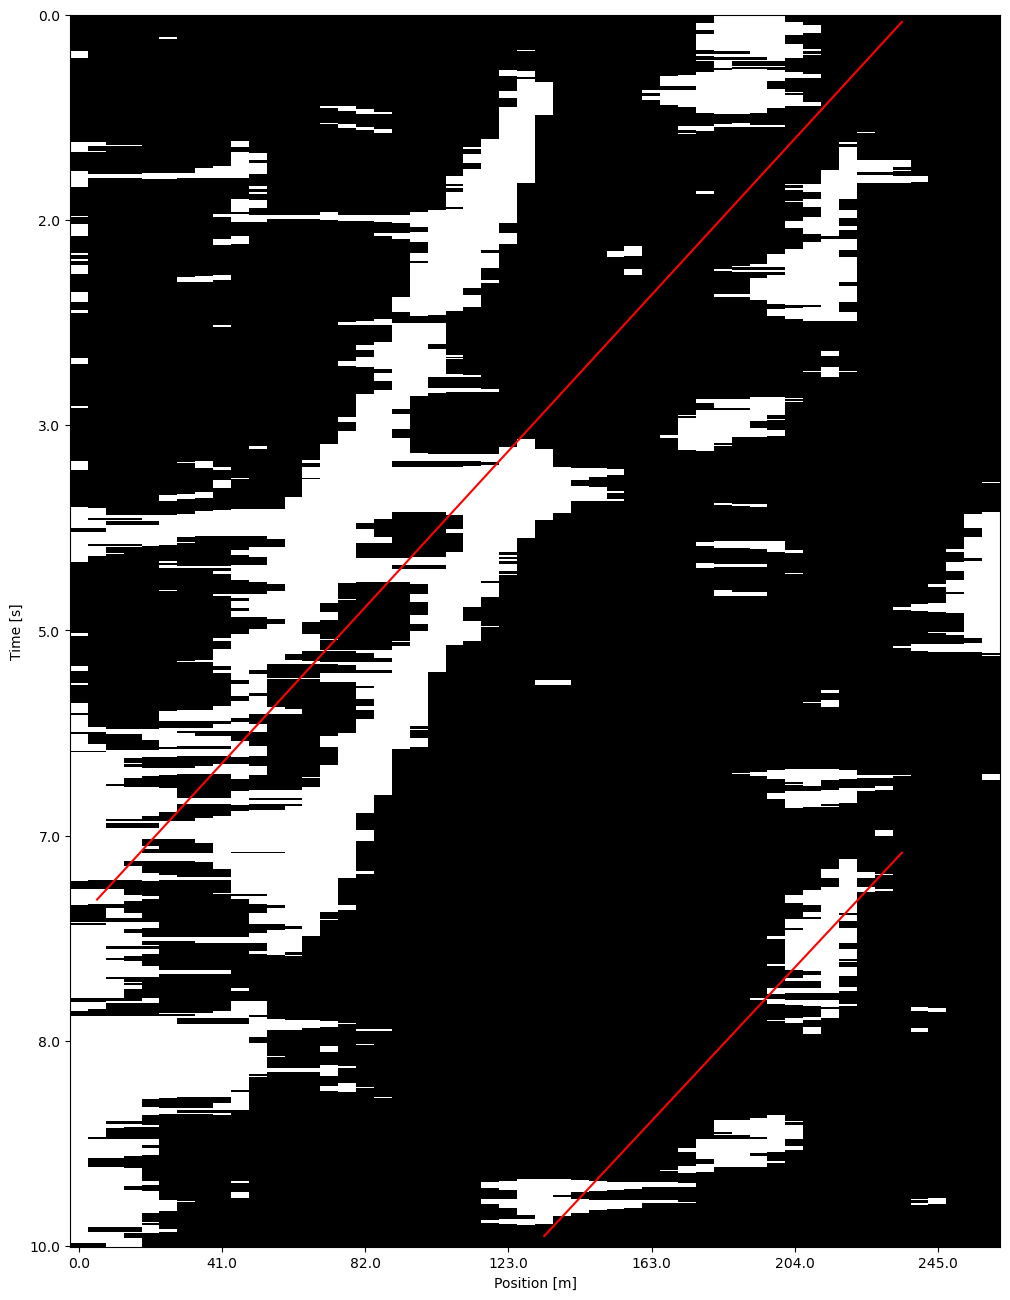

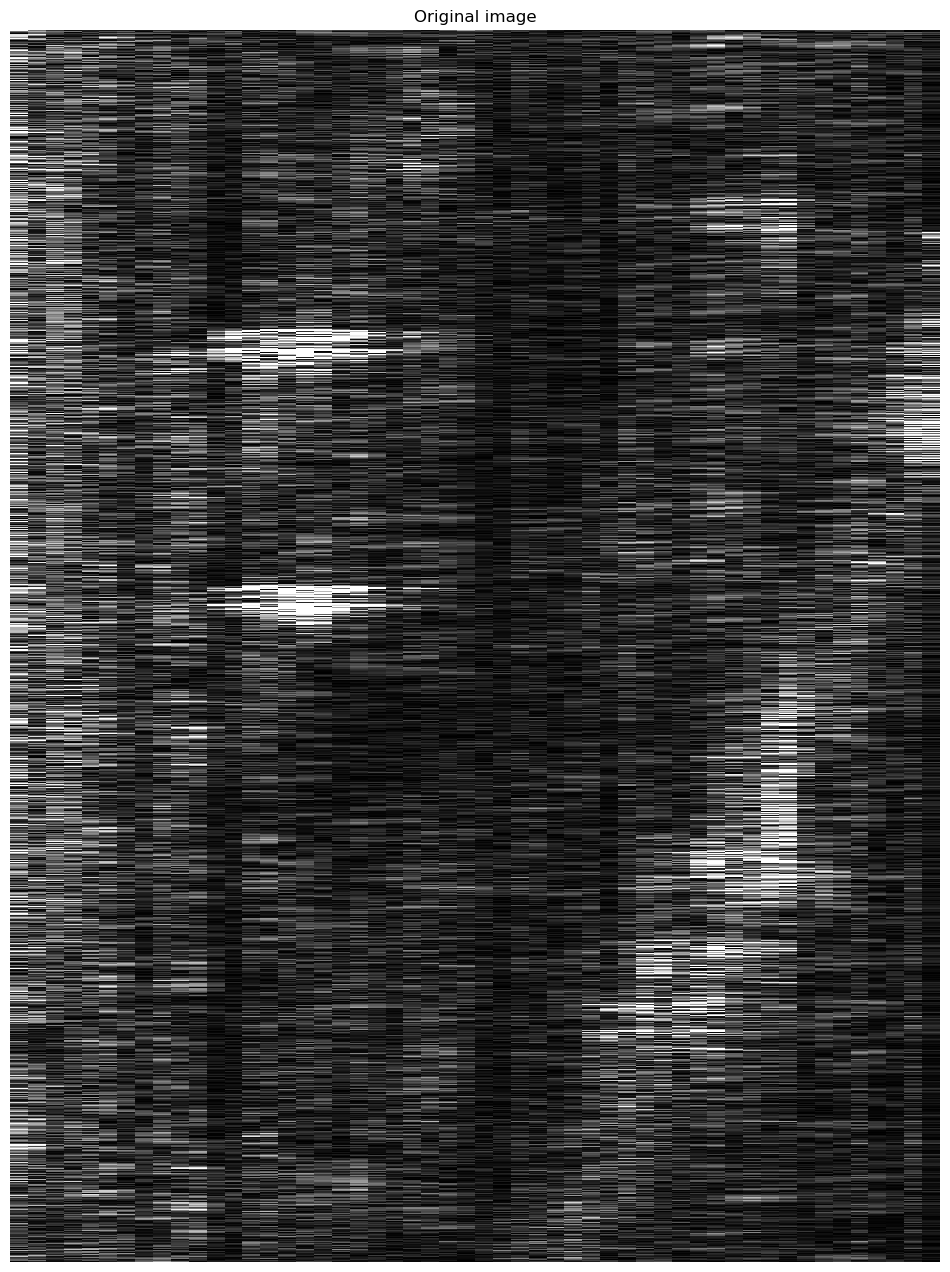

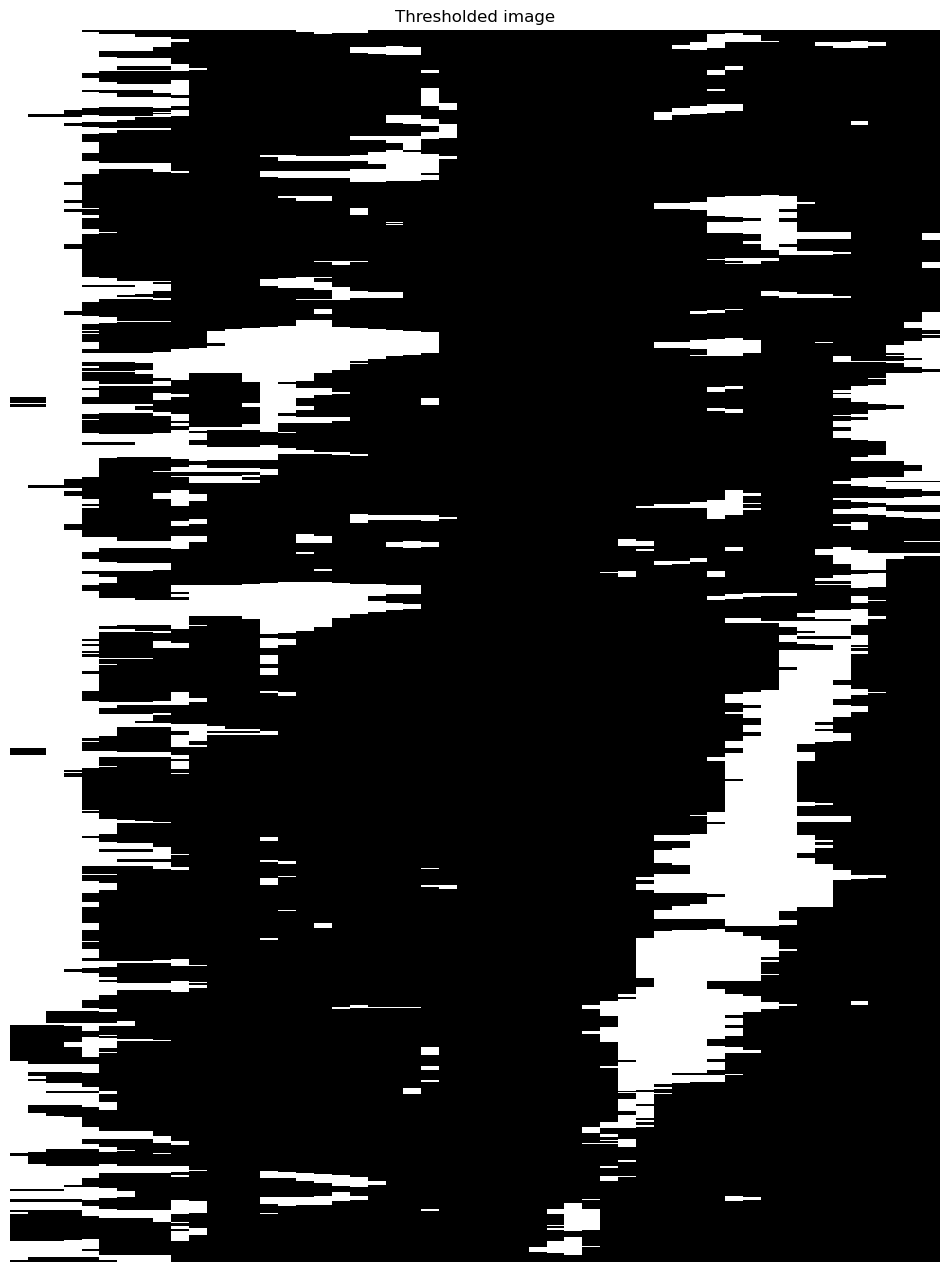

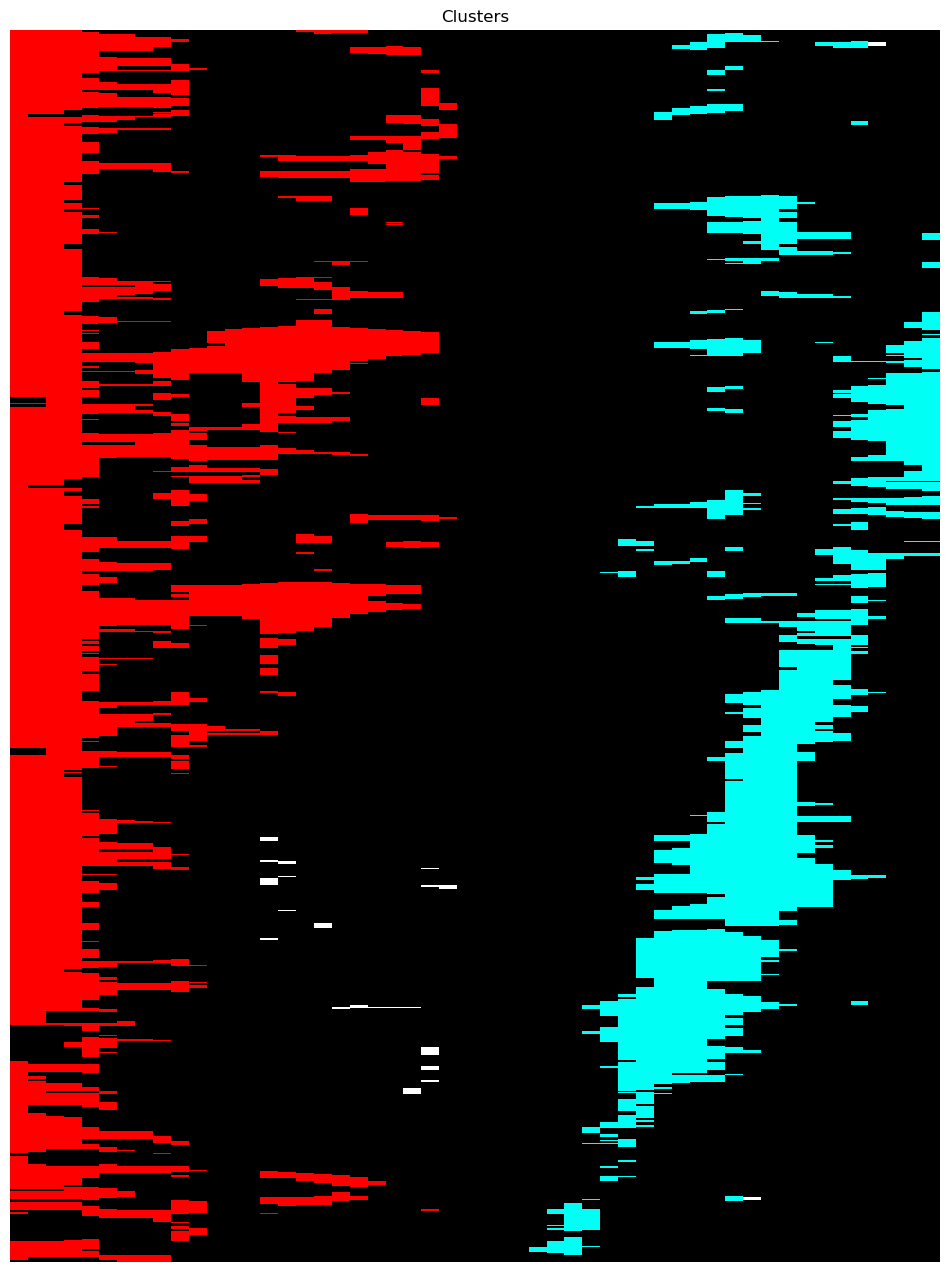

Discarded cluster 0 with R2=0.047043896322056744 (<0.5)
Discarded cluster 1 with R2=0.3614362357126215 (<0.5)


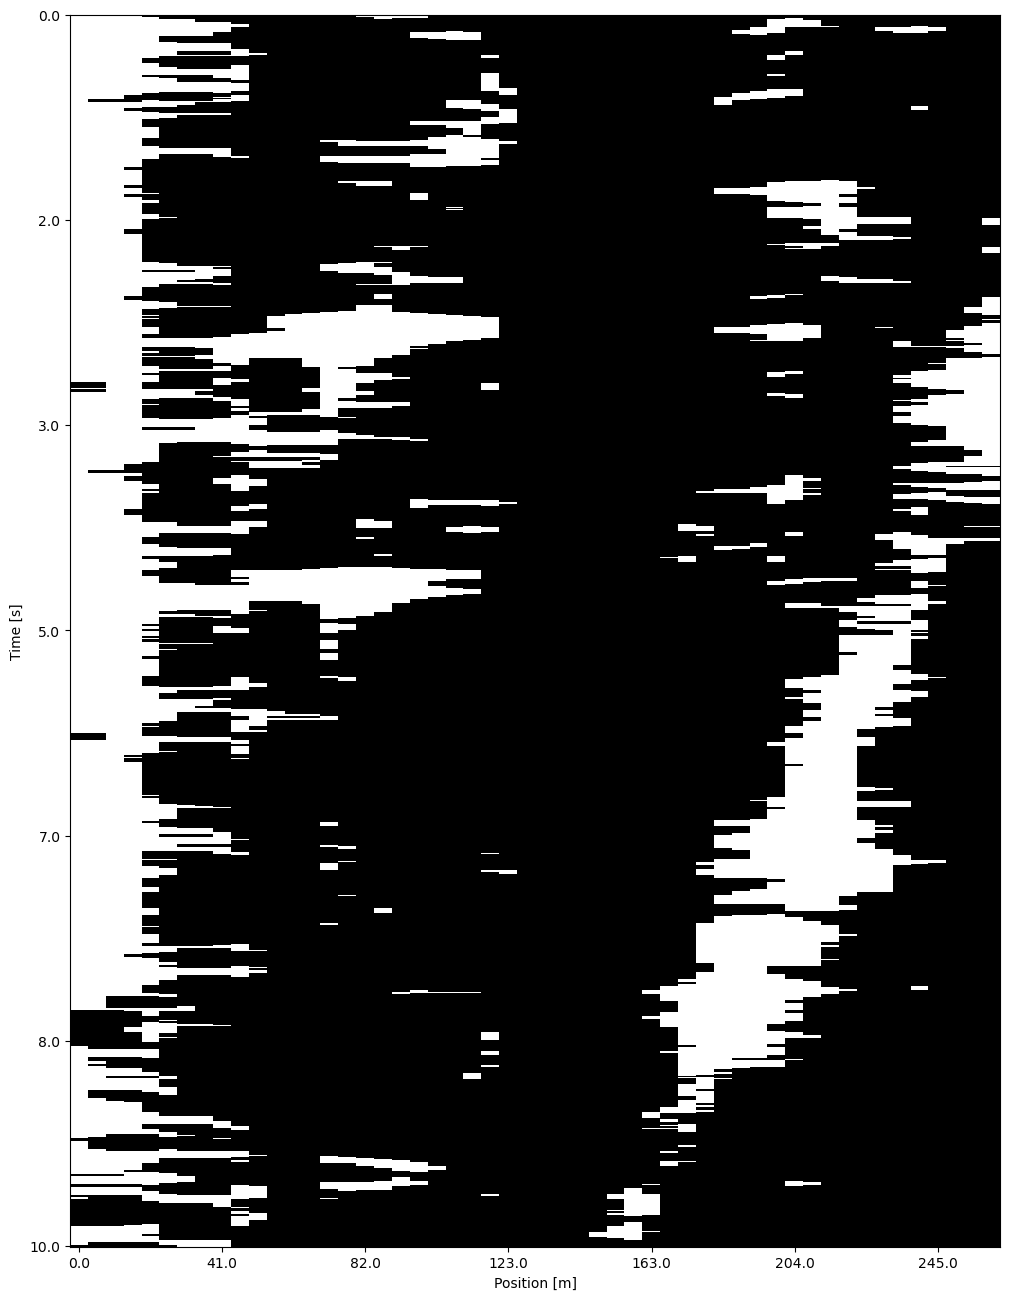

In [7]:
for data in load_all_files():
    detect_velocities(data)